<a href="https://colab.research.google.com/github/asif1424/Practice-code-ML-DL/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


' Adumpur(20-4-23)'
' CardiovascularDisease (1).drawio.png'
' CardiovascularDisease.drawio'
' CardiovascularDisease.drawio.png'
'Colab Notebooks'
'Copy of  CardiovascularDisease (1).drawio.png'
'Copy of  CardiovascularDisease.drawio.png'
'Copy of Copy of  CardiovascularDisease.drawio.png'
'Copy of Copy of Untitled Diagram.jpg'
'Copy of Untitled Diagram (1).drawio'
'Copy of Untitled Diagram.drawio'
'Copy of Untitled Diagram.jpg'
' Dataset'
'Deep learning study plan.gdoc'
 DOC-20240325-WA0000..gdoc
' esemble.drawio.png'
' GRE WORDS.gdoc'
' IELTS VOCABULARY.gdoc'
'Machine Learning.gdoc'
' Magoosh Advanced words.gdoc'
' Magoosh basic words.gdoc'
' Magoosh Common Words.gdoc'
'Magoosh Words all.gdoc'
'make it like a table.gsheet'
' Neural Network.gdoc'
' photo'
' Professors.gdoc'
' SOP1_gpt.gdoc'
' SOP FINAL.gdoc'
' Study in USA.gdoc'
'Supervised learning all algorithm .gdoc'
' Syllabus of EEE'
' thesis preparation.gdoc'
'Untitled Diagram.drawio'
'Untitled Library.xml'


In [ ]:
!ls /content/drive/MyDrive/' Dataset'/


healthcare-dataset-stroke-data.csv


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/ Dataset/healthcare-dataset-stroke-data.csv'  # Corrected file path
df = pd.read_csv(csv_path)

print("CSV loaded successfully!")
display(df.head())

CSV loaded successfully!


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# prompt: show missing values

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# prompt: remove id from this dataset

# Check if the 'id' column exists before dropping it
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("'id' column dropped.")
else:
    print("'id' column not found in the DataFrame.")

display(df.head())

'id' column dropped.


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [ ]:
# prompt: show missing values

print("\nMissing values after dropping 'id':")
print(df.isnull().sum())


Missing values after dropping 'id':
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


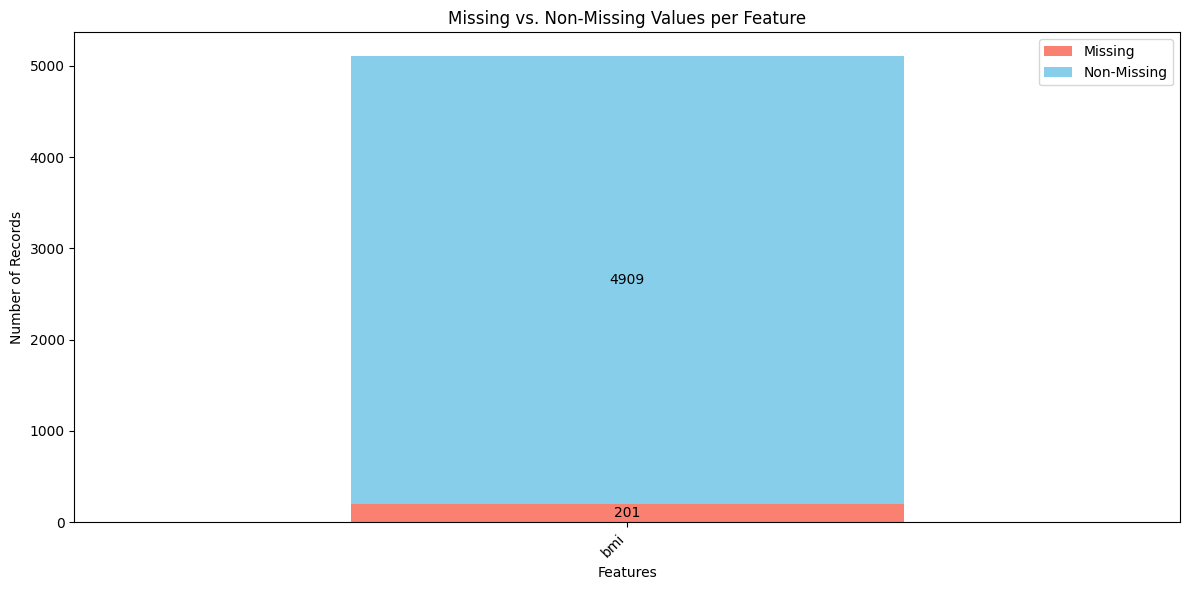

In [ ]:
# prompt: Null values visualization clearly with specific number with different color the missing feature from non missing features, just bar plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values and non-missing values
missing_counts = df.isnull().sum()
non_missing_counts = df.notnull().sum()

# Combine the counts into a single DataFrame for plotting
plot_df = pd.DataFrame({
    'Missing': missing_counts,
    'Non-Missing': non_missing_counts
})

# Filter out columns with no missing values for better visualization clarity
plot_df = plot_df[plot_df['Missing'] > 0]

if not plot_df.empty:
    # Create the stacked bar plot
    ax = plot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'])

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Number of Records")
    plt.title("Missing vs. Non-Missing Values per Feature")
    plt.xticks(rotation=45, ha='right')

    # Add text annotations for missing values
    for container in ax.containers:
        plt.bar_label(container, label_type='center', fmt='%d')

    plt.tight_layout()
    plt.show()
else:
    print("No columns with missing values to visualize.")


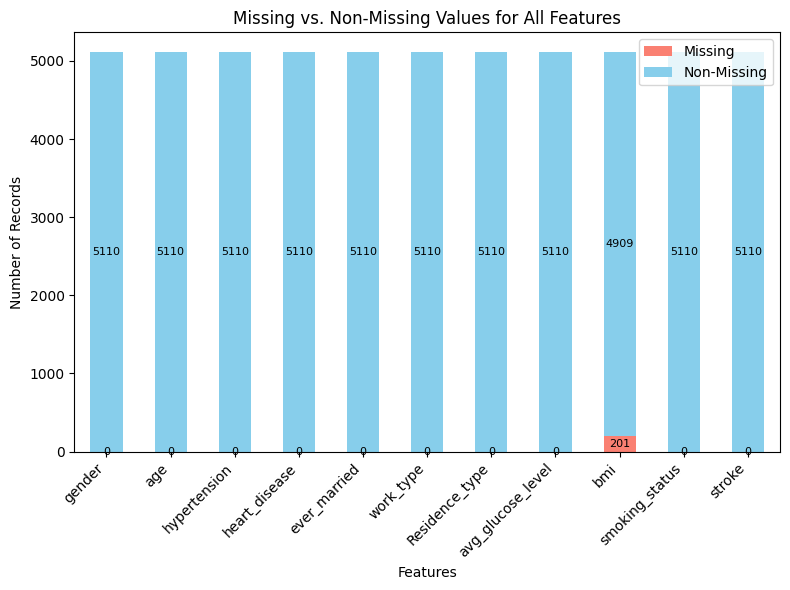

In [ ]:
# prompt: missing values bar plot again indivisual features, with all features show values. different color

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the number of missing values and non-missing values for all columns
missing_counts_all = df.isnull().sum()
non_missing_counts_all = df.notnull().sum()

# Combine the counts into a single DataFrame for plotting
plot_df_all = pd.DataFrame({
    'Missing': missing_counts_all,
    'Non-Missing': non_missing_counts_all
})

if not plot_df_all.empty:
    # Create the stacked bar plot for all features
    ax_all = plot_df_all.plot(kind='bar', stacked=True, figsize=(8, 6), color=['salmon', 'skyblue'])

    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Number of Records")
    plt.title("Missing vs. Non-Missing Values for All Features")
    plt.xticks(rotation=45, ha='right')

    # Add text annotations for both missing and non-missing values
    for container in ax_all.containers:
        ax_all.bar_label(container, label_type='center', fmt='%d', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty, cannot visualize.")

**Iteratuve Imputer used**

In [ ]:
# prompt: use Iterative imputer to fill missing values

!pip install scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the column(s) for imputation
columns_to_impute = ['bmi']

# Create an instance of IterativeImputer
# You can specify different imputation strategies (e.g., 'mean', 'median', 'most_frequent')
# and estimators (e.g., BayesianRidge, DecisionTreeRegressor)
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the selected column(s) and transform the DataFrame
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print("\nDataFrame after imputation:")
display(df.head())

print("\nMissing values after imputation:")
print(df.isnull().sum())


DataFrame after imputation:


gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1


Missing values after imputation:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# prompt: encoding the features

import pandas as pd
# Select categorical features for encoding
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
display(df.head())

print("\nColumn names after encoding:")
df.columns


DataFrame after One-Hot Encoding:


age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False                     True               False   
2               True                    False               False   
3               True                    False               False   
4              False                     True               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                            True   
1                 False                           False   
2                 False                           False   
3                  True                           False   
4                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False


Column names after encoding:


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


Distribution of 'stroke' column:
stroke
0    4861
1     249
Name: count, dtype: int64


/tmp/ipython-input-15-3157486117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


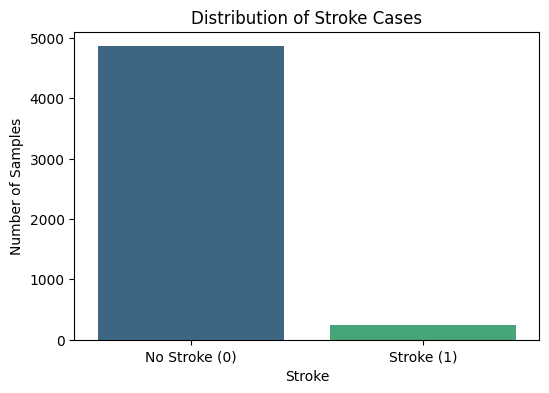

In [ ]:
# prompt: Target samples distribution from original dataset by values and bar plot with different color

import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable 'stroke'
print("\nDistribution of 'stroke' column:")
print(df['stroke'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1], labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()


Percentage distribution of 'stroke' column:
stroke
0    95.127202
1     4.872798
Name: count, dtype: float64


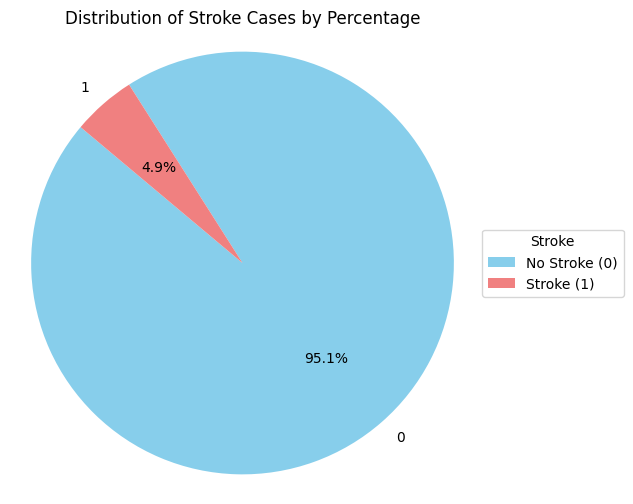

In [ ]:
# prompt: Target samples distribution from original dataset by percentage and pi plot with different color

import matplotlib.pyplot as plt
# Calculate the percentage distribution
stroke_counts = df['stroke'].value_counts()
total_samples = stroke_counts.sum()
stroke_percentage = (stroke_counts / total_samples) * 100

print("\nPercentage distribution of 'stroke' column:")
print(stroke_percentage)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(stroke_percentage, labels=stroke_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke Cases by Percentage')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Stroke", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()

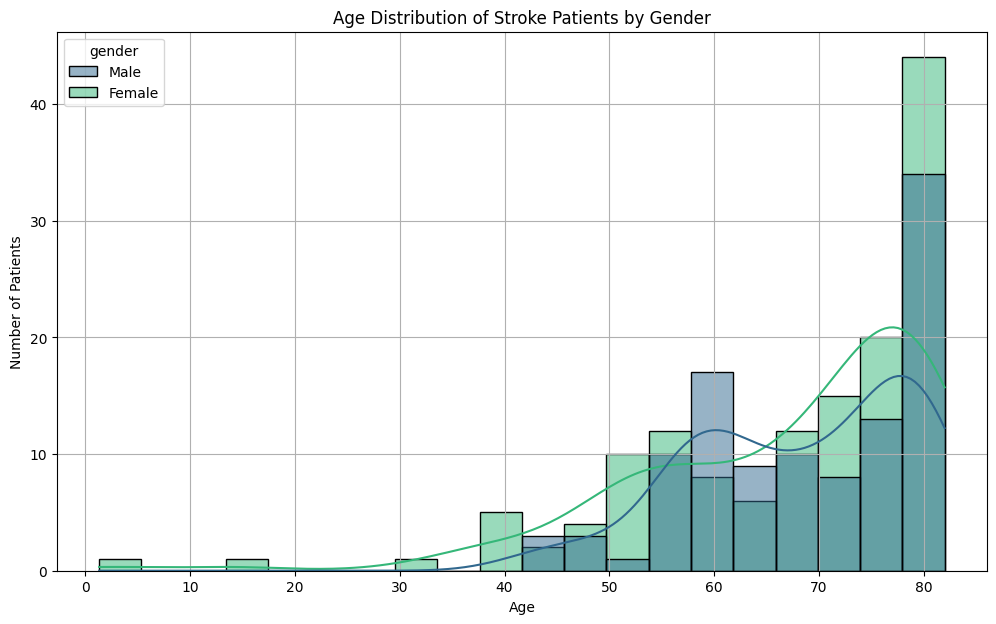

In [ ]:
# prompt: Age distribution of stroke patients with male and female

import matplotlib.pyplot as plt
# Filter the DataFrame for stroke patients
stroke_patients = df[df['stroke'] == 1].copy()

# Map the encoded 'gender' columns back to original 'gender' for plotting
# Assuming 'gender_Male' and 'gender_Other' are the encoded columns for Male and Other (Female is the base/dropped)
stroke_patients['gender'] = 'Female' # Default to Female
stroke_patients.loc[stroke_patients['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_patients.columns:
    stroke_patients.loc[stroke_patients['gender_Other'] == 1, 'gender'] = 'Other'


# Create a histogram to visualize age distribution by gender for stroke patients
plt.figure(figsize=(12, 7))
sns.histplot(data=stroke_patients, x='age', hue='gender', kde=True, bins=20, palette='viridis')
plt.title('Age Distribution of Stroke Patients by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()


Age Statistics for Stroke Patients by Gender:
        count       mean        std    min   25%   50%   75%   max
gender                                                            
Female  141.0  67.137021  14.232813   1.32  57.0  72.0  78.0  82.0
Male    108.0  68.500000  10.456407  42.00  59.0  70.5  78.0  82.0


/tmp/ipython-input-17-3183764574.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=stroke_patients, palette='viridis')


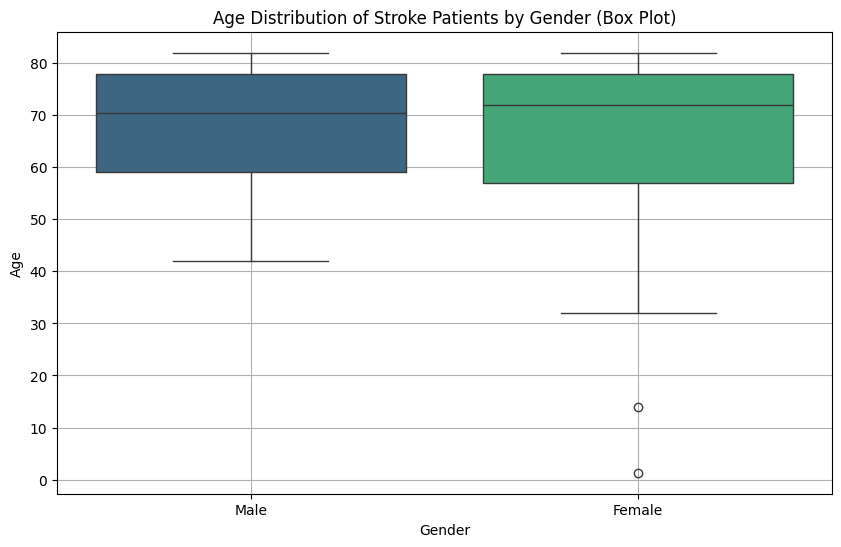

In [ ]:
# prompt: Stroke patient’s age on gender

import matplotlib.pyplot as plt
# Calculate descriptive statistics for age by gender for stroke patients
age_by_gender_stats = stroke_patients.groupby('gender')['age'].describe()

print("\nAge Statistics for Stroke Patients by Gender:")
print(age_by_gender_stats)

# Create a box plot to compare age distribution by gender for stroke patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=stroke_patients, palette='viridis')
plt.title('Age Distribution of Stroke Patients by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

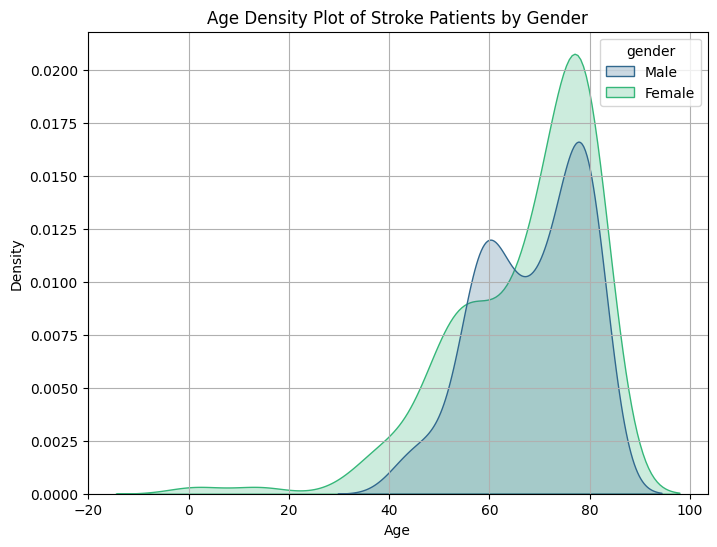

In [ ]:
# prompt: Stroke patient’s age on gender  KDE Plot

import matplotlib.pyplot as plt
# KDE plot of Age by Gender for Stroke Patients
plt.figure(figsize=(8, 6))
sns.kdeplot(data=stroke_patients, x='age', hue='gender', fill=True, palette='viridis')
plt.title('Age Density Plot of Stroke Patients by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/tmp/ipython-input-19-181298464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='age', data=stroke_patients, palette='viridis')


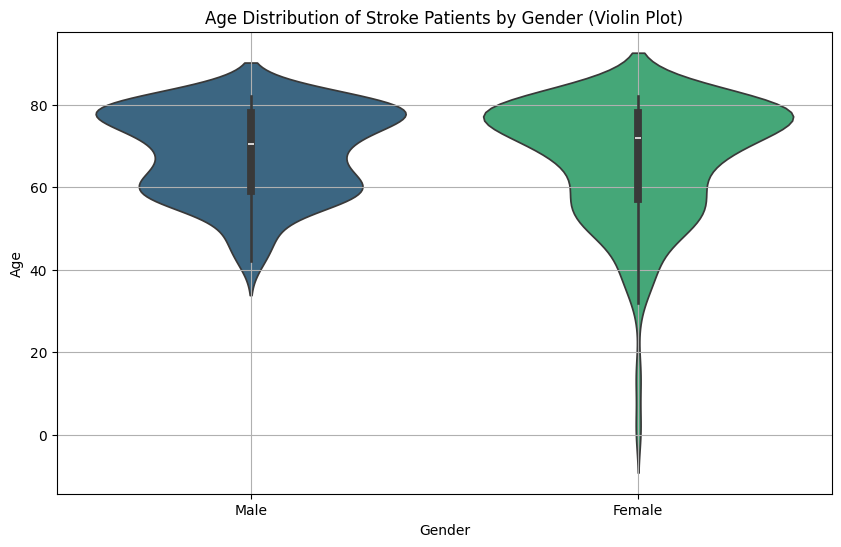

In [ ]:
# prompt: Stroke patient’s age on gender  Violin Plot

import matplotlib.pyplot as plt
# Violin plot of Age by Gender for Stroke Patients
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='age', data=stroke_patients, palette='viridis')
plt.title('Age Distribution of Stroke Patients by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

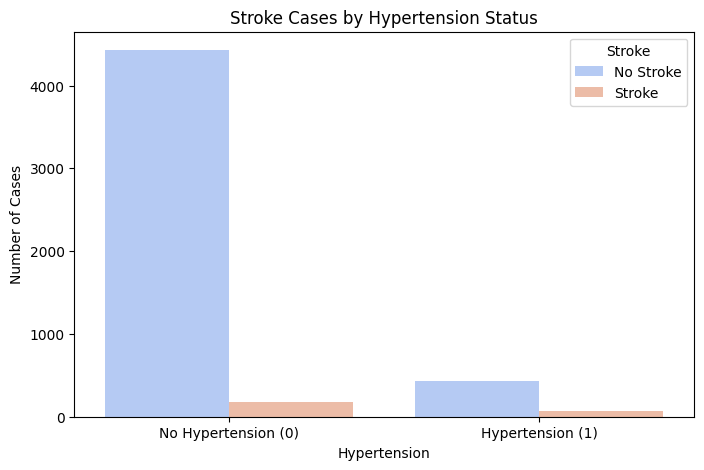


Percentage of Stroke within Hypertension Status:
stroke                0          1
hypertension                      
0             96.032090   3.967910
1             86.746988  13.253012


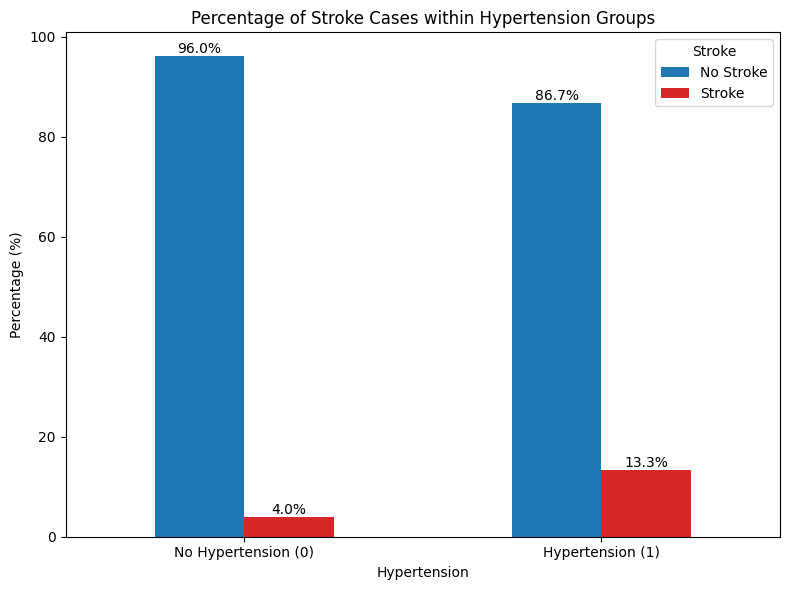

In [ ]:
# prompt: Stroke patient’s hypertension plot q1 paper suitable

import matplotlib.pyplot as plt
# Analyze the relationship between hypertension and stroke
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='coolwarm')
plt.title('Stroke Cases by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['No Hypertension (0)', 'Hypertension (1)'])
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Calculate the proportion of stroke cases within each hypertension group
hypertension_stroke_proportion = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Stroke within Hypertension Status:")
print(hypertension_stroke_proportion)

# Plotting the percentage distribution
ax = hypertension_stroke_proportion.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#d62728'])
plt.title('Percentage of Stroke Cases within Hypertension Groups')
plt.xlabel('Hypertension')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['No Hypertension (0)', 'Hypertension (1)'], rotation=0)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add text annotations for the percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

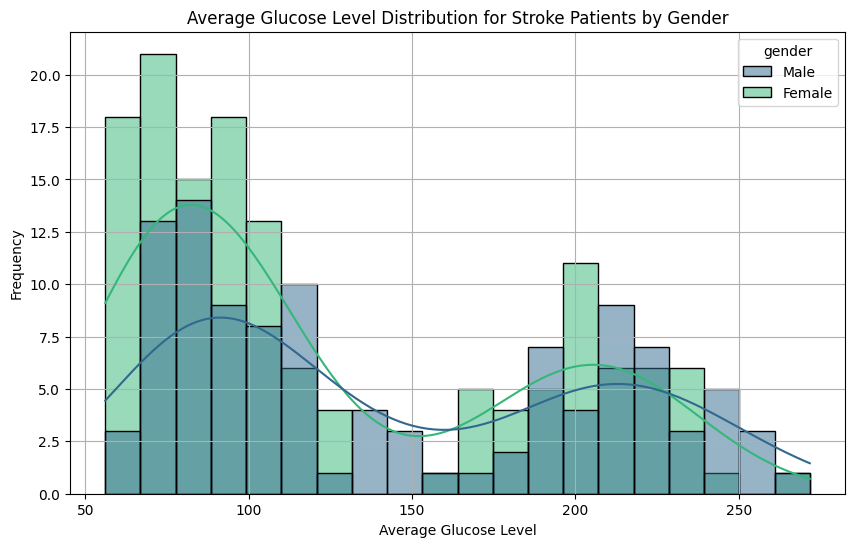


Average Glucose Level Statistics for Stroke Patients by Gender:
        count        mean        std    min    25%      50%       75%     max
gender                                                                       
Female  141.0  124.414397  60.022687  57.92  76.13   97.920  190.1400  263.32
Male    108.0  143.159352  63.024682  56.11  86.86  115.435  208.3875  271.74


/tmp/ipython-input-21-2882339378.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='avg_glucose_level', data=stroke_patients, palette='viridis')


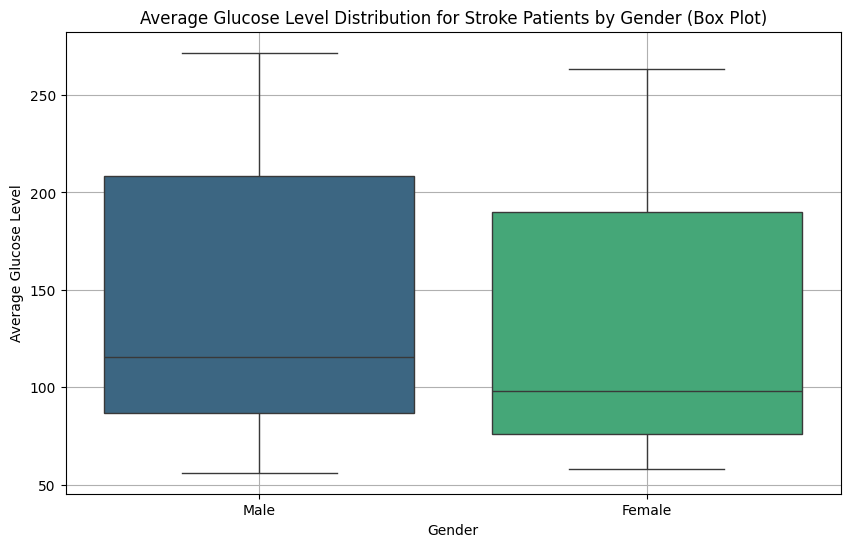

/tmp/ipython-input-21-2882339378.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='avg_glucose_level', data=stroke_patients, palette='viridis')


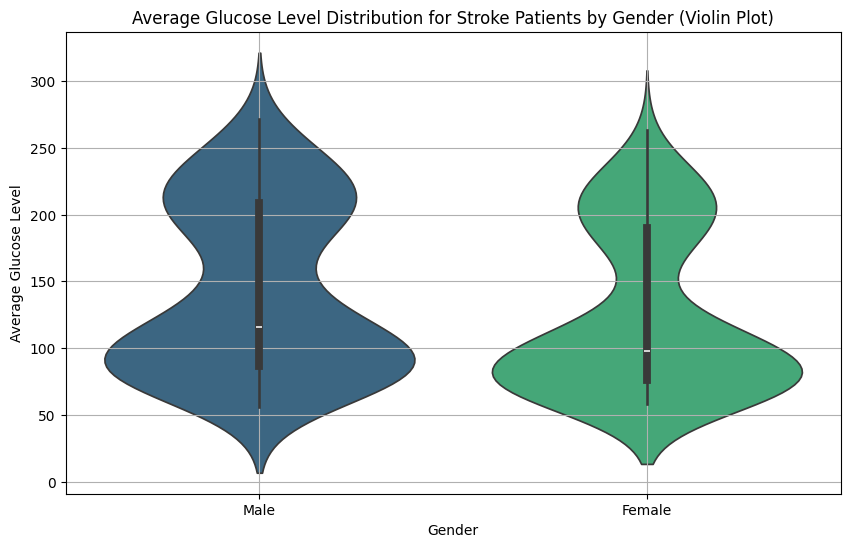

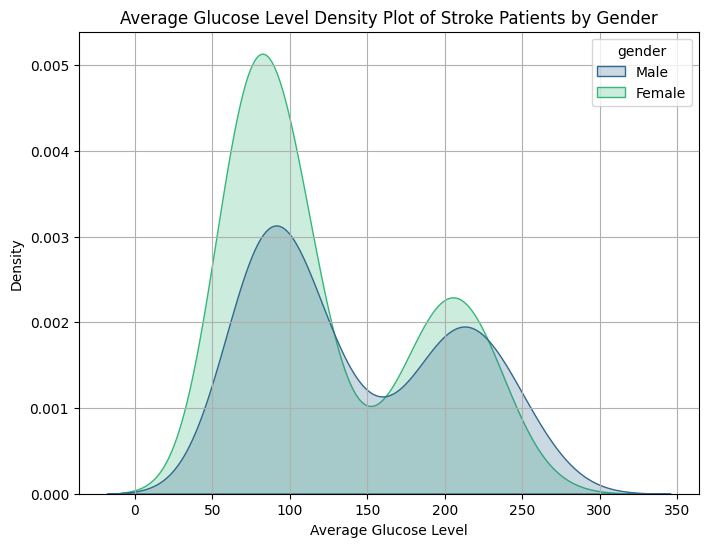

In [ ]:
# prompt: Stroke patient’s average glucose level distribution with male and femle

import matplotlib.pyplot as plt
# Filter for stroke patients and extract relevant columns
stroke_patients = df[df['stroke'] == 1][['avg_glucose_level', 'gender_Male', 'gender_Other']].copy()

# Create a new 'gender' column based on the encoded columns
stroke_patients['gender'] = 'Female'
stroke_patients.loc[stroke_patients['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_patients.columns:
    stroke_patients.loc[stroke_patients['gender_Other'] == 1, 'gender'] = 'Other'

# Remove the original encoded columns
stroke_patients = stroke_patients.drop(['gender_Male'], axis=1)
if 'gender_Other' in stroke_patients.columns:
    stroke_patients = stroke_patients.drop(['gender_Other'], axis=1)


# Plot the distribution of average glucose levels by gender for stroke patients
plt.figure(figsize=(10, 6))
sns.histplot(data=stroke_patients, x='avg_glucose_level', hue='gender', kde=True, bins=20, palette='viridis')
plt.title('Average Glucose Level Distribution for Stroke Patients by Gender')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate descriptive statistics for average glucose level by gender for stroke patients
glucose_by_gender_stats = stroke_patients.groupby('gender')['avg_glucose_level'].describe()

print("\nAverage Glucose Level Statistics for Stroke Patients by Gender:")
print(glucose_by_gender_stats)

# Create a box plot for average glucose levels by gender for stroke patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='avg_glucose_level', data=stroke_patients, palette='viridis')
plt.title('Average Glucose Level Distribution for Stroke Patients by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()

# Violin plot of Average Glucose Level by Gender for Stroke Patients
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='avg_glucose_level', data=stroke_patients, palette='viridis')
plt.title('Average Glucose Level Distribution for Stroke Patients by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()

# KDE plot of Average Glucose Level by Gender for Stroke Patients
plt.figure(figsize=(8, 6))
sns.kdeplot(data=stroke_patients, x='avg_glucose_level', hue='gender', fill=True, palette='viridis')
plt.title('Average Glucose Level Density Plot of Stroke Patients by Gender')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.grid(True)
plt.show()

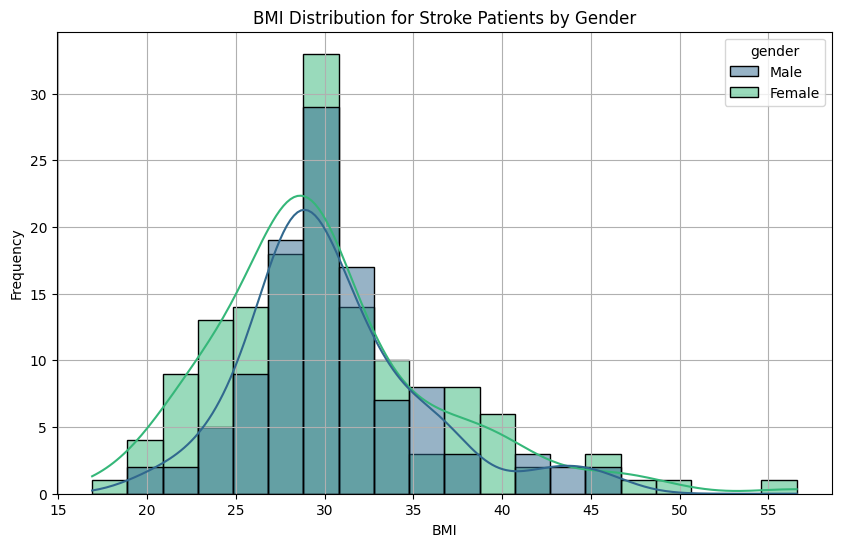


BMI Statistics for Stroke Patients by Gender:
        count       mean       std   min     25%        50%   75%   max
gender                                                                 
Female  141.0  30.020979  6.367766  16.9  26.400  28.893237  32.3  56.6
Male    108.0  30.474736  5.048478  20.2  27.475  28.893237  32.5  45.9


/tmp/ipython-input-22-3898091936.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='bmi', data=stroke_patients_bmi, palette='viridis')


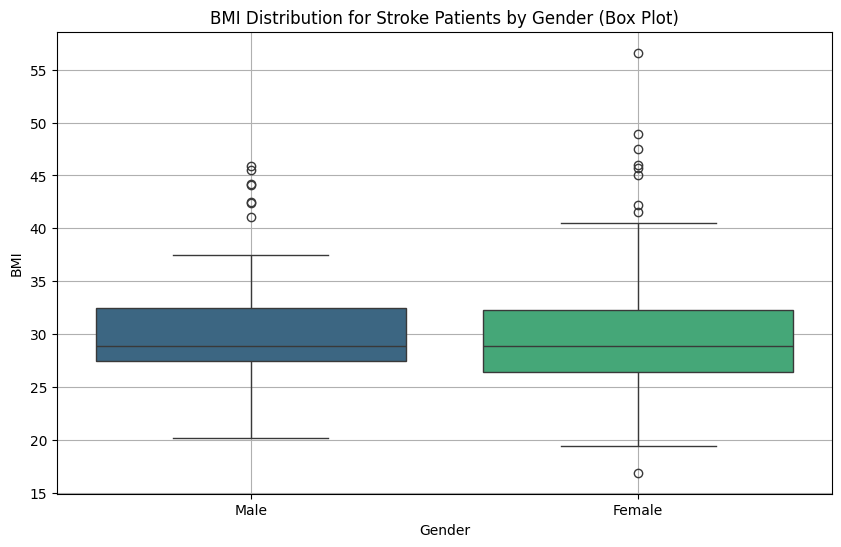

/tmp/ipython-input-22-3898091936.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='bmi', data=stroke_patients_bmi, palette='viridis')


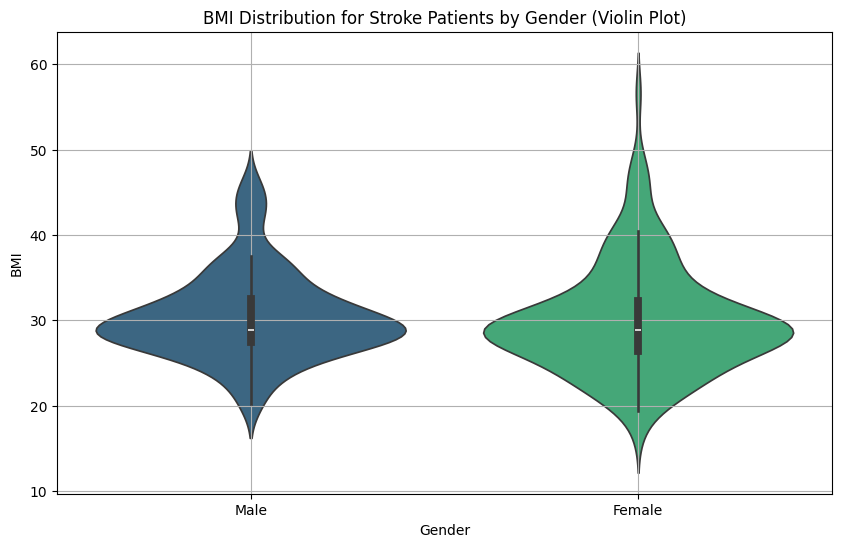

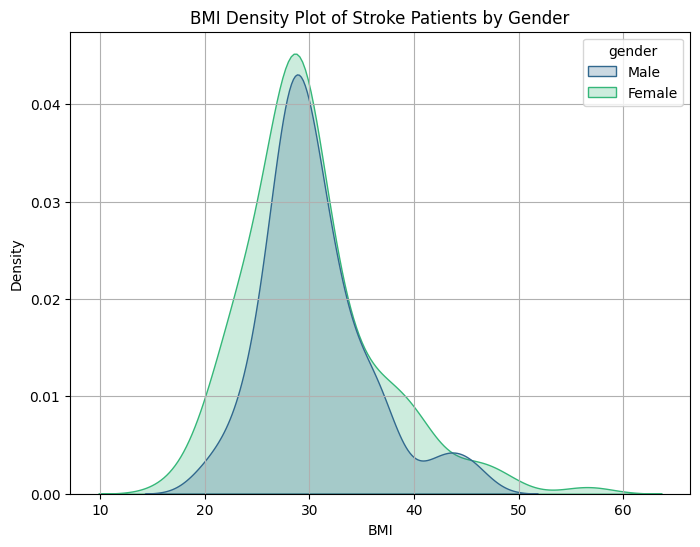

In [ ]:
# prompt: Stroke patient’s BMI on gender.

import matplotlib.pyplot as plt
# Filter for stroke patients and extract relevant columns including BMI
stroke_patients_bmi = df[df['stroke'] == 1][['bmi', 'gender_Male', 'gender_Other']].copy()

# Create a new 'gender' column based on the encoded columns
stroke_patients_bmi['gender'] = 'Female'
stroke_patients_bmi.loc[stroke_patients_bmi['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_patients_bmi.columns:
    stroke_patients_bmi.loc[stroke_patients_bmi['gender_Other'] == 1, 'gender'] = 'Other'

# Remove the original encoded columns
stroke_patients_bmi = stroke_patients_bmi.drop(['gender_Male'], axis=1)
if 'gender_Other' in stroke_patients_bmi.columns:
    stroke_patients_bmi = stroke_patients_bmi.drop(['gender_Other'], axis=1)

# Plot the distribution of BMI by gender for stroke patients
plt.figure(figsize=(10, 6))
sns.histplot(data=stroke_patients_bmi, x='bmi', hue='gender', kde=True, bins=20, palette='viridis')
plt.title('BMI Distribution for Stroke Patients by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate descriptive statistics for BMI by gender for stroke patients
bmi_by_gender_stats = stroke_patients_bmi.groupby('gender')['bmi'].describe()

print("\nBMI Statistics for Stroke Patients by Gender:")
print(bmi_by_gender_stats)

# Create a box plot for BMI by gender for stroke patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=stroke_patients_bmi, palette='viridis')
plt.title('BMI Distribution for Stroke Patients by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Violin plot of BMI by Gender for Stroke Patients
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='bmi', data=stroke_patients_bmi, palette='viridis')
plt.title('BMI Distribution for Stroke Patients by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# KDE plot of BMI by Gender for Stroke Patients
plt.figure(figsize=(8, 6))
sns.kdeplot(data=stroke_patients_bmi, x='bmi', hue='gender', fill=True, palette='viridis')
plt.title('BMI Density Plot of Stroke Patients by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/tmp/ipython-input-23-2982590378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=stroke_patients_heart, palette='coolwarm')


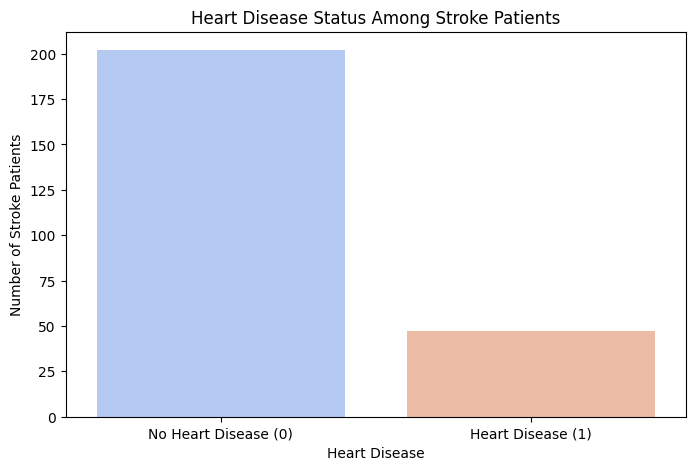


Percentage of Stroke Patients with and without Heart Disease:
heart_disease
0    81.124498
1    18.875502
Name: count, dtype: float64


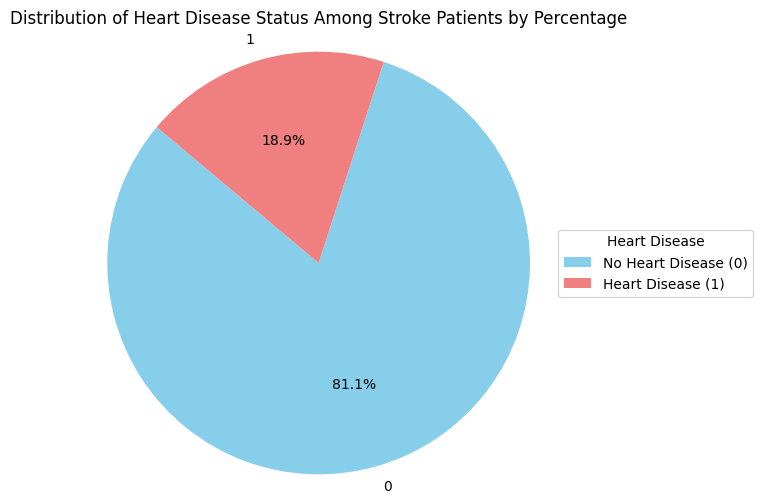

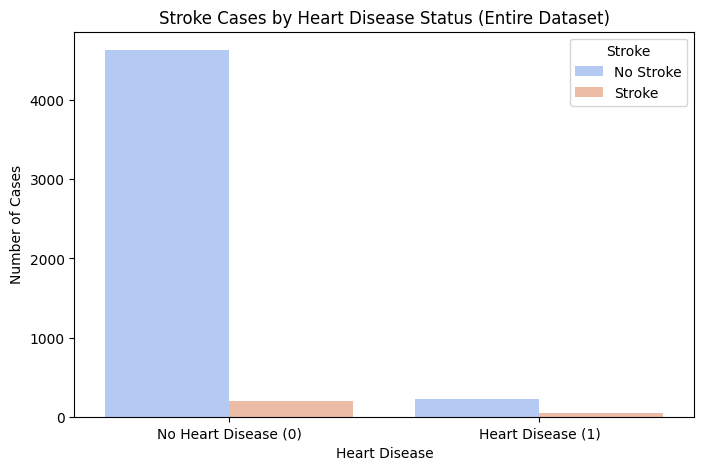


Percentage of Stroke within Heart Disease Status (Entire Dataset):
stroke                 0          1
heart_disease                      
0              95.821266   4.178734
1              82.971014  17.028986


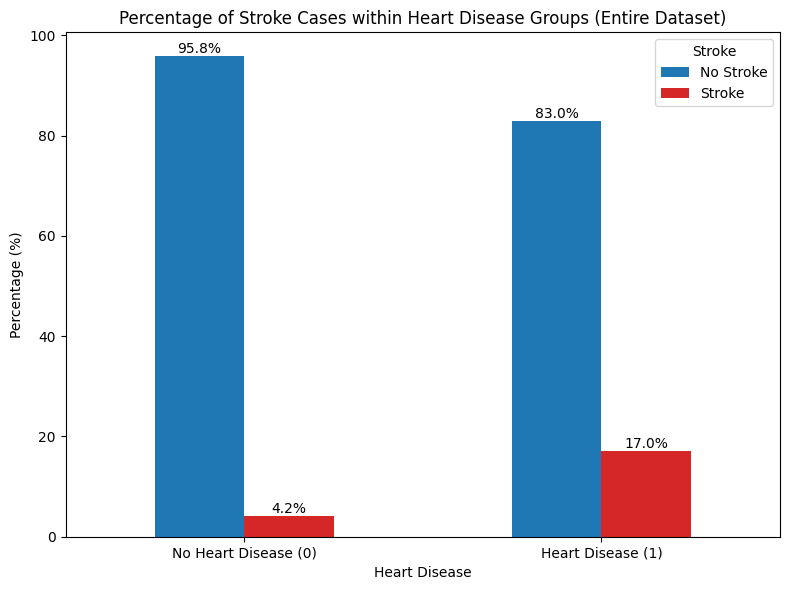

In [ ]:
# prompt: Stroke patient’s heart disease.

import matplotlib.pyplot as plt
# Filter for stroke patients and analyze heart disease status
stroke_patients_heart = df[df['stroke'] == 1].copy()

# Analyze the relationship between heart disease and stroke (among stroke patients)
# Since we've already filtered for stroke patients, we are looking at the distribution
# of heart disease within the stroke group.
plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', data=stroke_patients_heart, palette='coolwarm')
plt.title('Heart Disease Status Among Stroke Patients')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Stroke Patients')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

# Calculate the proportion of stroke patients with and without heart disease
heart_disease_counts_stroke = stroke_patients_heart['heart_disease'].value_counts()
total_stroke_patients = heart_disease_counts_stroke.sum()
heart_disease_percentage_stroke = (heart_disease_counts_stroke / total_stroke_patients) * 100

print("\nPercentage of Stroke Patients with and without Heart Disease:")
print(heart_disease_percentage_stroke)

# Plotting the percentage distribution (Pie Chart)
if not heart_disease_percentage_stroke.empty:
    plt.figure(figsize=(6, 6))
    plt.pie(heart_disease_percentage_stroke, labels=heart_disease_percentage_stroke.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
    plt.title('Distribution of Heart Disease Status Among Stroke Patients by Percentage')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(title="Heart Disease", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=['No Heart Disease (0)', 'Heart Disease (1)'])
    plt.show()
else:
    print("No stroke patients found with heart disease data.")


# Now, let's analyze the relationship between heart disease and stroke for the *entire* dataset.
# This shows the risk of stroke associated with having heart disease.
plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='coolwarm')
plt.title('Stroke Cases by Heart Disease Status (Entire Dataset)')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Calculate the proportion of stroke cases within each heart disease group for the *entire* dataset
heart_disease_stroke_proportion_total = df.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Stroke within Heart Disease Status (Entire Dataset):")
print(heart_disease_stroke_proportion_total)

# Plotting the percentage distribution (Stacked Bar Chart)
ax = heart_disease_stroke_proportion_total.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#d62728'])
plt.title('Percentage of Stroke Cases within Heart Disease Groups (Entire Dataset)')
plt.xlabel('Heart Disease')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease (0)', 'Heart Disease (1)'], rotation=0)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add text annotations for the percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

/tmp/ipython-input-24-1541910925.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_heart_disease_patients, palette='coolwarm')


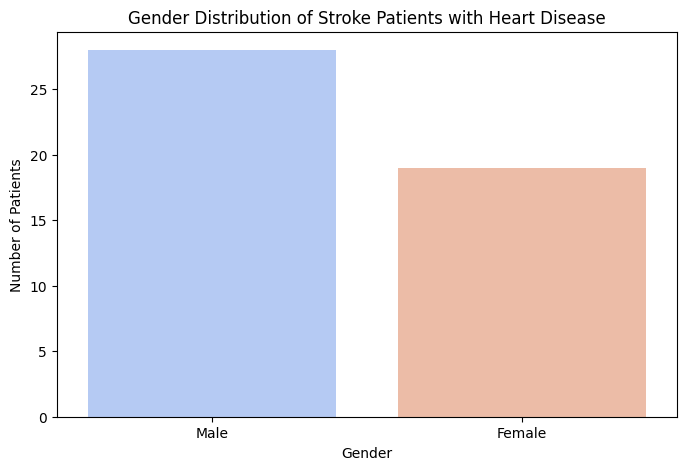


Percentage Distribution of Gender Among Stroke Patients with Heart Disease:
gender
Male      59.574468
Female    40.425532
Name: count, dtype: float64


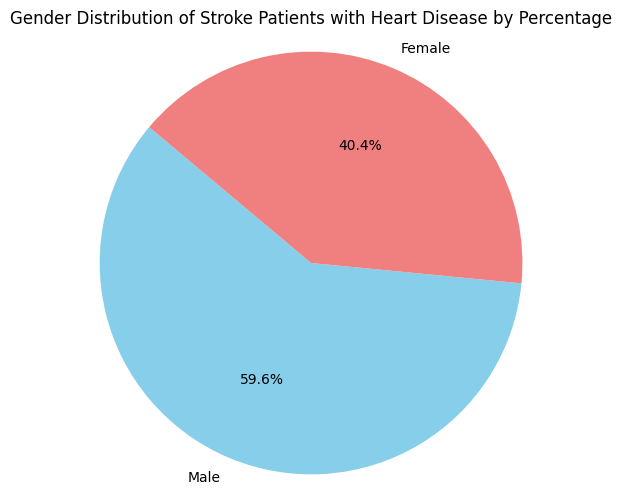


Percentage of Heart Disease Among Stroke Patients by Gender:
heart_disease          0          1
gender                             
Female         86.524823  13.475177
Male           74.074074  25.925926


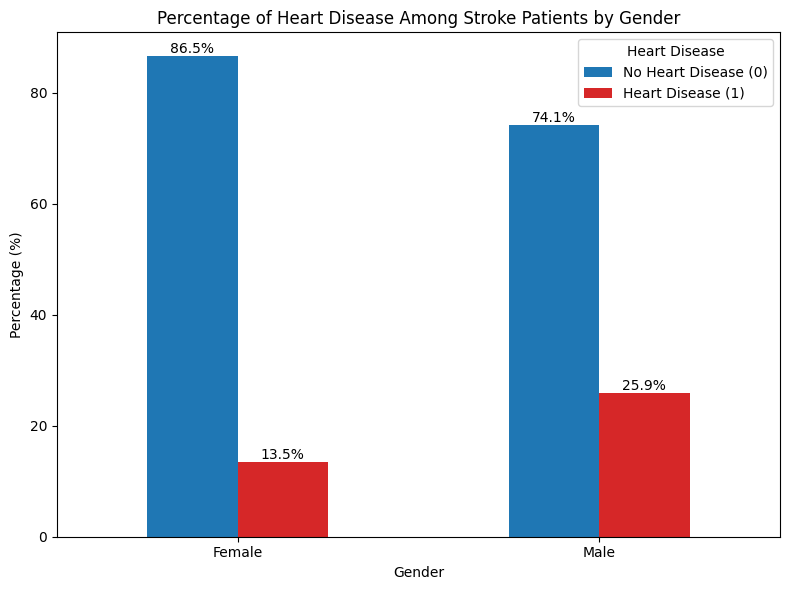

In [ ]:
# prompt: troke patient’s heart disease  by gender

import matplotlib.pyplot as plt
# Filter for stroke patients who also have heart disease
stroke_heart_disease_patients = df[(df['stroke'] == 1) & (df['heart_disease'] == 1)].copy()

# Create a new 'gender' column based on the encoded columns for these patients
stroke_heart_disease_patients['gender'] = 'Female'
stroke_heart_disease_patients.loc[stroke_heart_disease_patients['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_heart_disease_patients.columns:
    stroke_heart_disease_patients.loc[stroke_heart_disease_patients['gender_Other'] == 1, 'gender'] = 'Other'

# Analyze the distribution of gender among stroke patients with heart disease
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=stroke_heart_disease_patients, palette='coolwarm')
plt.title('Gender Distribution of Stroke Patients with Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

# Calculate the percentage distribution of gender among stroke patients with heart disease
gender_heart_disease_stroke_counts = stroke_heart_disease_patients['gender'].value_counts()
total_stroke_heart_disease = gender_heart_disease_stroke_counts.sum()

if total_stroke_heart_disease > 0:
    gender_heart_disease_stroke_percentage = (gender_heart_disease_stroke_counts / total_stroke_heart_disease) * 100

    print("\nPercentage Distribution of Gender Among Stroke Patients with Heart Disease:")
    print(gender_heart_disease_stroke_percentage)

    # Plotting the percentage distribution (Pie Chart)
    plt.figure(figsize=(6, 6))
    plt.pie(gender_heart_disease_stroke_percentage, labels=gender_heart_disease_stroke_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Gender Distribution of Stroke Patients with Heart Disease by Percentage')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nNo stroke patients with heart disease found to analyze gender distribution.")

# To show the proportion of stroke patients with heart disease within each gender group (from the stroke patient population)
# Filter for stroke patients
stroke_patients = df[df['stroke'] == 1].copy()

# Create a new 'gender' column for stroke patients
stroke_patients['gender'] = 'Female'
stroke_patients.loc[stroke_patients['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_patients.columns:
    stroke_patients.loc[stroke_patients['gender_Other'] == 1, 'gender'] = 'Other'

# Calculate the proportion of heart disease within the stroke group, separated by gender
heart_disease_by_gender_stroke_proportion = stroke_patients.groupby('gender')['heart_disease'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Heart Disease Among Stroke Patients by Gender:")
print(heart_disease_by_gender_stroke_proportion)

if not heart_disease_by_gender_stroke_proportion.empty:
    # Plotting the percentage distribution (Stacked Bar Chart)
    ax = heart_disease_by_gender_stroke_proportion.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#d62728'])
    plt.title('Percentage of Heart Disease Among Stroke Patients by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.legend(title='Heart Disease', labels=['No Heart Disease (0)', 'Heart Disease (1)'])

    # Add text annotations for the percentages
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge')

    plt.tight_layout()
    plt.show()
else:
    print("\nNo stroke patients found to analyze heart disease distribution by gender.")


Gender distribution among stroke patients:
gender
Female    141
Male      108
Name: count, dtype: int64


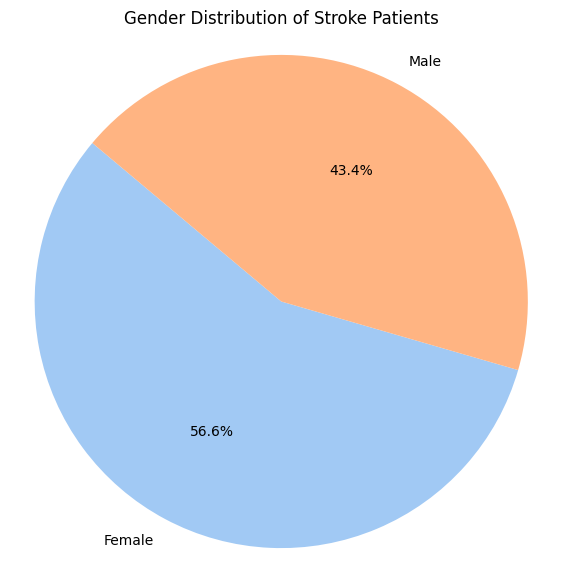

In [ ]:
# prompt: Stroke patient’s gender pi chart

import matplotlib.pyplot as plt
# Filter the DataFrame for stroke patients
stroke_patients = df[df['stroke'] == 1].copy()

# Map the encoded 'gender' columns back to original 'gender' for plotting
# Assuming 'gender_Male' and 'gender_Other' are the encoded columns for Male and Other (Female is the base/dropped)
stroke_patients['gender'] = 'Female' # Default to Female
stroke_patients.loc[stroke_patients['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in stroke_patients.columns:
    stroke_patients.loc[stroke_patients['gender_Other'] == 1, 'gender'] = 'Other'

# Calculate the count of each gender among stroke patients
gender_counts = stroke_patients['gender'].value_counts()

print("\nGender distribution among stroke patients:")
print(gender_counts)

# Plotting the pie chart for gender distribution of stroke patients
if not gender_counts.empty:
    plt.figure(figsize=(7, 7))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Gender Distribution of Stroke Patients')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("No stroke patients found to analyze gender distribution.")

/tmp/ipython-input-26-3202537838.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital_status', data=stroke_patients_married, palette='coolwarm')


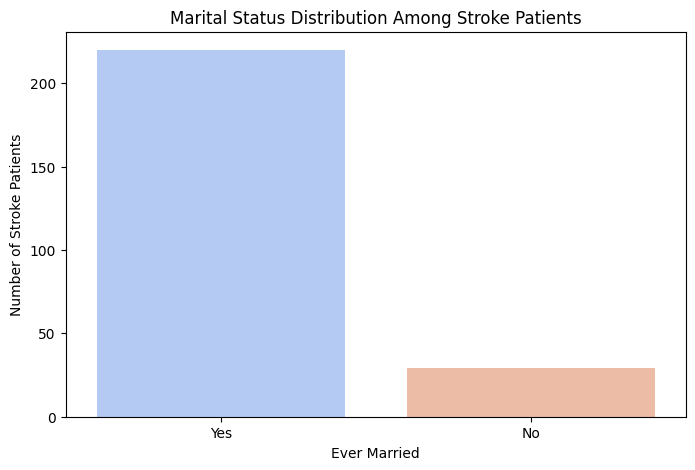


Percentage Distribution of Marital Status Among Stroke Patients:
marital_status
Yes    88.353414
No     11.646586
Name: count, dtype: float64


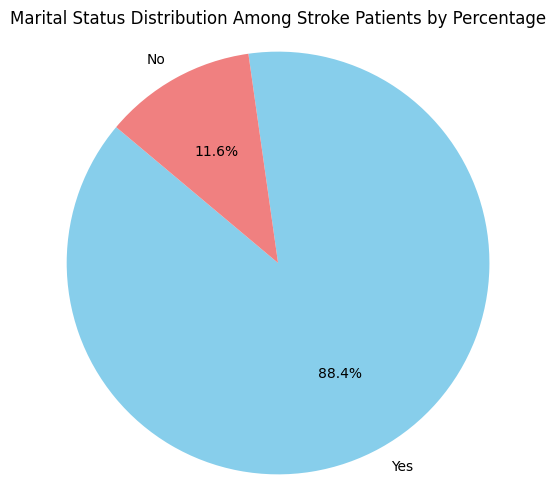

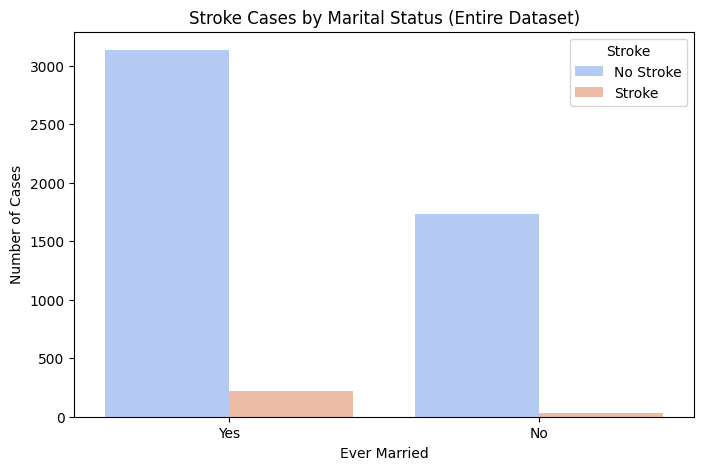


Percentage of Stroke within Marital Status (Entire Dataset):
stroke                  0         1
marital_status                     
No              98.349459  1.650541
Yes             93.438712  6.561288


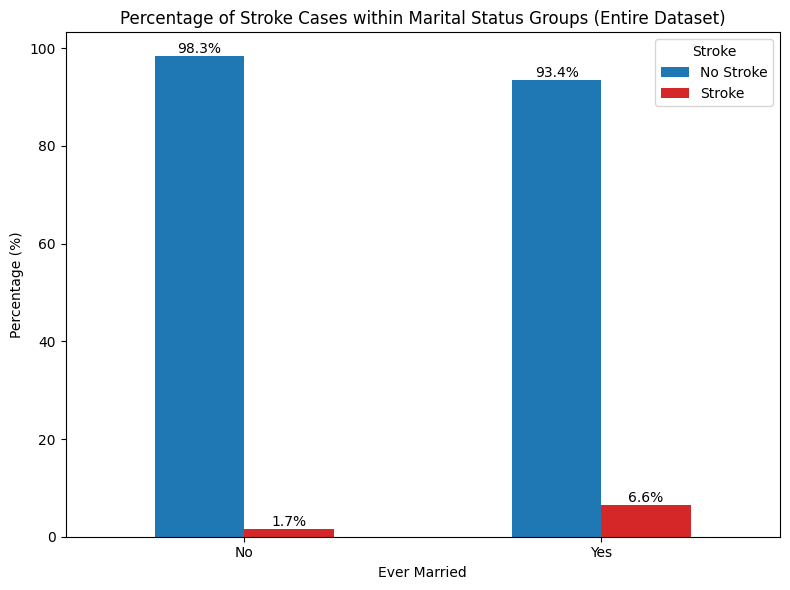


Reconstructed 'marital_status' column dropped from main DataFrame.


In [ ]:
# prompt: Stroke patient’s marital status.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for stroke patients
stroke_patients_married = df[df['stroke'] == 1].copy()

# The 'ever_married' column has been one-hot encoded into 'ever_married_Yes'
# We need to reconstruct the original 'ever_married' column for plotting
stroke_patients_married['marital_status'] = 'No'
stroke_patients_married.loc[stroke_patients_married['ever_married_Yes'] == 1, 'marital_status'] = 'Yes'


# Analyze the distribution of marital status among stroke patients
plt.figure(figsize=(8, 5))
sns.countplot(x='marital_status', data=stroke_patients_married, palette='coolwarm')
plt.title('Marital Status Distribution Among Stroke Patients')
plt.xlabel('Ever Married')
plt.ylabel('Number of Stroke Patients')
plt.show()

# Calculate the percentage distribution of marital status among stroke patients
marital_status_counts = stroke_patients_married['marital_status'].value_counts()
total_stroke_patients = marital_status_counts.sum()

if total_stroke_patients > 0:
    marital_status_percentage = (marital_status_counts / total_stroke_patients) * 100

    print("\nPercentage Distribution of Marital Status Among Stroke Patients:")
    print(marital_status_percentage)

    # Plotting the percentage distribution (Pie Chart)
    plt.figure(figsize=(6, 6))
    plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
    plt.title('Marital Status Distribution Among Stroke Patients by Percentage')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nNo stroke patients found to analyze marital status distribution.")

# Now, analyze the relationship between marital status and stroke for the *entire* dataset
plt.figure(figsize=(8, 5))
# Reconstruct 'marital_status' for the entire df for plotting
df['marital_status'] = 'No'
df.loc[df['ever_married_Yes'] == 1, 'marital_status'] = 'Yes'

sns.countplot(x='marital_status', hue='stroke', data=df, palette='coolwarm')
plt.title('Stroke Cases by Marital Status (Entire Dataset)')
plt.xlabel('Ever Married')
plt.ylabel('Number of Cases')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Calculate the proportion of stroke cases within each marital status group for the *entire* dataset
marital_status_stroke_proportion_total = df.groupby('marital_status')['stroke'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Stroke within Marital Status (Entire Dataset):")
print(marital_status_stroke_proportion_total)

# Plotting the percentage distribution (Stacked Bar Chart)
ax = marital_status_stroke_proportion_total.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#d62728'])
plt.title('Percentage of Stroke Cases within Marital Status Groups (Entire Dataset)')
plt.xlabel('Ever Married')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add text annotations for the percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

# Drop the reconstructed 'marital_status' column from the main df if not needed further to avoid confusion with encoded columns
if 'marital_status' in df.columns:
    df = df.drop('marital_status', axis=1)
    print("\nReconstructed 'marital_status' column dropped from main DataFrame.")


Number of Stroke Patients by Marital Status:
marital_status
Yes    220
No      29
Name: count, dtype: int64

Percentage of Stroke Patients by Marital Status:
marital_status
Yes    88.353414
No     11.646586
Name: count, dtype: float64


/tmp/ipython-input-27-1660665070.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital_status', data=stroke_patients_married, palette='coolwarm', order=marital_status_counts.index, ax=axes[0])


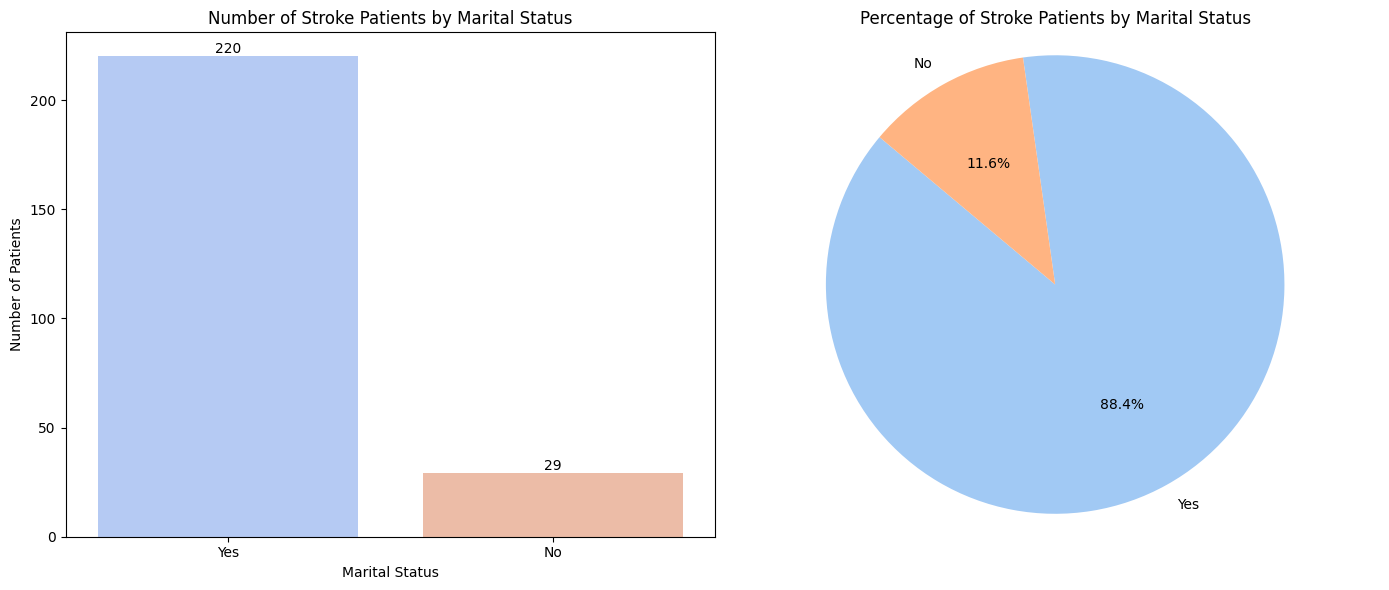


Reconstructed 'marital_status' column dropped from filtered DataFrame.


In [ ]:
# prompt: Stroke patient’s marital status colorful background color in single plot also percentage

import pandas as pd
import matplotlib.pyplot as plt
# Filter for stroke patients
stroke_patients_married = df[df['stroke'] == 1].copy()

# The 'ever_married' column has been one-hot encoded into 'ever_married_Yes'
# We need to reconstruct the original 'ever_married' column for plotting
stroke_patients_married['marital_status'] = 'No'
stroke_patients_married.loc[stroke_patients_married['ever_married_Yes'] == 1, 'marital_status'] = 'Yes'

# Calculate the count of stroke patients by marital status
marital_status_counts = stroke_patients_married['marital_status'].value_counts()

# Calculate the percentage of stroke patients by marital status
total_stroke_patients = marital_status_counts.sum()

print("\nNumber of Stroke Patients by Marital Status:")
print(marital_status_counts)

if total_stroke_patients > 0:
    marital_status_percentage = (marital_status_counts / total_stroke_patients) * 100

    print("\nPercentage of Stroke Patients by Marital Status:")
    print(marital_status_percentage)

    # Combine counts and percentages into a single DataFrame for plotting
    marital_status_plot_df = pd.DataFrame({'Count': marital_status_counts, 'Percentage': marital_status_percentage})

    # Plotting both count and percentage in a single figure using subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the count of stroke patients by marital status (Bar Plot)
    sns.countplot(x='marital_status', data=stroke_patients_married, palette='coolwarm', order=marital_status_counts.index, ax=axes[0])
    axes[0].set_title('Number of Stroke Patients by Marital Status')
    axes[0].set_xlabel('Marital Status')
    axes[0].set_ylabel('Number of Patients')

    # Add count labels to the bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d')


    # Plot the percentage of stroke patients by marital status (Pie Chart)
    # Use a colorful palette for the pie chart
    colorful_palette = sns.color_palette("pastel")[0:len(marital_status_percentage)]
    if not marital_status_percentage.empty:
        axes[1].pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=colorful_palette)
        axes[1].set_title('Percentage of Stroke Patients by Marital Status')
        axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        axes[1].text(0.5, 0.5, "No stroke patients found", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
        axes[1].set_title('Percentage of Stroke Patients by Marital Status')
        axes[1].axis('off')


    plt.tight_layout()
    plt.show()
else:
    print("\nNo stroke patients found to analyze marital status distribution.")

# Drop the reconstructed 'marital_status' column from the filtered df if not needed further
if 'marital_status' in stroke_patients_married.columns:
    stroke_patients_married = stroke_patients_married.drop('marital_status', axis=1)
    print("\nReconstructed 'marital_status' column dropped from filtered DataFrame.")

/tmp/ipython-input-28-4001583411.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_patients_smoking, palette='coolwarm', order=['formerly smoked', 'never smoked', 'smokes', 'Unknown'])


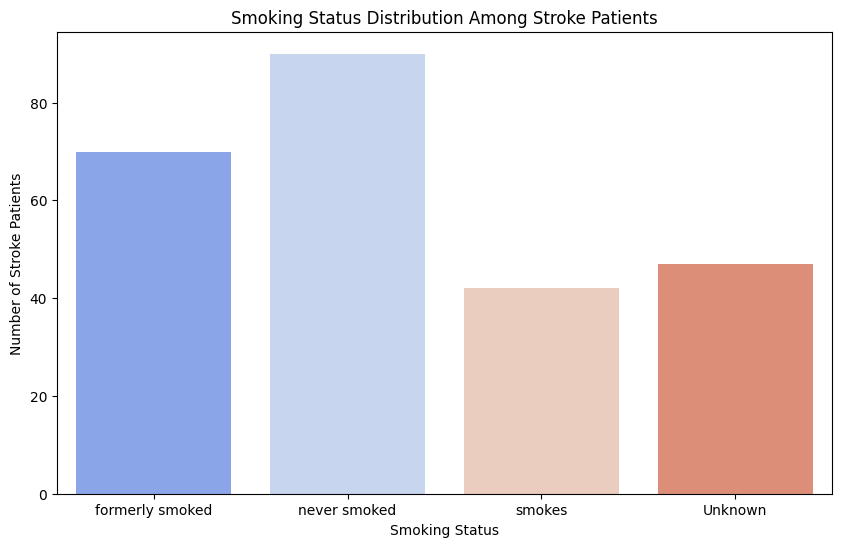


Percentage Distribution of Smoking Status Among Stroke Patients:
smoking_status
never smoked       36.144578
formerly smoked    28.112450
Unknown            18.875502
smokes             16.867470
Name: count, dtype: float64


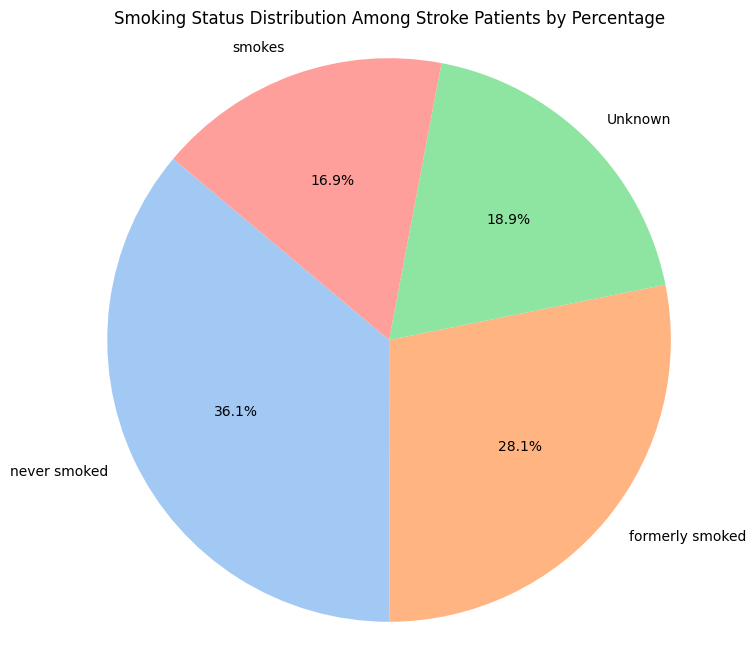

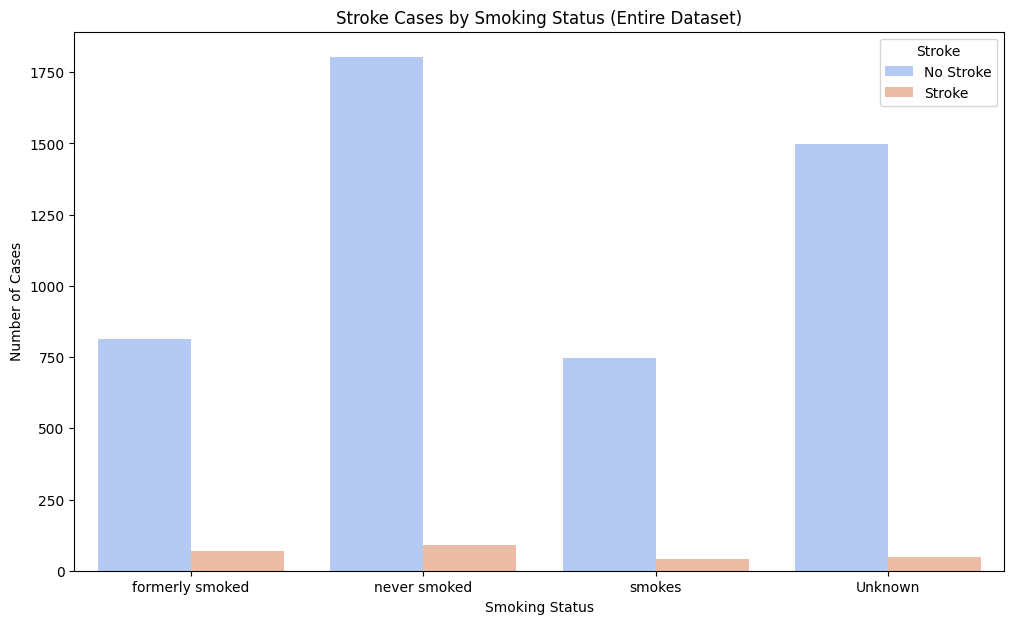


Percentage of Stroke within Smoking Status (Entire Dataset):
stroke                   0         1
smoking_status                      
Unknown          96.955959  3.044041
formerly smoked  92.090395  7.909605
never smoked     95.243129  4.756871
smokes           94.676806  5.323194


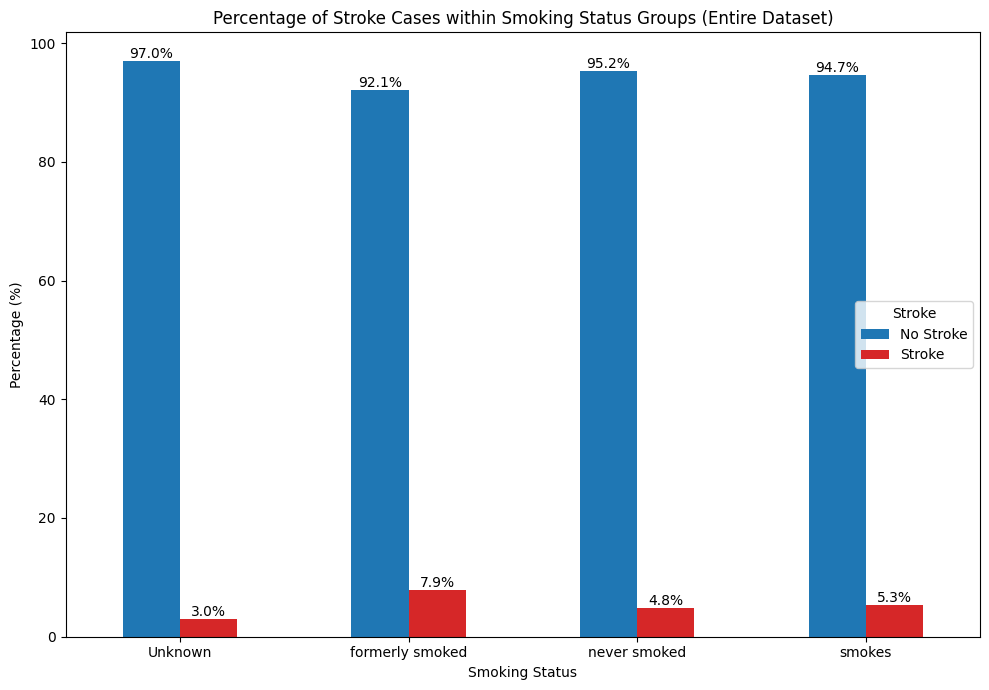


Reconstructed 'smoking_status' column dropped from main DataFrame.


In [ ]:
# prompt: Stroke patient’s smoking status.

import matplotlib.pyplot as plt
# Filter for stroke patients
stroke_patients_smoking = df[df['stroke'] == 1].copy()

# The 'smoking_status' column has been one-hot encoded into:
# 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
# 'Unknown' is the base/dropped category.
# We need to reconstruct the original 'smoking_status' column for plotting

stroke_patients_smoking['smoking_status'] = 'Unknown' # Default to Unknown
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_formerly smoked'] == 1, 'smoking_status'] = 'formerly smoked'
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_never smoked'] == 1, 'smoking_status'] = 'never smoked'
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_smokes'] == 1, 'smoking_status'] = 'smokes'


# Analyze the distribution of smoking status among stroke patients
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', data=stroke_patients_smoking, palette='coolwarm', order=['formerly smoked', 'never smoked', 'smokes', 'Unknown'])
plt.title('Smoking Status Distribution Among Stroke Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Stroke Patients')
plt.show()

# Calculate the percentage distribution of smoking status among stroke patients
smoking_status_counts = stroke_patients_smoking['smoking_status'].value_counts()
total_stroke_patients = smoking_status_counts.sum()

if total_stroke_patients > 0:
    smoking_status_percentage = (smoking_status_counts / total_stroke_patients) * 100

    print("\nPercentage Distribution of Smoking Status Among Stroke Patients:")
    print(smoking_status_percentage)

    # Plotting the percentage distribution (Pie Chart)
    plt.figure(figsize=(8, 8))
    plt.pie(smoking_status_percentage, labels=smoking_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Smoking Status Distribution Among Stroke Patients by Percentage')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nNo stroke patients found to analyze smoking status distribution.")

# Now, analyze the relationship between smoking status and stroke for the *entire* dataset
plt.figure(figsize=(12, 7))
# Reconstruct 'smoking_status' for the entire df for plotting
df['smoking_status'] = 'Unknown' # Default to Unknown
df.loc[df['smoking_status_formerly smoked'] == 1, 'smoking_status'] = 'formerly smoked'
df.loc[df['smoking_status_never smoked'] == 1, 'smoking_status'] = 'never smoked'
df.loc[df['smoking_status_smokes'] == 1, 'smoking_status'] = 'smokes'

sns.countplot(x='smoking_status', hue='stroke', data=df, palette='coolwarm', order=['formerly smoked', 'never smoked', 'smokes', 'Unknown'])
plt.title('Stroke Cases by Smoking Status (Entire Dataset)')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Cases')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Calculate the proportion of stroke cases within each smoking status group for the *entire* dataset
smoking_status_stroke_proportion_total = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Stroke within Smoking Status (Entire Dataset):")
print(smoking_status_stroke_proportion_total)

# Plotting the percentage distribution (Stacked Bar Chart)
ax = smoking_status_stroke_proportion_total.plot(kind='bar', stacked=False, figsize=(10, 7), color=['#1f77b4', '#d62728'])
plt.title('Percentage of Stroke Cases within Smoking Status Groups (Entire Dataset)')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add text annotations for the percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

# Drop the reconstructed 'smoking_status' column from the main df if not needed further
if 'smoking_status' in df.columns:
    df = df.drop('smoking_status', axis=1)
    print("\nReconstructed 'smoking_status' column dropped from main DataFrame.")


Number of Stroke Patients by Smoking Status:
smoking_status
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: count, dtype: int64

Percentage of Stroke Patients by Smoking Status:
smoking_status
never smoked       36.144578
formerly smoked    28.112450
Unknown            18.875502
smokes             16.867470
Name: count, dtype: float64


/tmp/ipython-input-29-1108881604.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_patients_smoking, palette='coolwarm', order=smoking_status_counts.index, ax=axes[0])


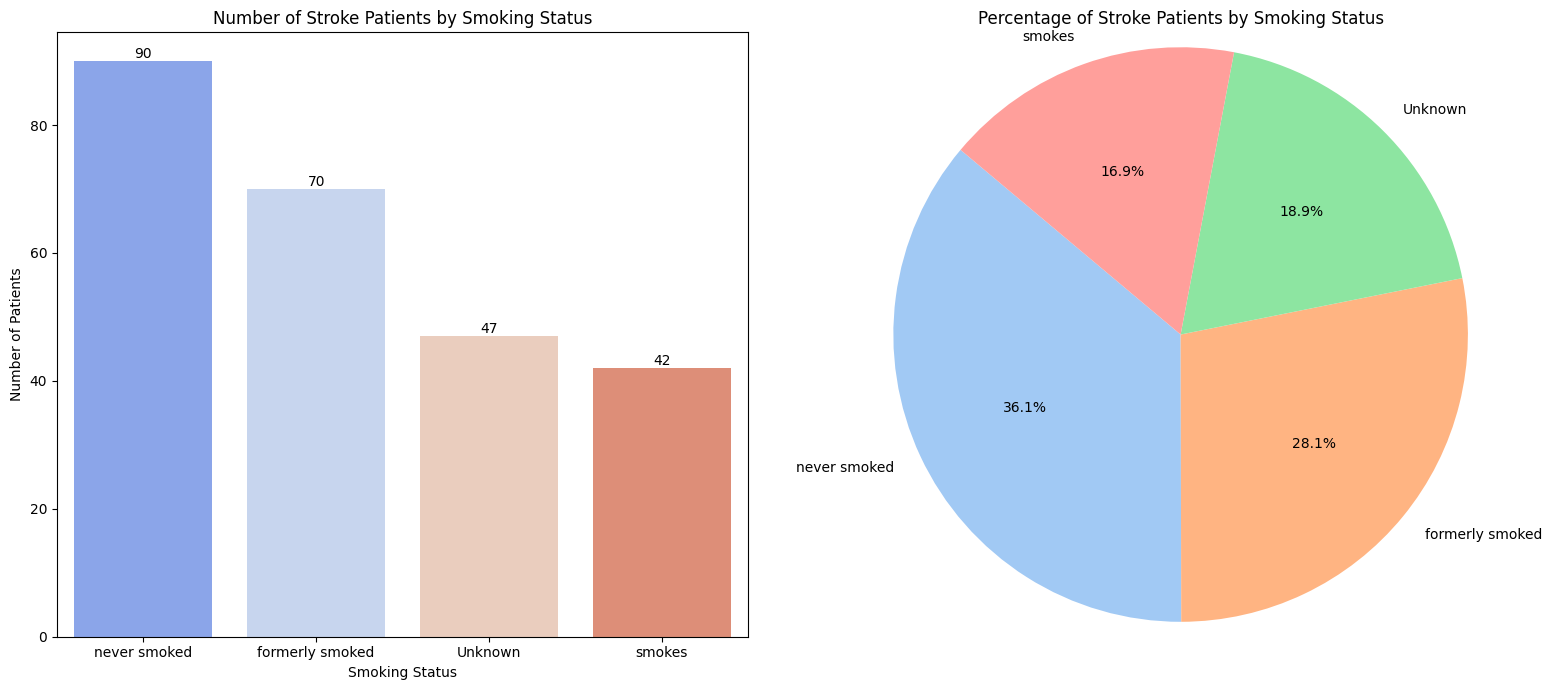


Reconstructed 'smoking_status' column dropped from filtered DataFrame.


In [ ]:
# prompt: Stroke patient’s smoking status in a single plot values and percentage

import pandas as pd
import matplotlib.pyplot as plt
# Filter for stroke patients
stroke_patients_smoking = df[df['stroke'] == 1].copy()

# The 'smoking_status' column has been one-hot encoded into:
# 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
# 'Unknown' is the base/dropped category.
# We need to reconstruct the original 'smoking_status' column for plotting

stroke_patients_smoking['smoking_status'] = 'Unknown' # Default to Unknown
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_formerly smoked'] == 1, 'smoking_status'] = 'formerly smoked'
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_never smoked'] == 1, 'smoking_status'] = 'never smoked'
stroke_patients_smoking.loc[stroke_patients_smoking['smoking_status_smokes'] == 1, 'smoking_status'] = 'smokes'

# Calculate the count of stroke patients by smoking status
smoking_status_counts = stroke_patients_smoking['smoking_status'].value_counts()

# Calculate the percentage of stroke patients by smoking status
total_stroke_patients = smoking_status_counts.sum()

print("\nNumber of Stroke Patients by Smoking Status:")
print(smoking_status_counts)

if total_stroke_patients > 0:
    smoking_status_percentage = (smoking_status_counts / total_stroke_patients) * 100

    print("\nPercentage of Stroke Patients by Smoking Status:")
    print(smoking_status_percentage)

    # Combine counts and percentages into a single DataFrame for plotting
    smoking_status_plot_df = pd.DataFrame({'Count': smoking_status_counts, 'Percentage': smoking_status_percentage})

    # Plotting both count and percentage in a single figure using subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # Increased figure size for better readability

    # Plot the count of stroke patients by smoking status (Bar Plot)
    sns.countplot(x='smoking_status', data=stroke_patients_smoking, palette='coolwarm', order=smoking_status_counts.index, ax=axes[0])
    axes[0].set_title('Number of Stroke Patients by Smoking Status')
    axes[0].set_xlabel('Smoking Status')
    axes[0].set_ylabel('Number of Patients')
    axes[0].tick_params(axis='x', rotation=0) # Keep x-axis labels horizontal

    # Add count labels to the bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d')

    # Plot the percentage of stroke patients by smoking status (Pie Chart)
    # Use a colorful palette for the pie chart
    colorful_palette = sns.color_palette("pastel")[0:len(smoking_status_percentage)]
    if not smoking_status_percentage.empty:
        axes[1].pie(smoking_status_percentage, labels=smoking_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=colorful_palette)
        axes[1].set_title('Percentage of Stroke Patients by Smoking Status')
        axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        axes[1].text(0.5, 0.5, "No stroke patients found", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
        axes[1].set_title('Percentage of Stroke Patients by Smoking Status')
        axes[1].axis('off')


    plt.tight_layout()
    plt.show()
else:
    print("\nNo stroke patients found to analyze smoking status distribution.")

# Drop the reconstructed 'smoking_status' column from the filtered df if not needed further
if 'smoking_status' in stroke_patients_smoking.columns:
    stroke_patients_smoking = stroke_patients_smoking.drop('smoking_status', axis=1)
    print("\nReconstructed 'smoking_status' column dropped from filtered DataFrame.")


Number of Stroke Patients by Work Type:
work_type
Private          149
Self-employed     65
Never_worked      33
children           2
Name: count, dtype: int64

Percentage of Stroke Patients by Work Type:
work_type
Private          59.839357
Self-employed    26.104418
Never_worked     13.253012
children          0.803213
Name: count, dtype: float64


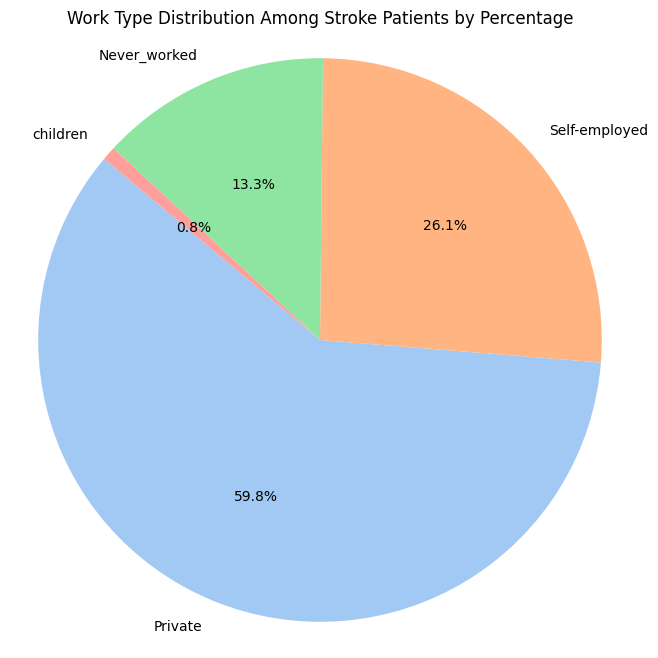


Reconstructed 'work_type' column dropped from filtered DataFrame.


In [ ]:
# prompt: occupation type of stroke patient’s pi chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for stroke patients
stroke_patients_work_type = df[df['stroke'] == 1].copy()

# The 'work_type' column has been one-hot encoded into:
# 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'
# We need to reconstruct the original 'work_type' column for plotting

# Identify the one-hot encoded work type columns that are present in the DataFrame
work_type_encoded_cols = [col for col in stroke_patients_work_type.columns if col.startswith('work_type_')]

# Reconstruct the original 'work_type' column
# For each row, find the column among the encoded ones that is True (1)
# and extract the original work type name (removing 'work_type_')
# If none are True, it's the base category ('children' in this case)
# Use .fillna('children') to handle potential rows where none of the encoded columns are 1 (though this is unlikely with proper one-hot encoding)
stroke_patients_work_type['work_type'] = stroke_patients_work_type[work_type_encoded_cols].idxmax(axis=1).str.replace('work_type_', '').fillna('children')


# Calculate the count of stroke patients by work type
work_type_counts = stroke_patients_work_type['work_type'].value_counts()

# Calculate the percentage of stroke patients by work type
total_stroke_patients = work_type_counts.sum()

print("\nNumber of Stroke Patients by Work Type:")
print(work_type_counts)

if total_stroke_patients > 0:
    work_type_percentage = (work_type_counts / total_stroke_patients) * 100

    print("\nPercentage of Stroke Patients by Work Type:")
    print(work_type_percentage)

    # Combine counts and percentages into a single DataFrame for plotting
    work_type_plot_df = pd.DataFrame({'Count': work_type_counts, 'Percentage': work_type_percentage})

    # Plotting the percentage distribution (Pie Chart)
    plt.figure(figsize=(8, 8))
    plt.pie(work_type_percentage, labels=work_type_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Work Type Distribution Among Stroke Patients by Percentage')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nNo stroke patients found to analyze work type distribution.")

# Drop the reconstructed 'work_type' column from the filtered df if not needed further
if 'work_type' in stroke_patients_work_type.columns:
    stroke_patients_work_type = stroke_patients_work_type.drop('work_type', axis=1)
    print("\nReconstructed 'work_type' column dropped from filtered DataFrame.")


Number of Stroke Patients by Residence Type:
Residence_type
Urban    135
Rural    114
Name: count, dtype: int64

Percentage of Stroke Patients by Residence Type:
Residence_type
Urban    54.216867
Rural    45.783133
Name: count, dtype: float64


/tmp/ipython-input-31-2454119937.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Residence_type', data=stroke_patients_residence, palette='coolwarm', order=residence_type_counts.index, ax=axes[0])


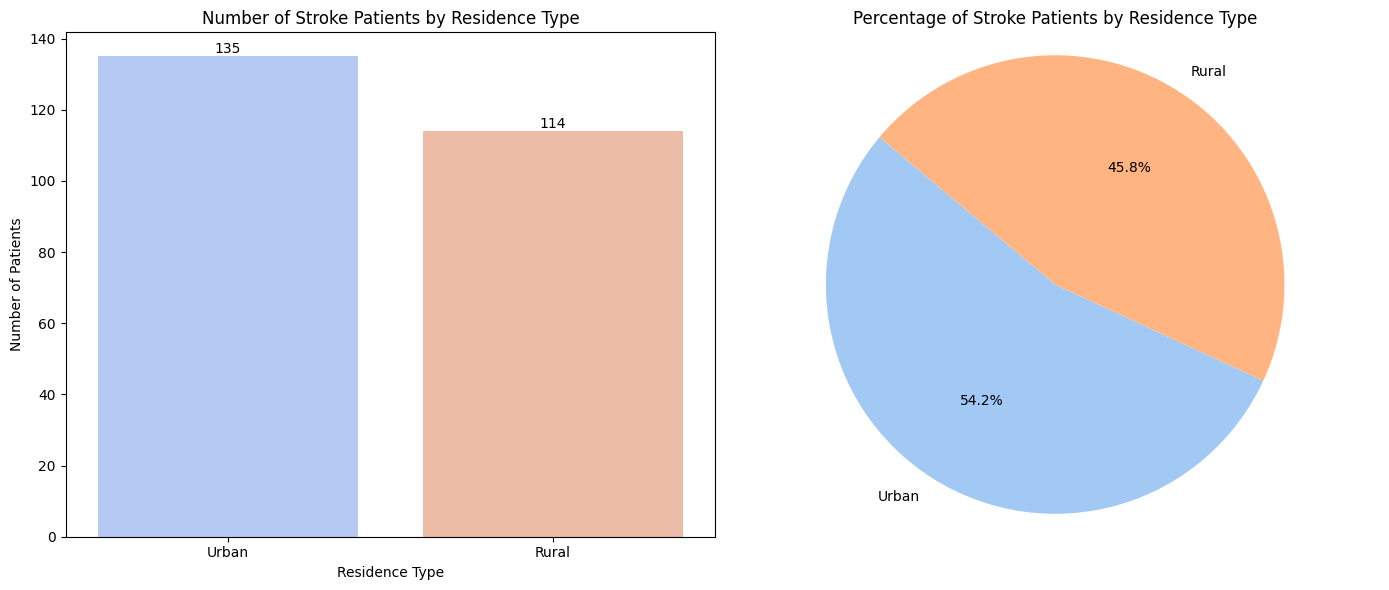


Reconstructed 'Residence_type' column dropped from filtered DataFrame.


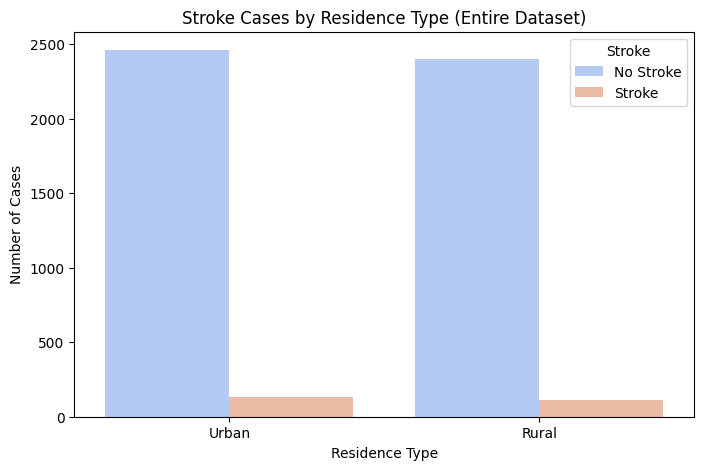


Percentage of Stroke within Residence Type (Entire Dataset):
stroke                  0         1
Residence_type                     
Rural           95.465394  4.534606
Urban           94.799692  5.200308


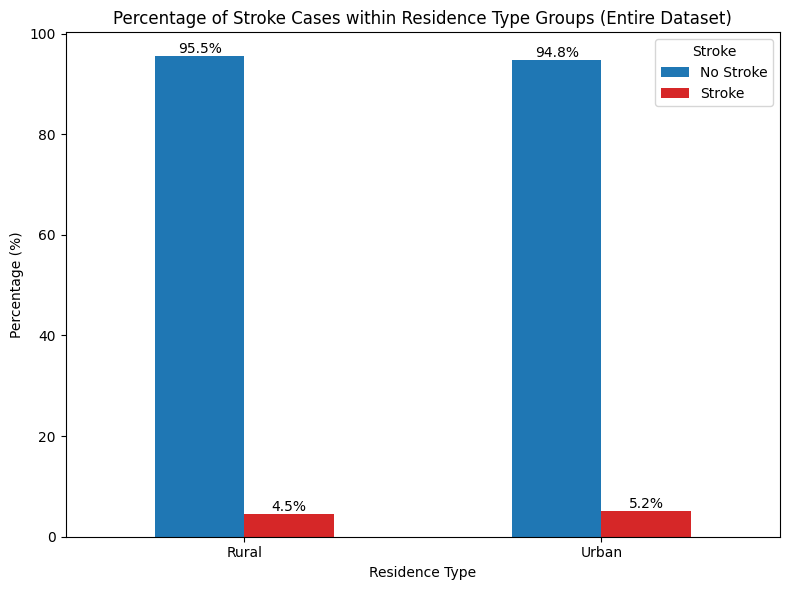


Reconstructed 'Residence_type' column dropped from main DataFrame.


In [ ]:
# prompt: Stroke patient’s residence type

import pandas as pd
import matplotlib.pyplot as plt
# Filter for stroke patients
stroke_patients_residence = df[df['stroke'] == 1].copy()

# The 'Residence_type' column has been one-hot encoded into:
# 'Residence_type_Urban'
# 'Rural' is the base/dropped category.
# We need to reconstruct the original 'Residence_type' column for plotting

stroke_patients_residence['Residence_type'] = 'Rural' # Default to Rural
stroke_patients_residence.loc[stroke_patients_residence['Residence_type_Urban'] == 1, 'Residence_type'] = 'Urban'

# Calculate the count of stroke patients by residence type
residence_type_counts = stroke_patients_residence['Residence_type'].value_counts()

# Calculate the percentage of stroke patients by residence type
total_stroke_patients = residence_type_counts.sum()

print("\nNumber of Stroke Patients by Residence Type:")
print(residence_type_counts)

if total_stroke_patients > 0:
    residence_type_percentage = (residence_type_counts / total_stroke_patients) * 100

    print("\nPercentage of Stroke Patients by Residence Type:")
    print(residence_type_percentage)

    # Combine counts and percentages into a single DataFrame for plotting
    residence_type_plot_df = pd.DataFrame({'Count': residence_type_counts, 'Percentage': residence_type_percentage})

    # Plotting both count and percentage in a single figure using subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the count of stroke patients by residence type (Bar Plot)
    sns.countplot(x='Residence_type', data=stroke_patients_residence, palette='coolwarm', order=residence_type_counts.index, ax=axes[0])
    axes[0].set_title('Number of Stroke Patients by Residence Type')
    axes[0].set_xlabel('Residence Type')
    axes[0].set_ylabel('Number of Patients')

    # Add count labels to the bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d')

    # Plot the percentage of stroke patients by residence type (Pie Chart)
    # Use a colorful palette for the pie chart
    colorful_palette = sns.color_palette("pastel")[0:len(residence_type_percentage)]
    if not residence_type_percentage.empty:
        axes[1].pie(residence_type_percentage, labels=residence_type_percentage.index, autopct='%1.1f%%', startangle=140, colors=colorful_palette)
        axes[1].set_title('Percentage of Stroke Patients by Residence Type')
        axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    else:
        axes[1].text(0.5, 0.5, "No stroke patients found", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
        axes[1].set_title('Percentage of Stroke Patients by Residence Type')
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("\nNo stroke patients found to analyze residence type distribution.")

# Drop the reconstructed 'Residence_type' column from the filtered df if not needed further
if 'Residence_type' in stroke_patients_residence.columns:
    stroke_patients_residence = stroke_patients_residence.drop('Residence_type', axis=1)
    print("\nReconstructed 'Residence_type' column dropped from filtered DataFrame.")

# Now, analyze the relationship between residence type and stroke for the *entire* dataset
plt.figure(figsize=(8, 5))
# Reconstruct 'Residence_type' for the entire df for plotting
df['Residence_type'] = 'Rural' # Default to Rural
df.loc[df['Residence_type_Urban'] == 1, 'Residence_type'] = 'Urban'

sns.countplot(x='Residence_type', hue='stroke', data=df, palette='coolwarm')
plt.title('Stroke Cases by Residence Type (Entire Dataset)')
plt.xlabel('Residence Type')
plt.ylabel('Number of Cases')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Calculate the proportion of stroke cases within each residence type group for the *entire* dataset
residence_type_stroke_proportion_total = df.groupby('Residence_type')['stroke'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of Stroke within Residence Type (Entire Dataset):")
print(residence_type_stroke_proportion_total)

# Plotting the percentage distribution (Stacked Bar Chart)
ax = residence_type_stroke_proportion_total.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#d62728'])
plt.title('Percentage of Stroke Cases within Residence Type Groups (Entire Dataset)')
plt.xlabel('Residence Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Add text annotations for the percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

# Drop the reconstructed 'Residence_type' column from the main df if not needed further
if 'Residence_type' in df.columns:
    df = df.drop('Residence_type', axis=1)
    print("\nReconstructed 'Residence_type' column dropped from main DataFrame.")

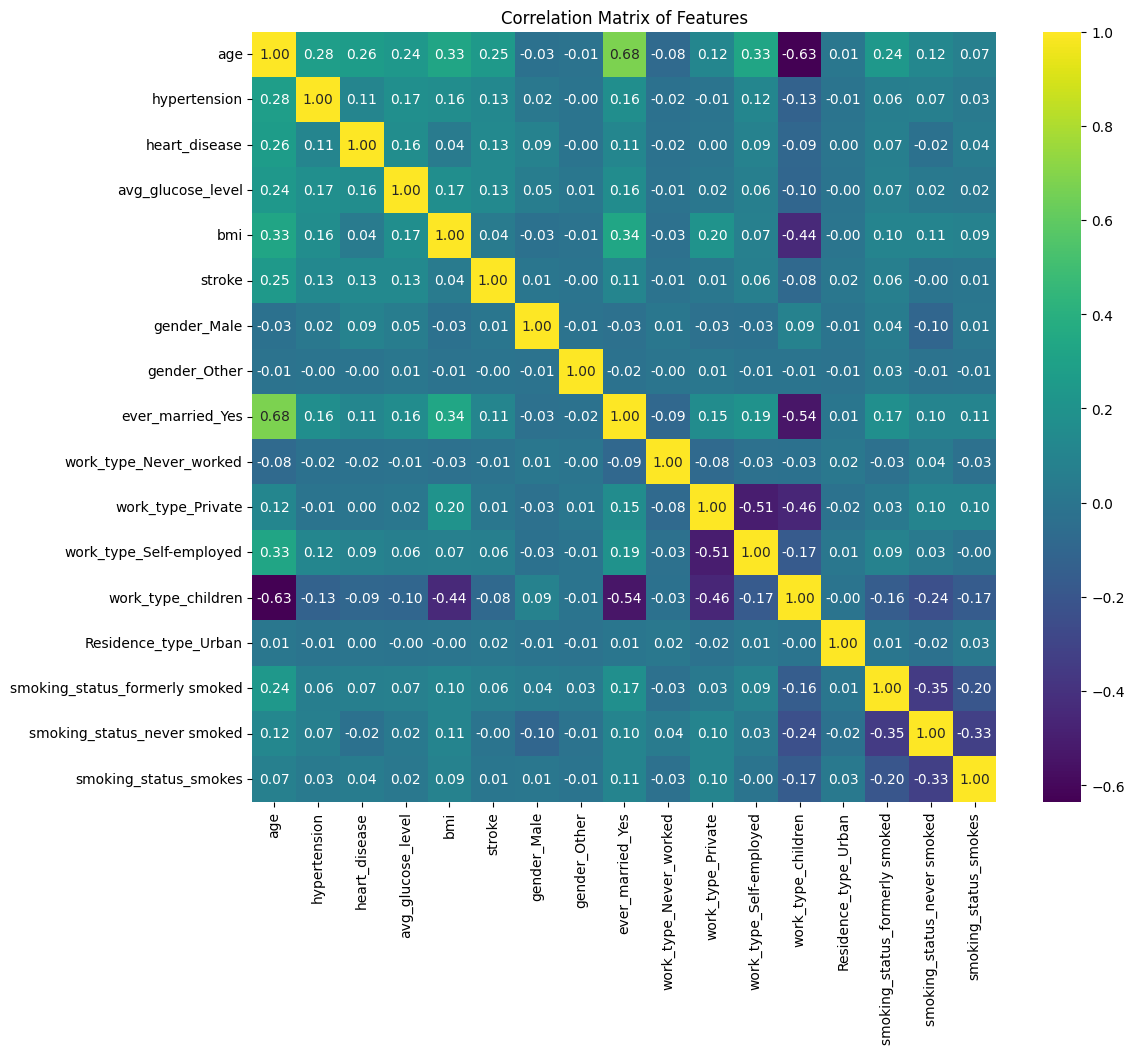

In [ ]:
# prompt: Correlation map of features

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


Numerical features selected for clustering:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

Scaled numerical features:


age  hypertension  heart_disease  avg_glucose_level           bmi
0  1.051434     -0.328602       4.185032           2.706375  1.001234e+00
1  0.786070     -0.328602      -0.238947           2.121559  4.615554e-16
2  1.626390     -0.328602       4.185032          -0.005028  4.685773e-01
3  0.255342     -0.328602      -0.238947           1.437358  7.154182e-01
4  1.582163      3.043196      -0.238947           1.501184 -6.357112e-01

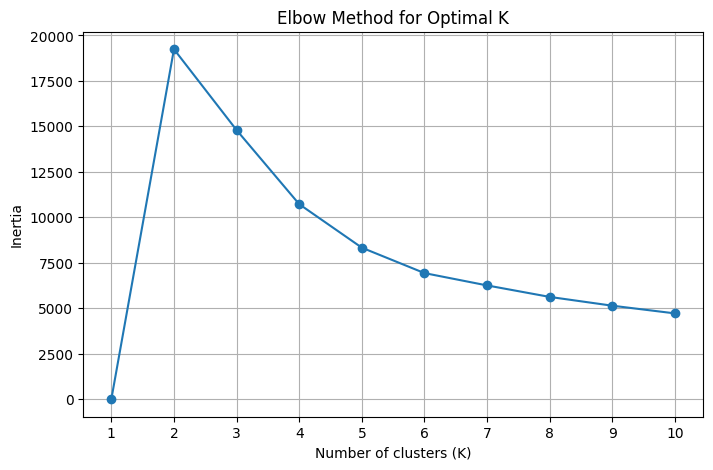


DataFrame with 3 clusters assigned:


age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False                     True               False   
2               True                    False               False   
3               True                    False               False   
4              False                     True               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                            True   
1                 False                           False   
2                 False                           False   
3                  True                           False   
4                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  Cluster  
0                        False                  False        2  
1                         True                  False        1  
2                         True                  False        2  
3                        False                   True        1  
4                         True                  False        0


Features selected for Pairplot visualization:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'Cluster']

Generating Pairplot...


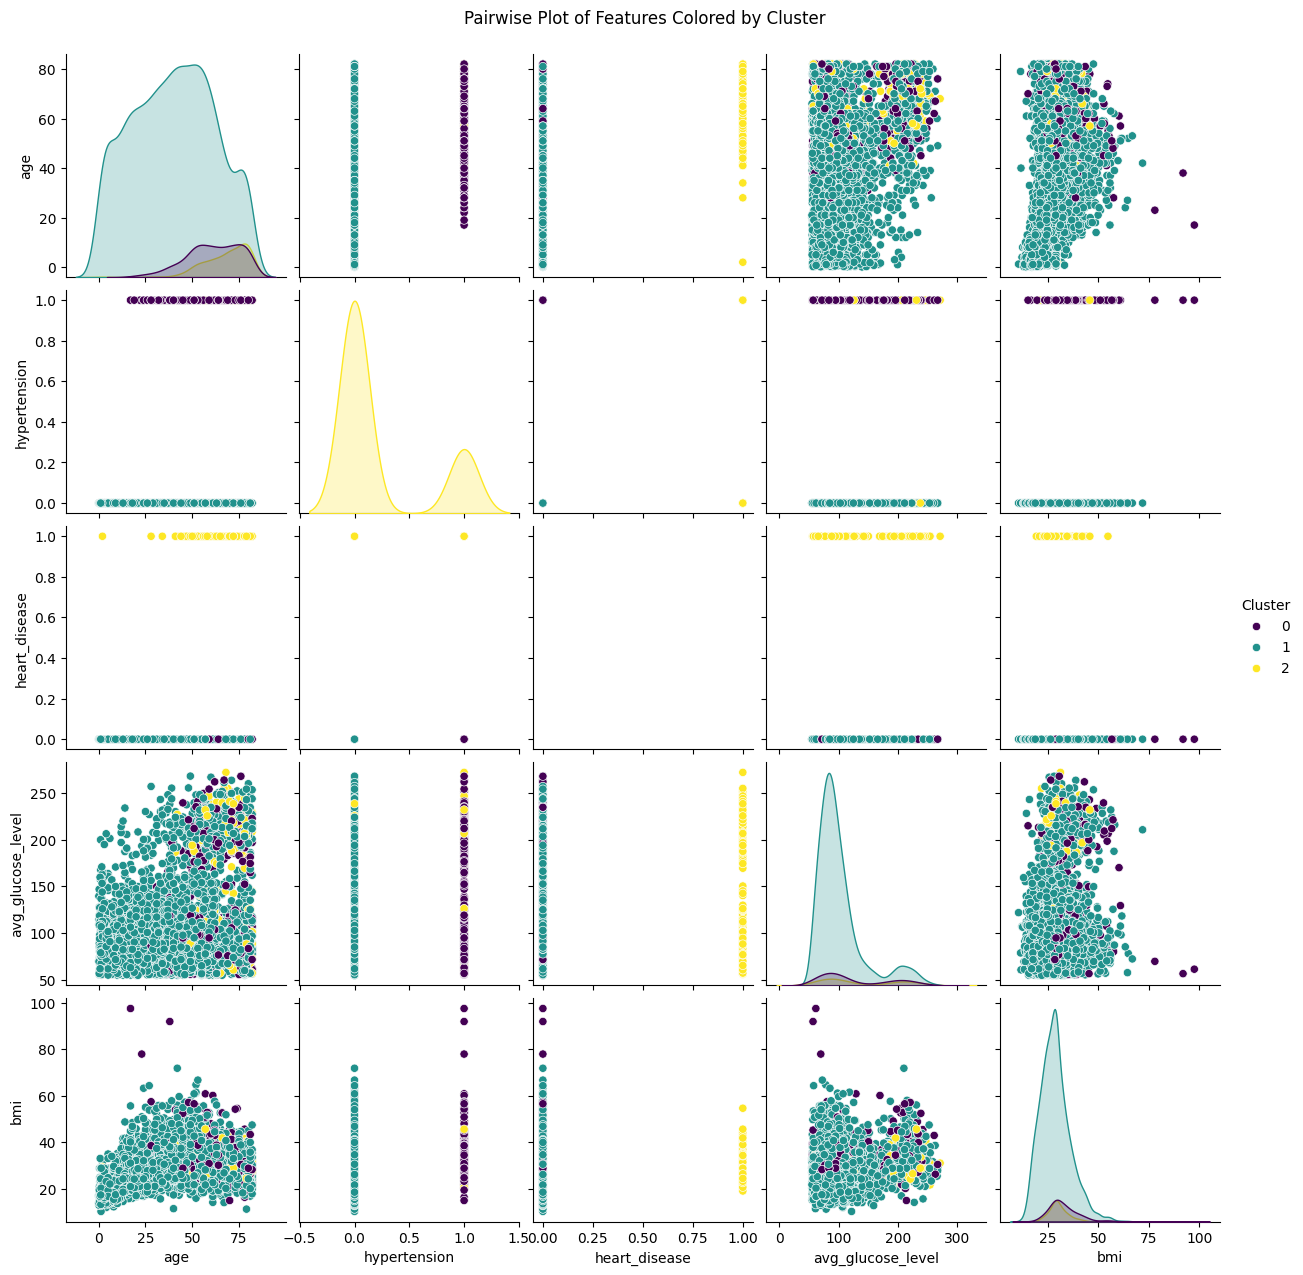

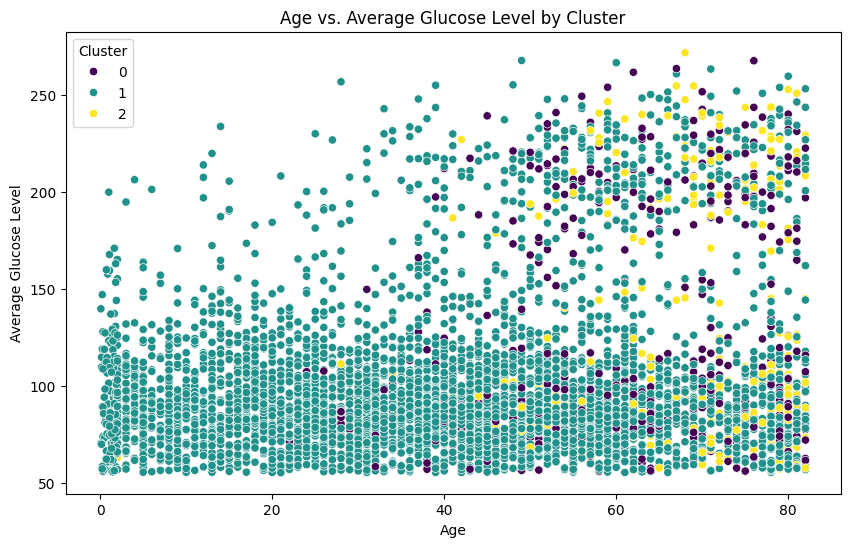

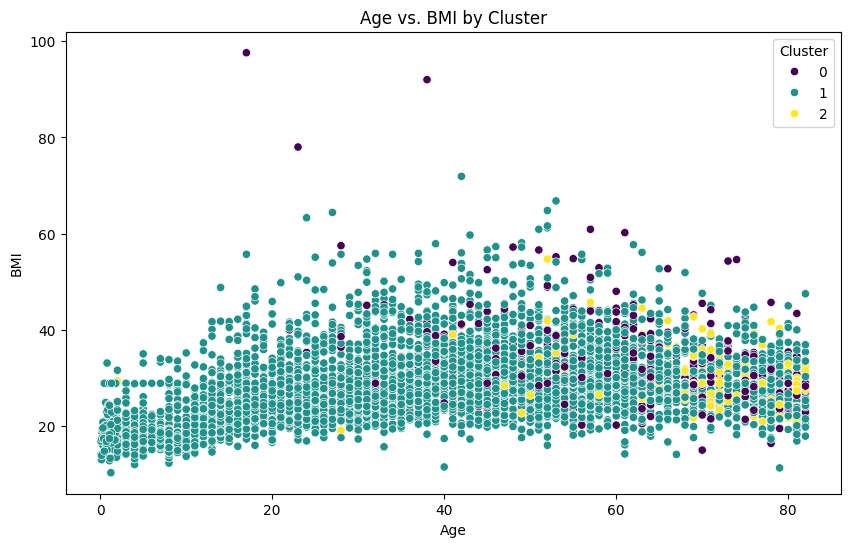


Mean of Numerical Features per Cluster:


age  hypertension  heart_disease  avg_glucose_level        bmi
Cluster                                                                      
0        61.016129      1.000000            0.0         127.089562  32.866412
1        39.906136      0.000000            0.0         102.158132  28.422737
2        68.188406      0.231884            1.0         136.818768  30.146293


Analyzing categorical feature distribution within each cluster:

Distribution of 'gender' by Cluster:


gender      Female       Male     Other
Cluster                                
0        56.912442  43.087558  0.000000
1        59.863636  40.113636  0.022727
2        40.942029  59.057971  0.000000

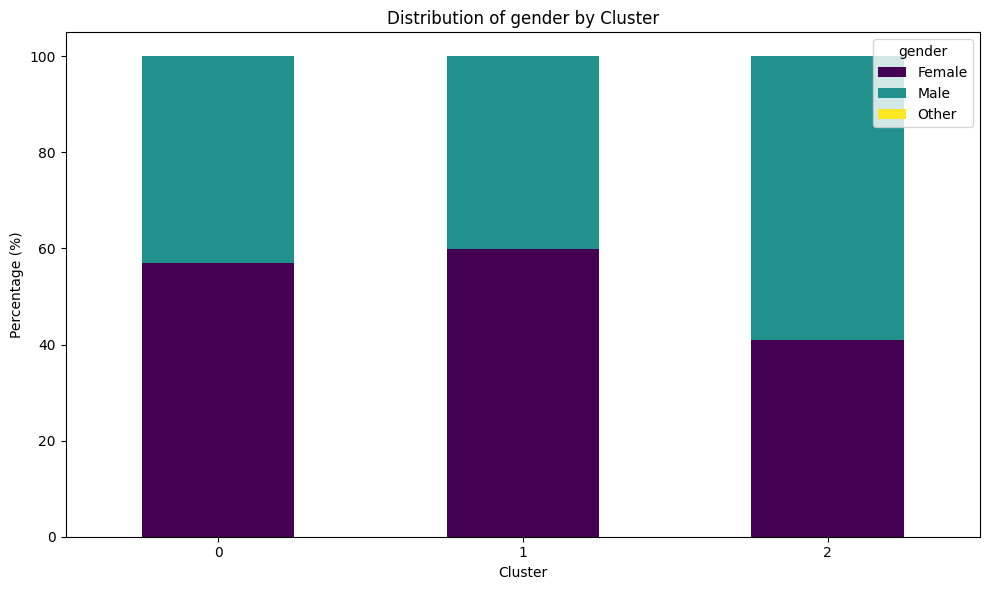


Distribution of 'ever_married' by Cluster:


ever_married         No        Yes
Cluster                           
0             10.138249  89.861751
1             38.204545  61.795455
2             11.594203  88.405797

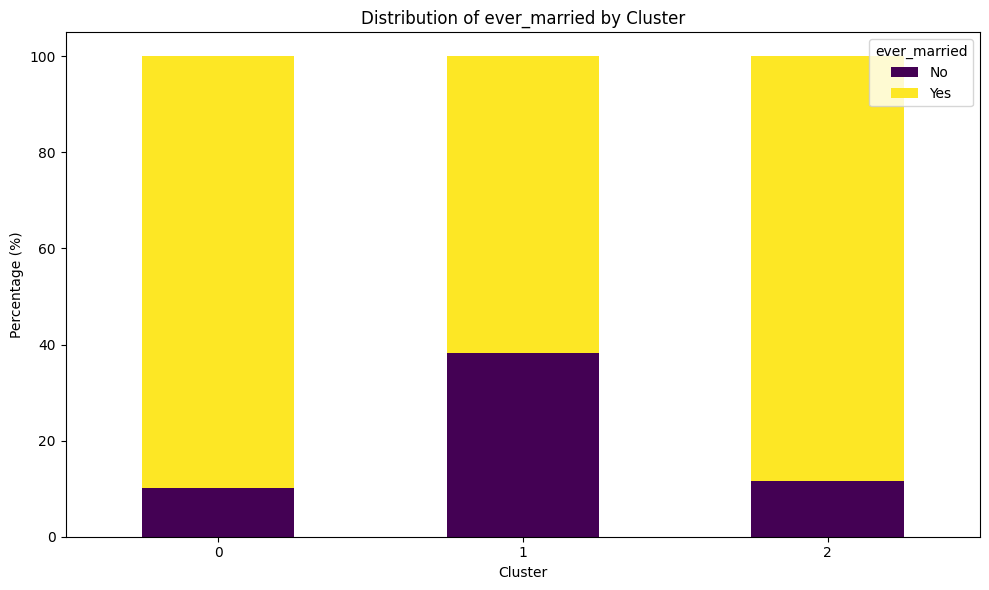


Distribution of 'work_type' by Cluster:


work_type  Never_worked    Private  Self-employed   children
Cluster                                                     
0             14.516129  55.760369      29.723502   0.000000
1             13.181818  57.386364      13.840909  15.590909
2             13.043478  57.246377      29.347826   0.362319

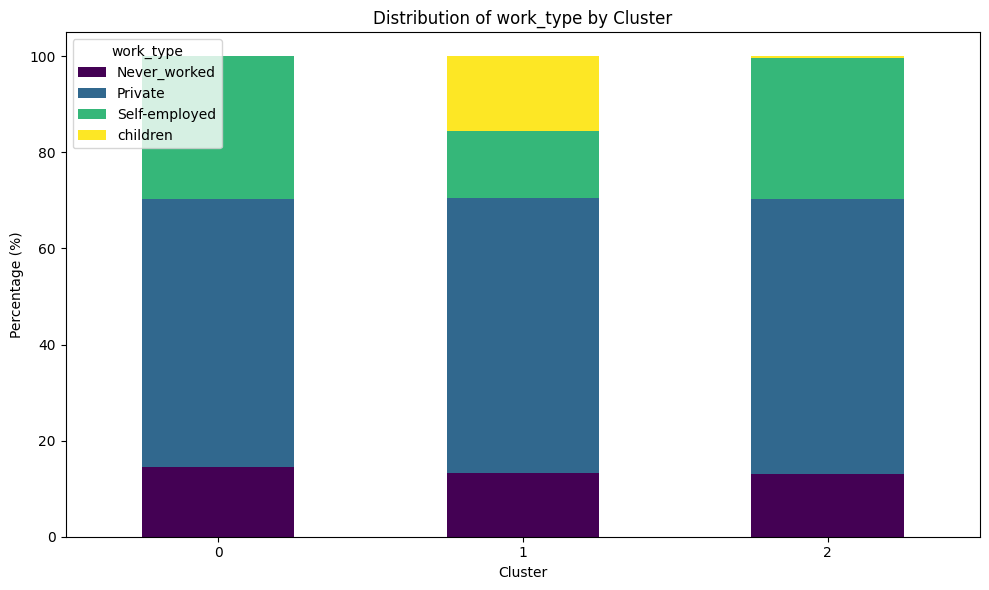


Distribution of 'Residence_type' by Cluster:


Residence_type      Rural      Urban
Cluster                             
0               50.230415  49.769585
1               49.136364  50.863636
2               48.550725  51.449275

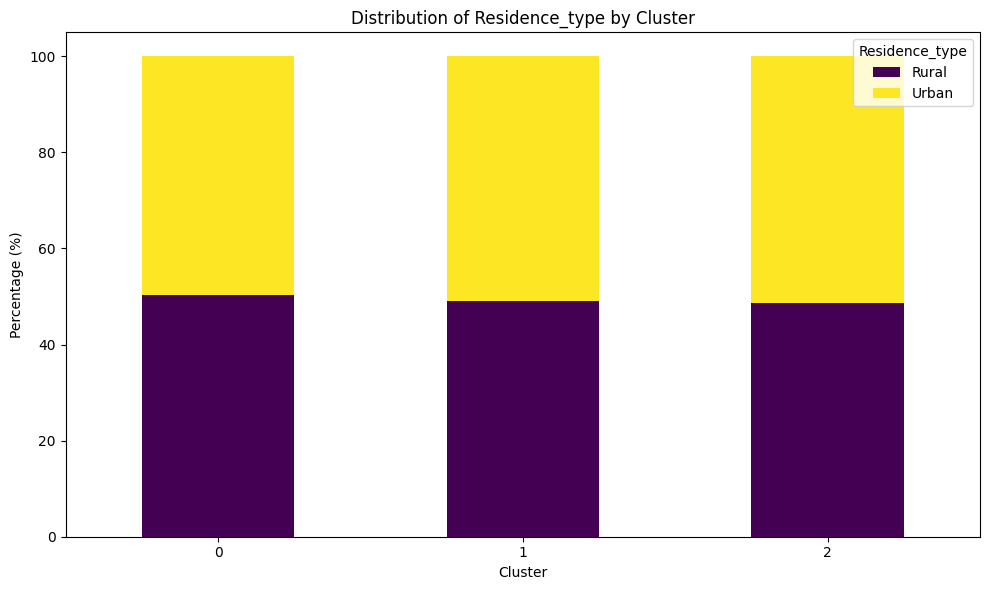


Distribution of 'smoking_status' by Cluster:


smoking_status    Unknown  formerly smoked  never smoked     smokes
Cluster                                                            
0               10.829493        22.811060     48.156682  18.202765
1               32.931818        16.113636     36.204545  14.750000
2               17.391304        27.898551     32.608696  22.101449

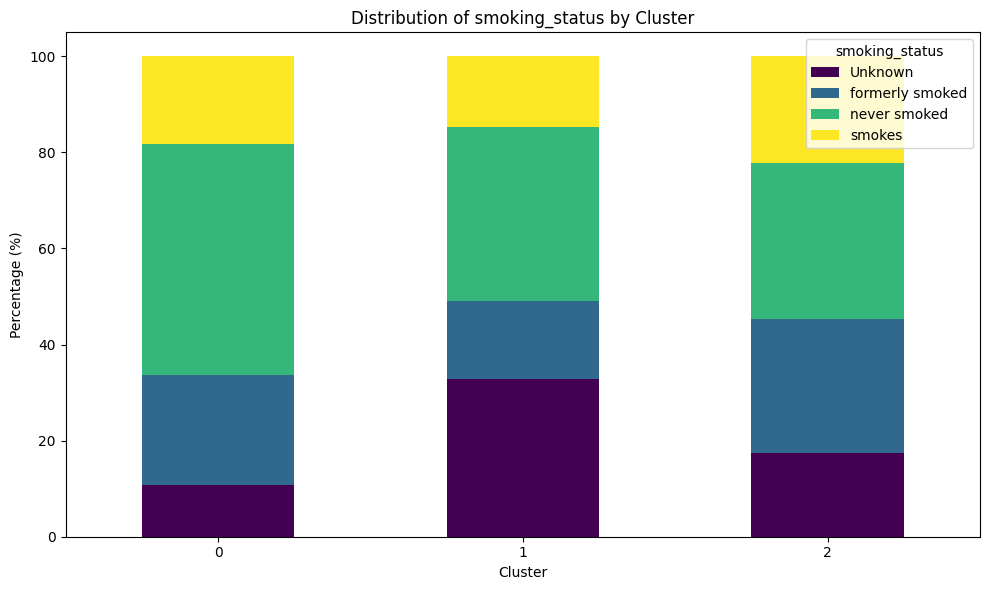


Distribution of 'stroke' by Cluster:


stroke           0          1
Cluster                      
0        87.788018  12.211982
1        96.613636   3.386364
2        82.971014  17.028986

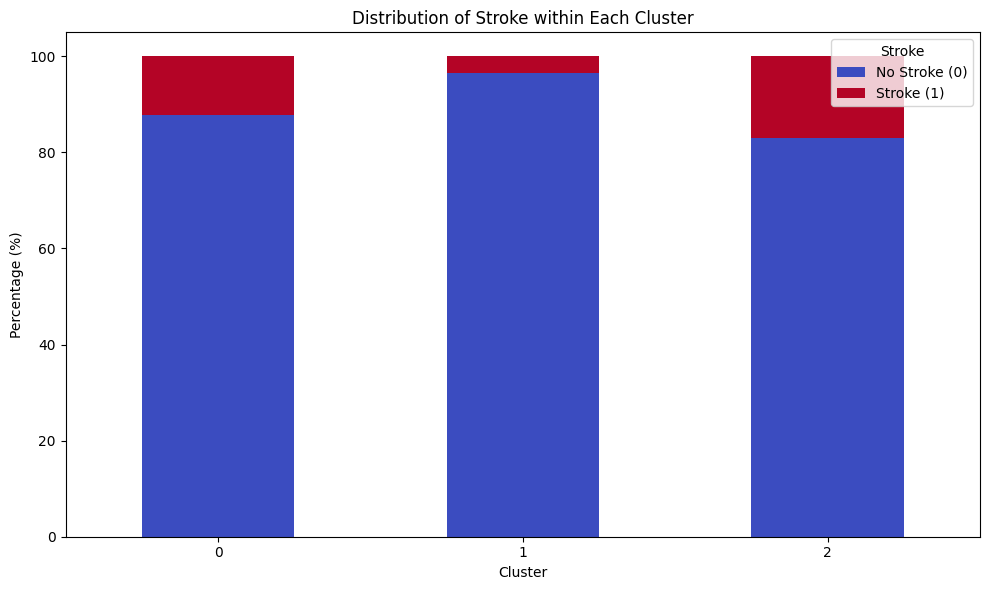

In [ ]:
# prompt: Visualization of clustering of each feature with othe

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numerical features for clustering
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable 'stroke'
if 'stroke' in numerical_features:
    numerical_features.remove('stroke')

print("Numerical features selected for clustering:")
print(numerical_features)

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

print("\nScaled numerical features:")
display(df_scaled.head())

# Determine the optimal number of clusters (using the elbow method as an example)
inertia = []
max_clusters = min(11, df_scaled.shape[0]) # Limit clusters to avoid issues with small datasets
K = range(1, max_clusters)
for k in K:
    if k == 1: # KMeans with 1 cluster is just the mean
        inertia.append(0) # Inertia is 0 for a single cluster
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Explicitly set n_init
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K)
plt.grid(True)
plt.show()

# Choose an appropriate number of clusters based on the elbow plot
# Let's assume 3 clusters based on a potential elbow (you might adjust this based on your plot)
n_clusters = 3 # Adjust this based on the elbow method result

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Explicitly set n_init
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

print(f"\nDataFrame with {n_clusters} clusters assigned:")
display(df.head())

# Visualize the clustering of each feature with others using pairplot
# Limit the number of features for pairplot to avoid memory issues and make it readable
# Select a subset of numerical features plus the 'Cluster' column
features_to_plot = numerical_features[:5] + ['Cluster'] # Plot first 5 numerical features + Cluster
if 'age' in numerical_features: # Always include age if available
    if 'age' not in features_to_plot:
        features_to_plot.insert(0, 'age')
        if len(features_to_plot) > 6:
            features_to_plot = features_to_plot[:6] # Keep a reasonable number of features

print("\nFeatures selected for Pairplot visualization:")
print(features_to_plot)

# Create a pairplot colored by cluster
if len(features_to_plot) > 1 and 'Cluster' in features_to_plot:
    print("\nGenerating Pairplot...")
    sns.pairplot(df[features_to_plot], hue='Cluster', palette='viridis')
    plt.suptitle('Pairwise Plot of Features Colored by Cluster', y=1.02) # Add a title
    plt.show()
else:
    print("\nNot enough features or 'Cluster' column not available to generate Pairplot.")

# You can also visualize specific pairs of features colored by cluster
# Example: Age vs. Average Glucose Level by Cluster
if 'age' in df.columns and 'avg_glucose_level' in df.columns and 'Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='Cluster', palette='viridis')
    plt.title('Age vs. Average Glucose Level by Cluster')
    plt.xlabel('Age')
    plt.ylabel('Average Glucose Level')
    plt.show()

# Example: Age vs. BMI by Cluster
if 'age' in df.columns and 'bmi' in df.columns and 'Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='age', y='bmi', hue='Cluster', palette='viridis')
    plt.title('Age vs. BMI by Cluster')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.show()

# Analyze the characteristics of each cluster (e.g., mean of numerical features per cluster)
cluster_characteristics = df.groupby('Cluster')[numerical_features].mean()
print("\nMean of Numerical Features per Cluster:")
display(cluster_characteristics)

# Analyze the distribution of categorical features within each cluster
# Select categorical features again (before one-hot encoding)
original_categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Reconstruct original categorical columns if needed for analysis by cluster
# This is illustrative; you might need to adjust based on your exact encoding steps
df_with_original_cats = df.copy()

# Reconstruct 'gender'
df_with_original_cats['gender'] = 'Female' # Assuming Female was dropped
if 'gender_Male' in df_with_original_cats.columns:
    df_with_original_cats.loc[df_with_original_cats['gender_Male'] == 1, 'gender'] = 'Male'
if 'gender_Other' in df_with_original_cats.columns:
    df_with_original_cats.loc[df_with_original_cats['gender_Other'] == 1, 'gender'] = 'Other'

# Reconstruct 'ever_married'
df_with_original_cats['ever_married'] = 'No' # Assuming No was dropped
if 'ever_married_Yes' in df_with_original_cats.columns:
    df_with_original_cats.loc[df_with_original_cats['ever_married_Yes'] == 1, 'ever_married'] = 'Yes'

# Reconstruct 'Residence_type'
df_with_original_cats['Residence_type'] = 'Rural' # Assuming Rural was dropped
if 'Residence_type_Urban' in df_with_original_cats.columns:
     df_with_original_cats.loc[df_with_original_cats['Residence_type_Urban'] == 1, 'Residence_type'] = 'Urban'

# Reconstruct 'work_type'
work_type_cols_reconstruct = ['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']
present_work_type_cols = [col for col in work_type_cols_reconstruct if col in df_with_original_cats.columns]
if present_work_type_cols:
     df_with_original_cats['work_type'] = df_with_original_cats[present_work_type_cols].idxmax(axis=1).str.replace('work_type_', '').fillna('children')
else:
     print("Warning: Could not reconstruct 'work_type' as encoded columns were not found.")
     original_categorical_features.remove('work_type')


# Reconstruct 'smoking_status'
smoking_status_cols_reconstruct = ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
present_smoking_status_cols = [col for col in smoking_status_cols_reconstruct if col in df_with_original_cats.columns]
df_with_original_cats['smoking_status'] = 'Unknown' # Assuming Unknown was dropped
if present_smoking_status_cols:
     for col in present_smoking_status_cols:
         status = col.replace('smoking_status_', '')
         df_with_original_cats.loc[df_with_original_cats[col] == 1, 'smoking_status'] = status
else:
     print("Warning: Could not reconstruct 'smoking_status' as encoded columns were not found.")
     original_categorical_features.remove('smoking_status')


print("\nAnalyzing categorical feature distribution within each cluster:")
for cat_feature in [f for f in original_categorical_features if f in df_with_original_cats.columns]:
    print(f"\nDistribution of '{cat_feature}' by Cluster:")
    display(df_with_original_cats.groupby('Cluster')[cat_feature].value_counts(normalize=True).unstack().fillna(0) * 100)

    # Visualize the distribution using a stacked bar plot
    plt.figure(figsize=(10, 6))
    (df_with_original_cats.groupby('Cluster')[cat_feature].value_counts(normalize=True).unstack().fillna(0) * 100).plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    plt.title(f'Distribution of {cat_feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.legend(title=cat_feature)
    plt.tight_layout()
    plt.show()

# Analyze the distribution of the target variable 'stroke' within each cluster
print("\nDistribution of 'stroke' by Cluster:")
display(df.groupby('Cluster')['stroke'].value_counts(normalize=True).unstack().fillna(0) * 100)

# Visualize the distribution of 'stroke' within each cluster using a stacked bar plot
plt.figure(figsize=(10, 6))
(df.groupby('Cluster')['stroke'].value_counts(normalize=True).unstack().fillna(0) * 100).plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
plt.title('Distribution of Stroke within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Stroke', labels=['No Stroke (0)', 'Stroke (1)'])
plt.tight_layout()
plt.show()



Generating Heatmap with Hierarchical Clustering for Numerical Features...


<Figure size 1200x800 with 0 Axes>

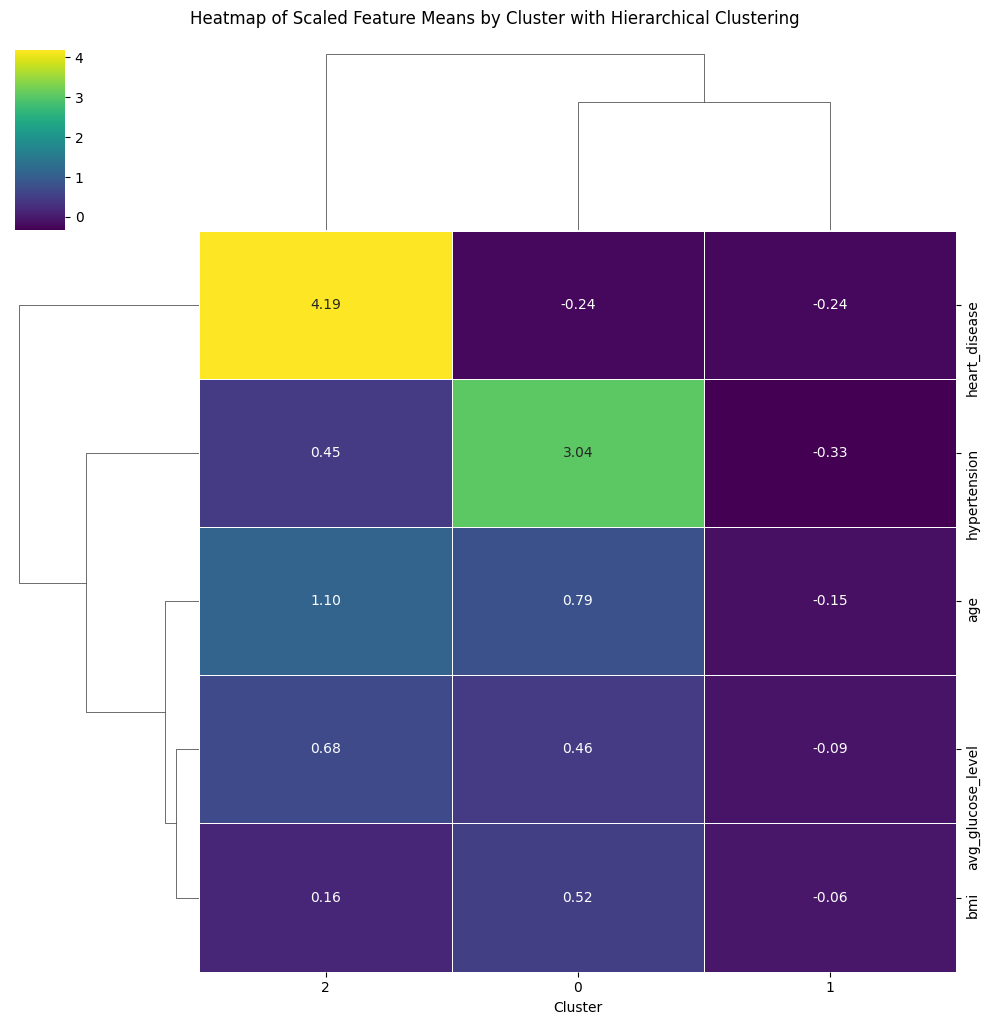


Interpretation Hint: The heatmap shows the average scaled value of each numerical feature within each cluster.
Features and clusters are reordered based on their similarity (hierarchical clustering).
Darker/lighter colors indicate lower/higher average scaled values, respectively.
This helps identify which features characterize each cluster.


In [ ]:
# prompt: Visualization of clustering of each feature with other  Heatmap (Hierarchical Clustering)

import pandas as pd
import matplotlib.pyplot as plt
# Visualize the clustering of each feature with others using a heatmap and hierarchical clustering
# This can reveal relationships between features based on their values within clusters.

# Select the numerical features for this heatmap
# You can reuse the 'numerical_features' list from the KMeans part
print("\nGenerating Heatmap with Hierarchical Clustering for Numerical Features...")

# Ensure df_scaled is still available from the KMeans step, or re-scale if needed
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[numerical_features])
# df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# Add the cluster labels to the scaled data for plotting purposes (not for clustering itself)
df_scaled_with_clusters = df_scaled.copy()
df_scaled_with_clusters['Cluster'] = df['Cluster']

# For hierarchical clustering visualization on the heatmap, we can use the mean of features per cluster
# Calculate the mean of the scaled numerical features for each cluster
cluster_means_scaled = df_scaled_with_clusters.groupby('Cluster')[numerical_features].mean()

# Plot the heatmap
plt.figure(figsize=(12, 8))
# Use clustermap for heatmap with hierarchical clustering
# This will cluster both the rows (clusters) and columns (features) based on their values
sns.clustermap(cluster_means_scaled.T, # Transpose to cluster features (columns)
               annot=True,
               fmt=".2f",
               cmap='viridis',
               linewidths=.5,
               figsize=(10, 10))
plt.suptitle('Heatmap of Scaled Feature Means by Cluster with Hierarchical Clustering', y=1.02)
plt.show()

print("\nInterpretation Hint: The heatmap shows the average scaled value of each numerical feature within each cluster.")
print("Features and clusters are reordered based on their similarity (hierarchical clustering).")
print("Darker/lighter colors indicate lower/higher average scaled values, respectively.")
print("This helps identify which features characterize each cluster.")



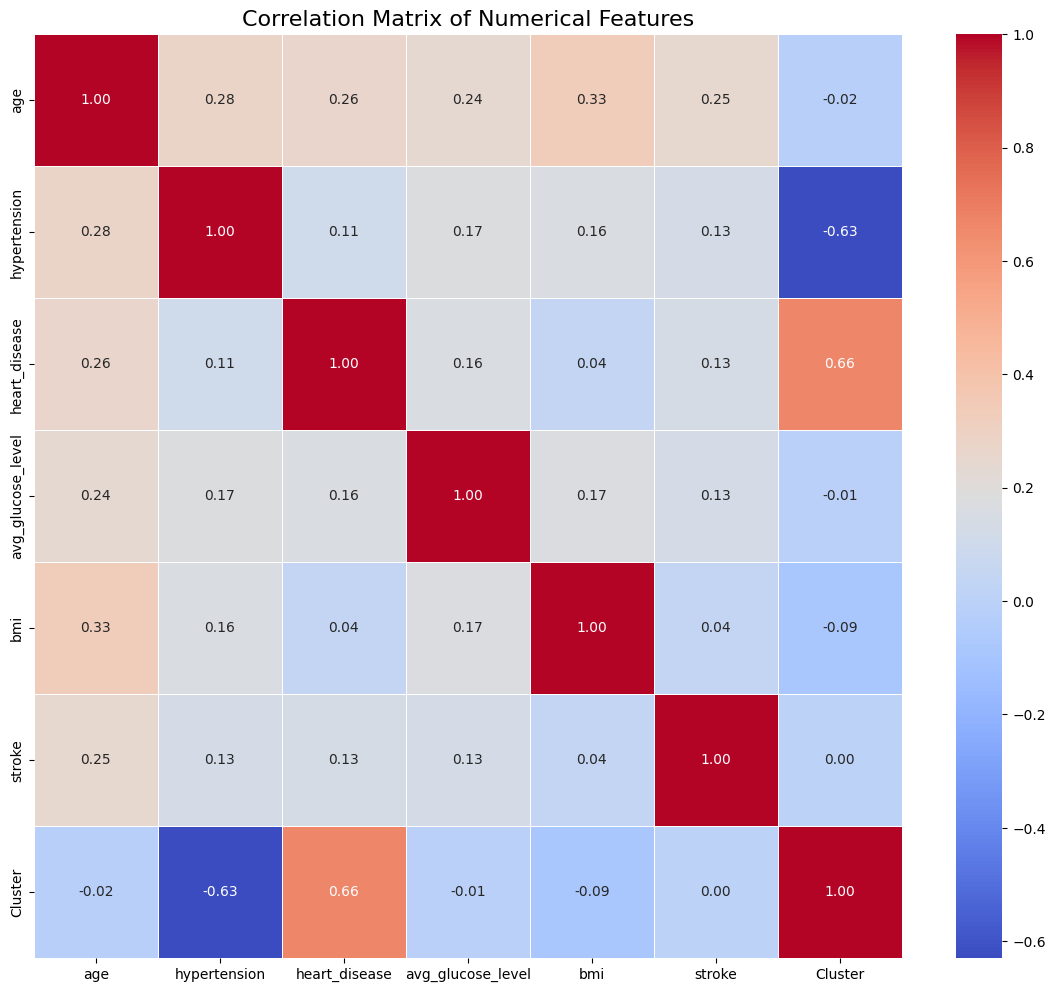


Interpretation Hint: The correlation heatmap shows the pairwise correlation coefficients between numerical features.
Values range from -1 to 1.
Values close to 1 indicate strong positive linear correlation.
Values close to -1 indicate strong negative linear correlation.
Values close to 0 indicate weak or no linear correlation.


In [ ]:
# prompt: Visualization of clustering of all feature with other by heatmap

import matplotlib.pyplot as plt
import numpy as np
# Select numerical features for the correlation heatmap
numerical_features_for_corr = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 12)) # Increased figure size for better readability
correlation_matrix = df[numerical_features_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Changed cmap for better contrast
plt.title('Correlation Matrix of Numerical Features', fontsize=16) # Added fontsize
plt.show()

print("\nInterpretation Hint: The correlation heatmap shows the pairwise correlation coefficients between numerical features.")
print("Values range from -1 to 1.")
print("Values close to 1 indicate strong positive linear correlation.")
print("Values close to -1 indicate strong negative linear correlation.")
print("Values close to 0 indicate weak or no linear correlation.")

** Pair Plot (Scatterplot Matrix) **


Generating Pair Plot (Scatterplot Matrix)...

Features selected for Pairplot:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


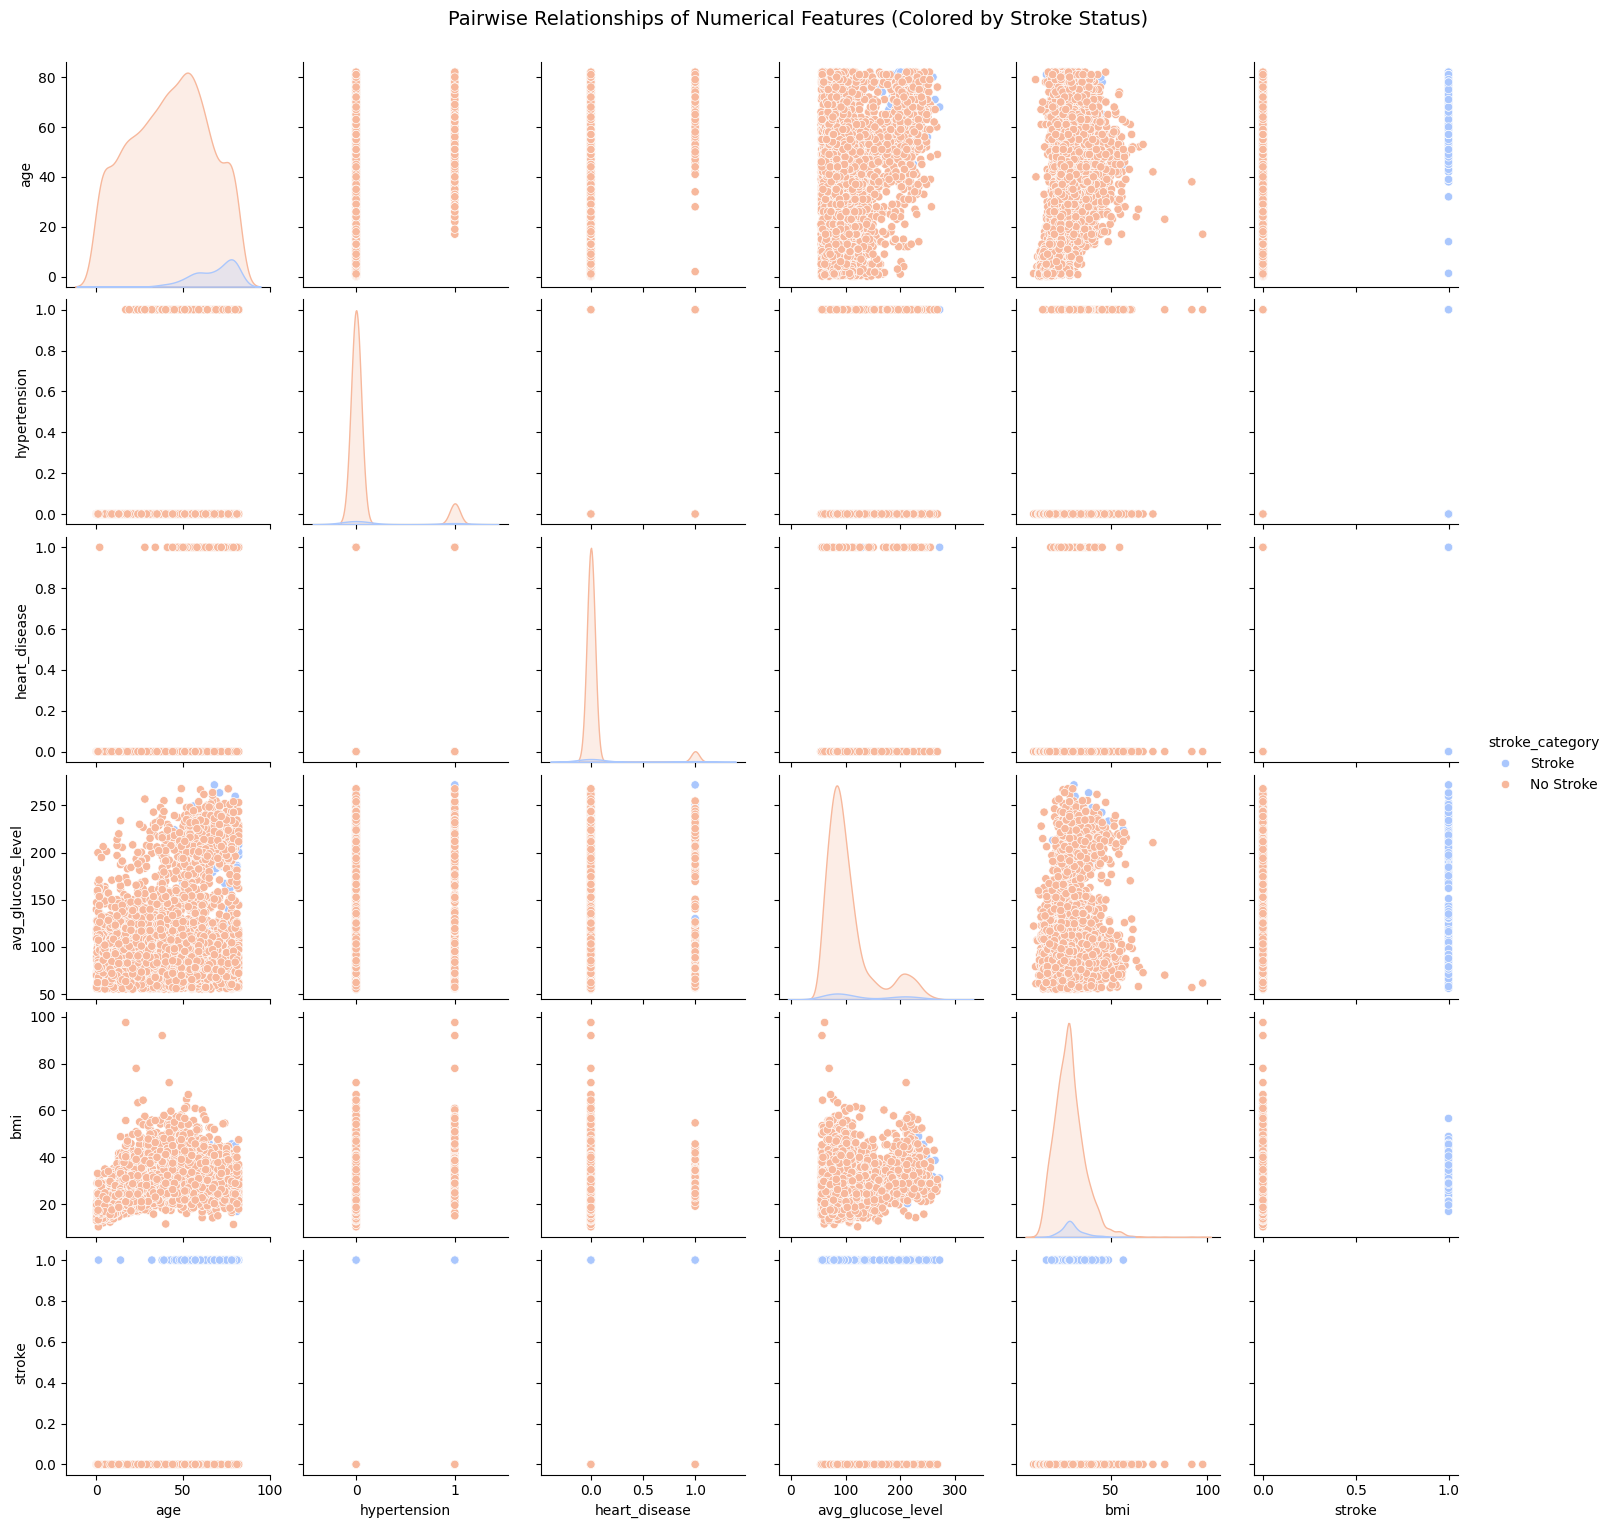


Interpretation Hint: The Pair Plot shows scatterplots for each pair of selected numerical features.
The diagonal shows the distribution (KDE plot) of each feature.
Each point represents a data record, colored by its stroke status (if 'stroke' was included).
This helps visualize correlations, distributions, and potential separability of classes based on pairs of features.


In [ ]:
# prompt: Pair Plot (Scatterplot Matrix)

import matplotlib.pyplot as plt
print("\nGenerating Pair Plot (Scatterplot Matrix)...")

# Select numerical features for the pair plot
# Using the numerical_features list already created for KMeans
numerical_features_for_pairplot = numerical_features.copy()

# Add the target variable 'stroke' to see relationships with the outcome
if 'stroke' not in numerical_features_for_pairplot and 'stroke' in df.columns:
    numerical_features_for_pairplot.append('stroke')

# Limit the number of features for pairplot to avoid memory issues and make it readable
# Pairplot can be slow and consume a lot of memory with many features
# Let's select a reasonable subset, e.g., the first 5 numerical features plus 'stroke'
pairplot_features = numerical_features[:5]
if 'stroke' in df.columns:
    pairplot_features.append('stroke')

# Ensure 'age', 'avg_glucose_level', 'bmi' are included if they exist
important_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']
for feature in important_features:
    if feature in df.columns and feature not in pairplot_features:
        # Insert important features at the beginning if possible, or just append
        # Simple append for now to keep it straightforward
        if feature in numerical_features: # Only add if it's a numerical feature we want to plot
            pairplot_features.append(feature)

# Remove duplicates and maintain order (mostly)
pairplot_features = list(dict.fromkeys(pairplot_features))

# Ensure we don't plot too many features
max_pairplot_features = 7 # Adjust based on system capabilities and readability
if len(pairplot_features) > max_pairplot_features:
    print(f"Warning: Too many features for Pairplot. Limiting to the first {max_pairplot_features} selected features.")
    pairplot_features = pairplot_features[:max_pairplot_features]


print("\nFeatures selected for Pairplot:")
print(pairplot_features)

# Create a pairplot
# Use the 'stroke' column for coloring if it's included
if 'stroke' in pairplot_features:
    # Convert 'stroke' to categorical for better coloring in seaborn
    df['stroke_category'] = df['stroke'].map({0: 'No Stroke', 1: 'Stroke'})
    sns.pairplot(df[pairplot_features + ['stroke_category']], hue='stroke_category', palette='coolwarm', diag_kind='kde') # kde for numerical diagonal
    df = df.drop('stroke_category', axis=1) # Drop the temporary column
else:
     # If 'stroke' is not selected for the pairplot features, plot without hue
     sns.pairplot(df[pairplot_features], diag_kind='kde')

plt.suptitle('Pairwise Relationships of Numerical Features (Colored by Stroke Status)', y=1.02, fontsize=14) # Add a title
plt.show()

print("\nInterpretation Hint: The Pair Plot shows scatterplots for each pair of selected numerical features.")
print("The diagonal shows the distribution (KDE plot) of each feature.")
print("Each point represents a data record, colored by its stroke status (if 'stroke' was included).")
print("This helps visualize correlations, distributions, and potential separability of classes based on pairs of features.")


In [ ]:
# prompt: SMOTE

import pandas as pd
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter # Import Counter

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Check the shapes of X and y
print("Original dataset shape: %s" % Counter(y))

# Apply SMOTE
# You can adjust the sampling_strategy and k_neighbors parameters
sm = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

# Fit and resample the training data
X_res, y_res = sm.fit_resample(X, y)

# Check the shape of the resampled dataset
print("Resampled dataset shape %s" % Counter(y_res))

# Optionally, convert the resampled data back to DataFrames (useful for further analysis or model building)
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.Series(y_res, name='stroke')

print("\nResampled features (X_res) head:")
display(X_res.head())

print("\nResampled target (y_res) head:")
display(y_res.head())

Original dataset shape: Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4861, 0: 4861})

Resampled features (X_res) head:


age  hypertension  heart_disease  avg_glucose_level        bmi  \
0  67.0             0              1             228.69  36.600000   
1  61.0             0              0             202.21  28.893237   
2  80.0             0              1             105.92  32.500000   
3  49.0             0              0             171.23  34.400000   
4  79.0             1              0             174.12  24.000000   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False                     True               False   
2               True                    False               False   
3               True                    False               False   
4              False                     True               False   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                            True   
1                 False                           False   
2                 False                           False   
3                  True                           False   
4                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  Cluster  
0                        False                  False        2  
1                         True                  False        1  
2                         True                  False        2  
3                        False                   True        1  
4                         True                  False        0


Resampled target (y_res) head:


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


Mutual Information Scores w.r.t. 'stroke':
age                               0.039082
bmi                               0.009151
hypertension                      0.009016
Cluster                           0.008740
avg_glucose_level                 0.006055
heart_disease                     0.006016
smoking_status_smokes             0.004715
work_type_children                0.004659
ever_married_Yes                  0.003695
smoking_status_never smoked       0.001328
gender_Male                       0.001005
work_type_Self-employed           0.000947
gender_Other                      0.000425
work_type_Never_worked            0.000000
work_type_Private                 0.000000
Residence_type_Urban              0.000000
smoking_status_formerly smoked    0.000000
Name: MI Scores, dtype: float64


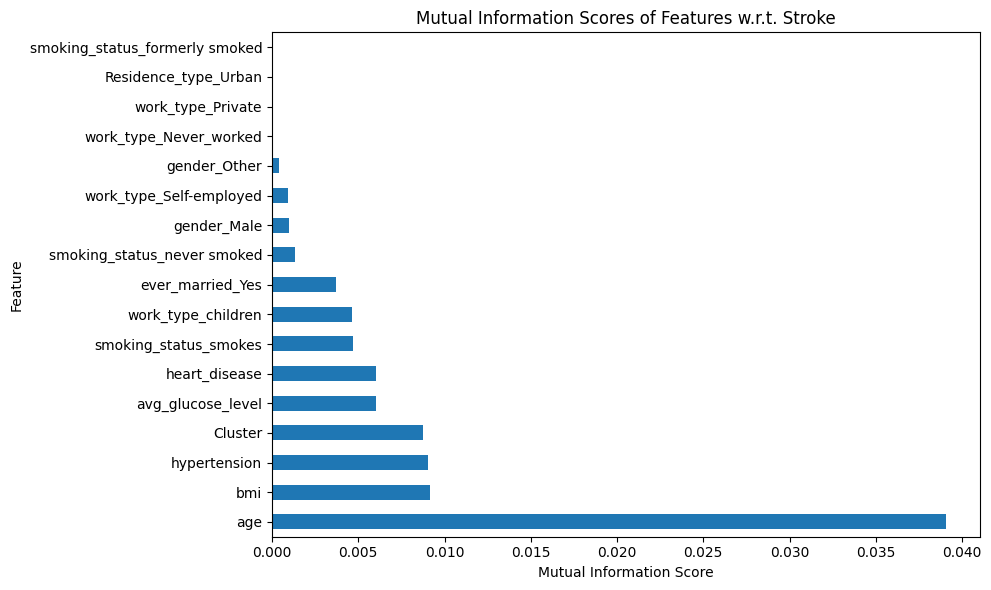


Interpretation Hint: Mutual Information measures the dependency between two variables.
A higher score indicates a stronger relationship between the feature and the target variable ('stroke').
Scores near 0 suggest little to no dependency.
This helps identify features that are potentially most informative for predicting stroke.


In [ ]:
# prompt: Mutual Information Score

import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-learn

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder # Needed if target is not numerical

# Separate features (X) and target (y)
# Use the original DataFrame before SMOTE for calculating MI w.r.t. the original distribution
# If you want to calculate MI on the resampled data, use X_res and y_res instead.
X_mi = df.drop('stroke', axis=1)
y_mi = df['stroke']

# Ensure target is numerical (0 or 1) for mutual_info_classif
# Our 'stroke' column is already 0 or 1, so LabelEncoder is not strictly necessary here,
# but it's good practice if your target is categorical strings.
# le = LabelEncoder()
# y_mi_encoded = le.fit_transform(y_mi) # Not needed here as y_mi is already 0/1

# Calculate Mutual Information scores
# mutual_info_classif works best with discrete features, but it can estimate for continuous.
# For categorical features in X, they should ideally be integer-encoded or one-hot encoded.
# Our X_mi already has one-hot encoded columns, which is suitable.
# For continuous features like 'age', 'avg_glucose_level', 'bmi', mutual_info_classif
# will try to estimate the MI.
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42) # Use y_mi directly

# Create a Series for better visualization
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)

# Sort the scores
mi_scores = mi_scores.sort_values(ascending=False)

print("\nMutual Information Scores w.r.t. 'stroke':")
print(mi_scores)

# Visualize the scores
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='barh')
plt.title('Mutual Information Scores of Features w.r.t. Stroke')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation Hint: Mutual Information measures the dependency between two variables.")
print("A higher score indicates a stronger relationship between the feature and the target variable ('stroke').")
print("Scores near 0 suggest little to no dependency.")
print("This helps identify features that are potentially most informative for predicting stroke.")


Calculating Cramér’s V between original categorical features and 'stroke':

Cramér’s V Scores w.r.t. 'stroke':
ever_married      0.107383
work_type         0.096924
smoking_status    0.075525
Residence_type    0.014549
gender            0.009617
Name: Cramér’s V Scores, dtype: float64


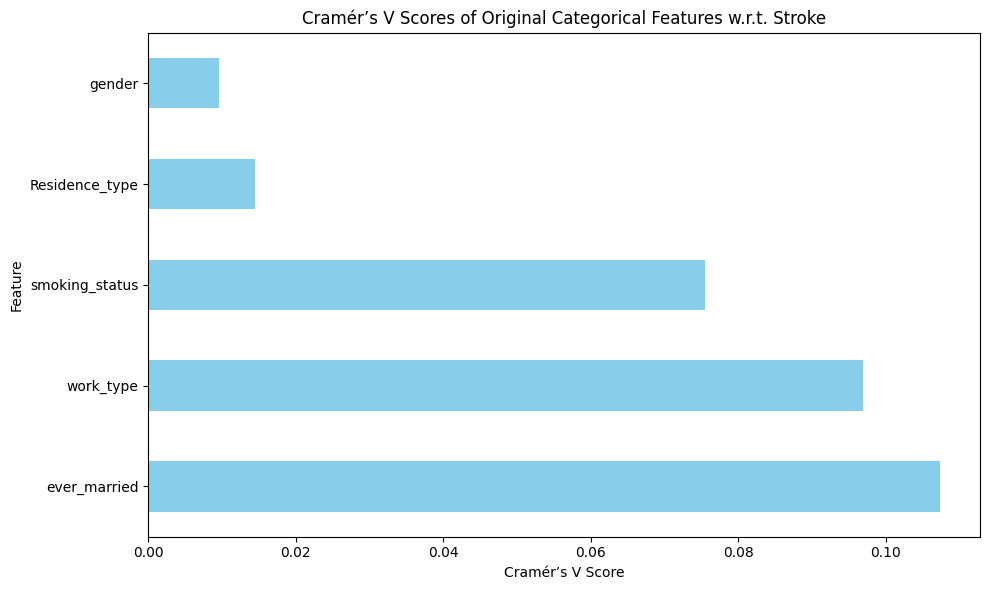


Interpretation Hint: Cramér’s V is a measure of association between two nominal variables.
It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.
Higher values suggest a stronger relationship between the categorical feature and 'stroke'.
Common interpretations:
0.00 - 0.10: Negligible association
0.10 - 0.20: Weak association
0.20 - 0.40: Moderate association
0.40 - 0.60: Relatively strong association
> 0.60: Strong association


In [ ]:
# prompt: Cramér’s V

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import math

def cramers_v(x, y):
    """
    Calculate Cramer's V statistic for two categorical variables.

    Parameters:
    x (pd.Series): The first categorical variable.
    y (pd.Series): The second categorical variable.

    Returns:
    float: The Cramer's V statistic.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Correct for sample size and number of cells
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    # Use corrected phi2 and min(r_corrected, k_corrected) - 1 for correction
    # Or use the simpler formula based on phi2 and min(r, k) - 1
    v = math.sqrt(phi2 / min(r-1, k-1))
    return v

# Select categorical columns from the original df (before one-hot encoding)
# We need to reconstruct the original categorical columns for Cramér's V
# Since the df has been modified with one-hot encoding, we need to go back
# to the original categorical features or reconstruct them carefully.

# Let's assume we want to calculate Cramér's V between 'stroke' and the original
# categorical features: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'.

# Create a temporary DataFrame with the original categorical columns and 'stroke'
# from the already processed df (where we have reconstructed some)
# Alternatively, load the original CSV again or keep a copy before encoding.

# For demonstration, let's reconstruct the columns needed using the already processed df
# This might require handling the base/dropped categories carefully.

# Create a temporary DataFrame for Cramér's V calculation
df_cramers = df.copy()

# Reconstruct original categorical columns
# gender: 'gender_Male', 'gender_Other' (Female is base)
df_cramers['original_gender'] = 'Female'
df_cramers.loc[df_cramers['gender_Male'] == 1, 'original_gender'] = 'Male'
if 'gender_Other' in df_cramers.columns: # Check if 'Other' exists
    df_cramers.loc[df_cramers['gender_Other'] == 1, 'original_gender'] = 'Other'

# ever_married: 'ever_married_Yes' (No is base)
df_cramers['original_ever_married'] = 'No'
df_cramers.loc[df_cramers['ever_married_Yes'] == 1, 'original_ever_married'] = 'Yes'

# work_type: 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'
# Find the column that is 1 and strip the prefix
work_type_cols_cramers = [col for col in df_cramers.columns if col.startswith('work_type_')]
if work_type_cols_cramers:
    df_cramers['original_work_type'] = df_cramers[work_type_cols_cramers].idxmax(axis=1).str.replace('work_type_', '')
    # Handle cases where idxmax might pick a non-1 column if all are 0 (unlikely with proper OHE)
    # Check if the max value is 1
    for col in work_type_cols_cramers:
        df_cramers.loc[df_cramers[col] == 1, 'original_work_type'] = col.replace('work_type_', '')
    # If no encoded column was 1 (e.g., the original category was dropped), handle it.
    # Assuming 'children' was the base:
    # This is tricky with just the OHE columns. A robust way is to keep the original column or re-load.
    # For now, let's assume the idxmax method works reasonably if one-hot encoding was applied correctly.
    # A more robust approach would involve checking if max value is 1 for idxmax
    # df_cramers['original_work_type'] = df_cramers[work_type_cols_cramers].apply(lambda row: row.idxmax().replace('work_type_', '') if row.max() == 1 else 'children', axis=1)
    # Let's stick to the simpler idxmax for now, assuming correct OHE.

else:
    print("Warning: Cannot calculate Cramér's V for 'work_type' as encoded columns not found.")
    df_cramers['original_work_type'] = None # Or handle as needed


# Residence_type: 'Residence_type_Urban' (Rural is base)
df_cramers['original_Residence_type'] = 'Rural'
df_cramers.loc[df_cramers['Residence_type_Urban'] == 1, 'original_Residence_type'] = 'Urban'

# smoking_status: 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes' (Unknown is base)
smoking_status_cols_cramers = [col for col in df_cramers.columns if col.startswith('smoking_status_')]
df_cramers['original_smoking_status'] = 'Unknown' # Default to Unknown
if smoking_status_cols_cramers:
    for col in smoking_status_cols_cramers:
        status = col.replace('smoking_status_', '')
        df_cramers.loc[df_cramers[col] == 1, 'original_smoking_status'] = status
else:
    print("Warning: Cannot calculate Cramér's V for 'smoking_status' as encoded columns not found.")
    df_cramers['original_smoking_status'] = None # Or handle as needed


# List of reconstructed original categorical feature names
original_cat_features = ['original_gender', 'original_ever_married', 'original_work_type',
                         'original_Residence_type', 'original_smoking_status']

print("\nCalculating Cramér’s V between original categorical features and 'stroke':")

cramers_v_scores = {}
for feature in original_cat_features:
    if feature in df_cramers.columns and df_cramers[feature].notna().any(): # Check if the column exists and has non-null values
        try:
            v_score = cramers_v(df_cramers[feature], df_cramers['stroke'])
            cramers_v_scores[feature.replace('original_', '')] = v_score # Store with original name
        except ValueError as e:
             print(f"Could not calculate Cramér's V for {feature}: {e}. This might happen if one category has 0 occurrences.")
             cramers_v_scores[feature.replace('original_', '')] = np.nan


# Convert the scores to a Series and sort
cramers_v_scores_series = pd.Series(cramers_v_scores, name="Cramér’s V Scores")
cramers_v_scores_series = cramers_v_scores_series.sort_values(ascending=False)

print("\nCramér’s V Scores w.r.t. 'stroke':")
print(cramers_v_scores_series)

# Visualize the scores
plt.figure(figsize=(10, 6))
cramers_v_scores_series.plot(kind='barh', color='skyblue')
plt.title('Cramér’s V Scores of Original Categorical Features w.r.t. Stroke')
plt.xlabel('Cramér’s V Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation Hint: Cramér’s V is a measure of association between two nominal variables.")
print("It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.")
print("Higher values suggest a stronger relationship between the categorical feature and 'stroke'.")
print("Common interpretations:")
print("0.00 - 0.10: Negligible association")
print("0.10 - 0.20: Weak association")
print("0.20 - 0.40: Moderate association")
print("0.40 - 0.60: Relatively strong association")
print("> 0.60: Strong association")



Calculating Cramér’s V between original categorical features and 'stroke':

Cramér’s V Scores w.r.t. 'stroke':
ever_married      0.107383
work_type         0.098087
smoking_status    0.075525
Residence_type    0.014549
gender            0.009617
Name: Cramér’s V Scores, dtype: float64


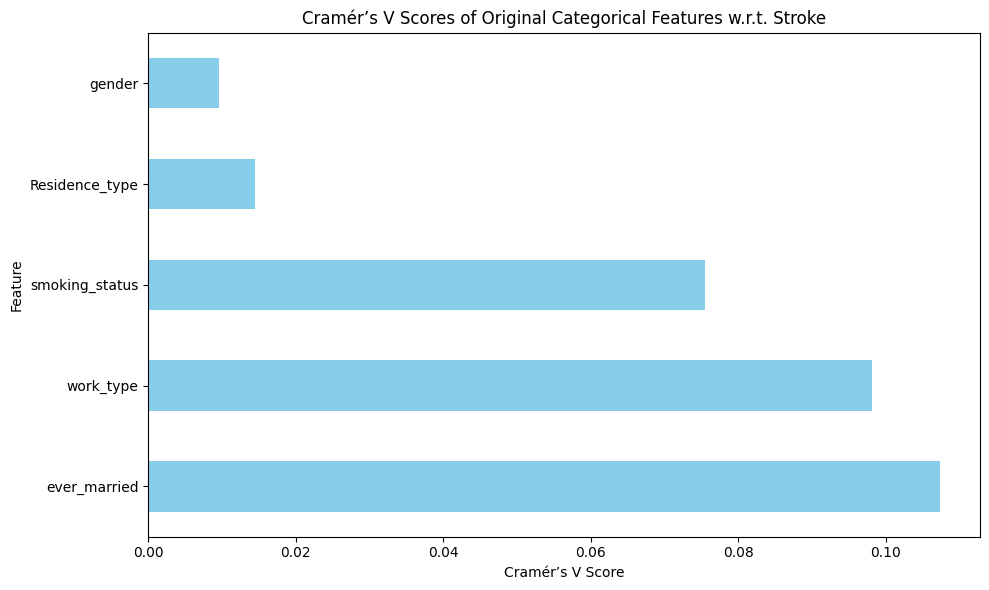


Interpretation Hint: Cramér’s V is a measure of association between two nominal variables.
It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.
Higher values suggest a stronger relationship between the categorical feature and 'stroke'.
Common interpretations:
0.00 - 0.10: Negligible association
0.10 - 0.20: Weak association
0.20 - 0.40: Moderate association
0.40 - 0.60: Relatively strong association
> 0.60: Strong association

Calculating Cramér’s V between all pairs of original categorical features for Heatmap:


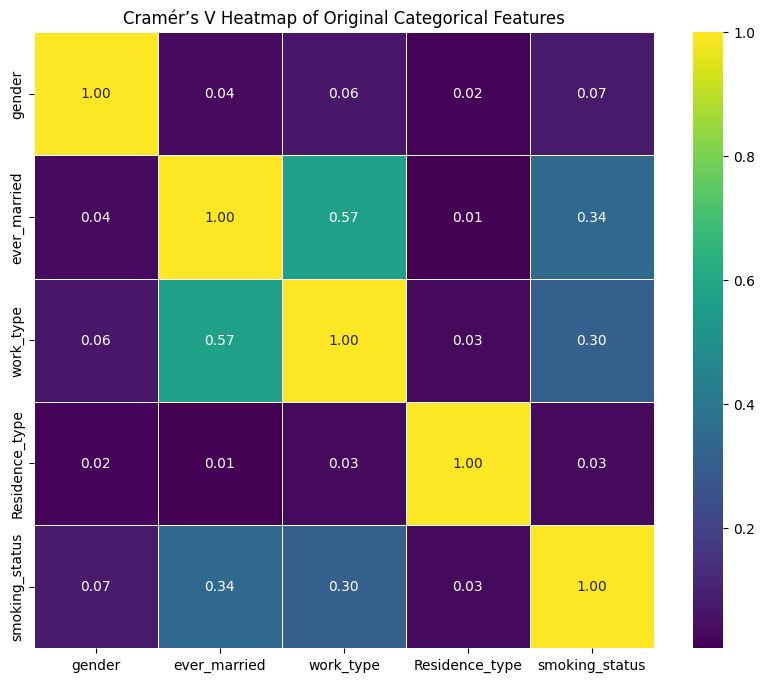


Interpretation Hint: This heatmap shows the strength of association between each pair of original categorical features.
Values close to 1 indicate a strong association, while values close to 0 indicate little to no association.


In [ ]:
# prompt: Cramér’s V Heatmap

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def cramers_v(x, y):
    """
    Calculate Cramer's V statistic for two categorical variables.

    Parameters:
    x (pd.Series): The first categorical variable.
    y (pd.Series): The second categorical variable.

    Returns:
    float: The Cramer's V statistic.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Use the simpler formula based on phi2 and min(r, k) - 1
    v = math.sqrt(phi2 / min(r - 1, k - 1))
    return v

# Select categorical columns from the original df (before one-hot encoding)
# We need to reconstruct the original categorical columns for Cramér's V
# Since the df has been modified with one-hot encoding, we need to go back
# to the original categorical features or reconstruct them carefully.

# Let's assume we want to calculate Cramér's V between 'stroke' and the original
# categorical features: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'.

# Create a temporary DataFrame with the original categorical columns and 'stroke'
# from the already processed df (where we have reconstructed some)
# Alternatively, load the original CSV again or keep a copy before encoding.

# For demonstration, let's reconstruct the columns needed using the already processed df
# This might require handling the base/dropped categories carefully.

# Create a temporary DataFrame for Cramér's V calculation
df_cramers = df.copy()

# Reconstruct original categorical columns
# gender: 'gender_Male', 'gender_Other' (Female is base)
df_cramers['original_gender'] = 'Female'
df_cramers.loc[df_cramers['gender_Male'] == 1, 'original_gender'] = 'Male'
if 'gender_Other' in df_cramers.columns: # Check if 'Other' exists
    df_cramers.loc[df_cramers['gender_Other'] == 1, 'original_gender'] = 'Other'

# ever_married: 'ever_married_Yes' (No is base)
df_cramers['original_ever_married'] = 'No'
df_cramers.loc[df_cramers['ever_married_Yes'] == 1, 'original_ever_married'] = 'Yes'

# work_type: 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'
# Find the column that is 1 and strip the prefix
work_type_cols_cramers = [col for col in df_cramers.columns if col.startswith('work_type_')]
if work_type_cols_cramers:
    # Reconstruct the original work_type based on which OHE column is 1
    df_cramers['original_work_type'] = 'Unknown' # Default in case none match
    for col in work_type_cols_cramers:
        original_name = col.replace('work_type_', '')
        df_cramers.loc[df_cramers[col] == 1, 'original_work_type'] = original_name
    # Check if 'children' was potentially the dropped category and assign if no other was matched
    if 'work_type_children' not in work_type_cols_cramers: # If 'children' was potentially dropped
         # This logic is imperfect without the original column or knowledge of dropped base
         # A better way is to reload or save the original categorical data.
         # For this example, we'll assume 'Unknown' handles cases not matched by encoded columns.
         pass # Keep default as 'Unknown' or improve logic if base category is known
else:
    print("Warning: Cannot calculate Cramér's V for 'work_type' as encoded columns not found.")
    df_cramers['original_work_type'] = None # Or handle as needed


# Residence_type: 'Residence_type_Urban' (Rural is base)
df_cramers['original_Residence_type'] = 'Rural'
df_cramers.loc[df_cramers['Residence_type_Urban'] == 1, 'original_Residence_type'] = 'Urban'

# smoking_status: 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes' (Unknown is base)
smoking_status_cols_cramers = [col for col in df_cramers.columns if col.startswith('smoking_status_')]
df_cramers['original_smoking_status'] = 'Unknown' # Default to Unknown
if smoking_status_cols_cramers:
    for col in smoking_status_cols_cramers:
        status = col.replace('smoking_status_', '')
        df_cramers.loc[df_cramers[col] == 1, 'original_smoking_status'] = status
else:
    print("Warning: Cannot calculate Cramér's V for 'smoking_status' as encoded columns not found.")
    df_cramers['original_smoking_status'] = None # Or handle as needed


# List of reconstructed original categorical feature names
original_cat_features = ['original_gender', 'original_ever_married', 'original_work_type',
                         'original_Residence_type', 'original_smoking_status']

print("\nCalculating Cramér’s V between original categorical features and 'stroke':")

cramers_v_scores = {}
for feature in original_cat_features:
    if feature in df_cramers.columns and df_cramers[feature].notna().any(): # Check if the column exists and has non-null values
        try:
            # Ensure there's more than one unique value in both columns for crosstab
            if df_cramers[feature].nunique() > 1 and df_cramers['stroke'].nunique() > 1:
                v_score = cramers_v(df_cramers[feature], df_cramers['stroke'])
                cramers_v_scores[feature.replace('original_', '')] = v_score # Store with original name
            else:
                print(f"Skipping Cramér's V for {feature}: Not enough unique values in one or both columns.")
                cramers_v_scores[feature.replace('original_', '')] = np.nan
        except ValueError as e:
             print(f"Could not calculate Cramér's V for {feature}: {e}. This might happen if one category has 0 occurrences.")
             cramers_v_scores[feature.replace('original_', '')] = np.nan


# Convert the scores to a Series and sort
cramers_v_scores_series = pd.Series(cramers_v_scores, name="Cramér’s V Scores")
cramers_v_scores_series = cramers_v_scores_series.sort_values(ascending=False)

print("\nCramér’s V Scores w.r.t. 'stroke':")
print(cramers_v_scores_series)

# Visualize the scores
plt.figure(figsize=(10, 6))
cramers_v_scores_series.plot(kind='barh', color='skyblue')
plt.title('Cramér’s V Scores of Original Categorical Features w.r.t. Stroke')
plt.xlabel('Cramér’s V Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation Hint: Cramér’s V is a measure of association between two nominal variables.")
print("It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.")
print("Higher values suggest a stronger relationship between the categorical feature and 'stroke'.")
print("Common interpretations:")
print("0.00 - 0.10: Negligible association")
print("0.10 - 0.20: Weak association")
print("0.20 - 0.40: Moderate association")
print("0.40 - 0.60: Relatively strong association")
print("> 0.60: Strong association")

# Create a heatmap for Cramér’s V between all pairs of original categorical features
print("\nCalculating Cramér’s V between all pairs of original categorical features for Heatmap:")

# Filter the DataFrame to only include the reconstructed original categorical columns
df_cramers_pairwise = df_cramers[original_cat_features].copy()

# Calculate the Cramér’s V matrix
cramers_v_matrix = pd.DataFrame(index=original_cat_features, columns=original_cat_features)

for col1 in original_cat_features:
    for col2 in original_cat_features:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0 # Association with itself is perfect
        else:
            # Only calculate if both columns exist and have sufficient unique values
            if col1 in df_cramers_pairwise.columns and col2 in df_cramers_pairwise.columns and \
               df_cramers_pairwise[col1].nunique() > 1 and df_cramers_pairwise[col2].nunique() > 1:
                try:
                    v_score = cramers_v(df_cramers_pairwise[col1], df_cramers_pairwise[col2])
                    cramers_v_matrix.loc[col1, col2] = v_score
                except ValueError:
                    cramers_v_matrix.loc[col1, col2] = np.nan # Handle cases with 0 counts in crosstab
            else:
                cramers_v_matrix.loc[col1, col2] = np.nan # Handle cases where column doesn't exist or not enough unique values

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Use original names for plotting
cramers_v_matrix.columns = [col.replace('original_', '') for col in cramers_v_matrix.columns]
cramers_v_matrix.index = [idx.replace('original_', '') for idx in cramers_v_matrix.index]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Cramér’s V Heatmap of Original Categorical Features')
plt.show()

print("\nInterpretation Hint: This heatmap shows the strength of association between each pair of original categorical features.")
print("Values close to 1 indicate a strong association, while values close to 0 indicate little to no association.")


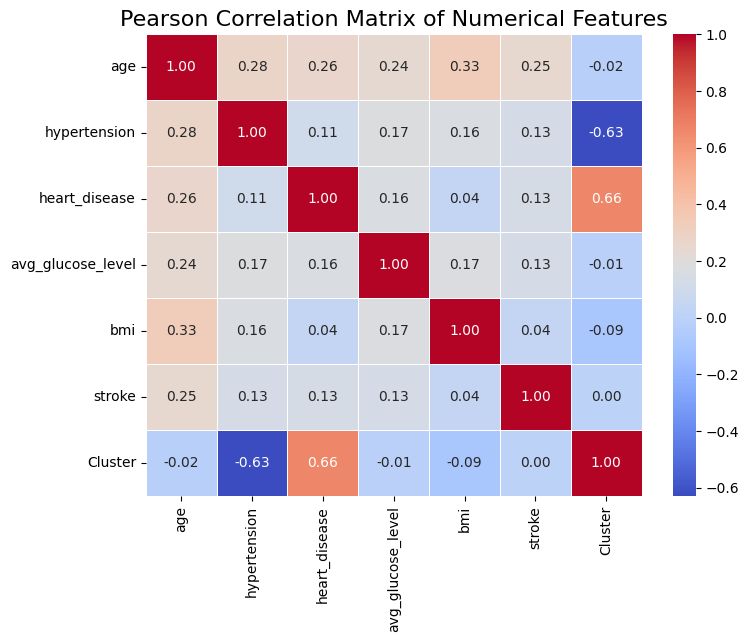


Interpretation Hint: The Pearson correlation heatmap shows the pairwise linear correlation coefficients between numerical features.
Values range from -1 to 1.
Values close to 1 indicate strong positive linear correlation.
Values close to -1 indicate strong negative linear correlation.
Values close to 0 indicate weak or no linear correlation.
Pearson correlation measures linear relationships.


In [ ]:
# prompt: Pearson correlation

import matplotlib.pyplot as plt
import numpy as np
# Select numerical features for the Pearson correlation heatmap
numerical_features_for_corr = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8, 6)) # Increased figure size for better readability
correlation_matrix = df[numerical_features_for_corr].corr(method='pearson') # Explicitly specify Pearson
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Changed cmap for better contrast
plt.title('Pearson Correlation Matrix of Numerical Features', fontsize=16) # Added fontsize and specified Pearson
plt.show()

print("\nInterpretation Hint: The Pearson correlation heatmap shows the pairwise linear correlation coefficients between numerical features.")
print("Values range from -1 to 1.")
print("Values close to 1 indicate strong positive linear correlation.")
print("Values close to -1 indicate strong negative linear correlation.")
print("Values close to 0 indicate weak or no linear correlation.")
print("Pearson correlation measures linear relationships.")



Point-Biserial Correlation Scores w.r.t. 'stroke':
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Cluster              0.004157
Name: Point-Biserial Correlation, dtype: float64


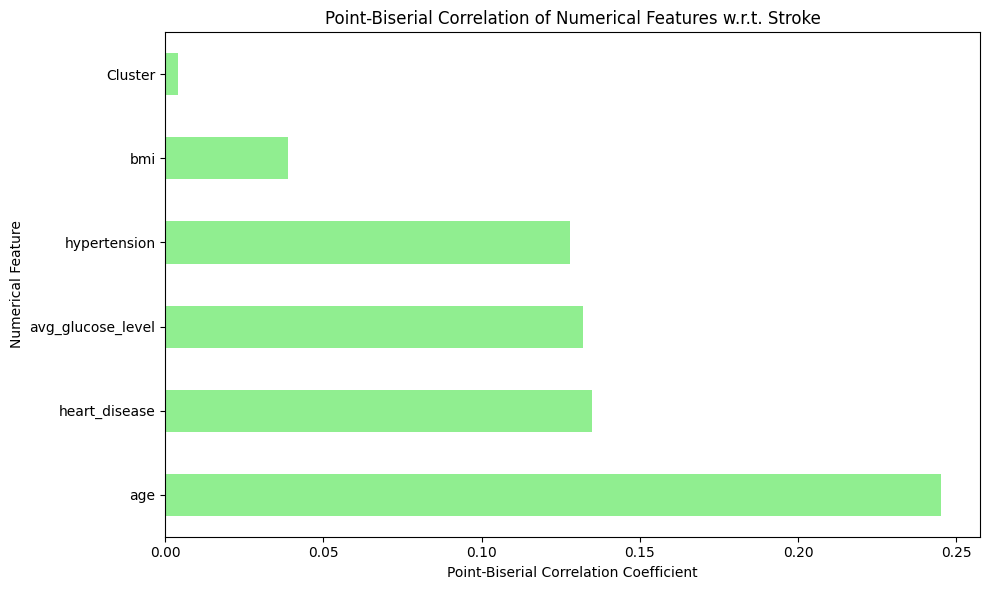


Interpretation Hint: Point-Biserial correlation measures the linear relationship between a binary variable and a continuous variable.
The coefficient ranges from -1 to +1.
A value close to +1 indicates that higher values of the continuous variable are associated with the presence of the binary characteristic (stroke=1).
A value close to -1 indicates that lower values of the continuous variable are associated with the presence of the binary characteristic (stroke=1).
A value close to 0 indicates a weak or no linear relationship.


In [ ]:
# prompt: Point-Biserial Correlation heatmap

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Function to calculate Point-Biserial Correlation
def point_biserial_corr(binary_series, continuous_series):
    """
    Calculate the Point-Biserial Correlation coefficient.

    Parameters:
    binary_series (pd.Series): A binary categorical variable (values should be 0 or 1).
    continuous_series (pd.Series): A continuous numerical variable.

    Returns:
    float: The Point-Biserial Correlation coefficient.
    """
    # Ensure the binary series is actually binary (0 or 1)
    if not set(binary_series.unique()).issubset({0, 1}):
        # Attempt to convert or raise an error
        # For this dataset, 'stroke' is already 0 or 1
        # If other binary features were used, ensure they are 0/1 or handle encoding/mapping
        raise ValueError("Binary series must contain only 0 and 1 values.")

    # Ensure data types are correct
    binary_series = binary_series.astype(float)
    continuous_series = continuous_series.astype(float)

    n1 = binary_series.sum() # Count of group 1
    n0 = len(binary_series) - n1 # Count of group 0

    # Avoid division by zero if one group is empty
    if n0 == 0 or n1 == 0:
        return 0.0 # No variation in the binary variable, correlation is undefined/zero

    mean1 = continuous_series[binary_series == 1].mean()
    mean0 = continuous_series[binary_series == 0].mean()
    std_total = continuous_series.std(ddof=1) # Sample standard deviation

    # Avoid division by zero if std_total is 0
    if std_total == 0:
        return 0.0 # No variation in the continuous variable, correlation is undefined/zero

    # Point-Biserial formula: (M1 - M0) / s_n * sqrt(n1 * n0 / n^2)
    # Where s_n is population std dev, but using sample std dev is common and correct
    # s_n = std_total * sqrt((n-1)/n) # Population std dev adjustment

    # A simpler equivalent form using Pearson correlation on binary data:
    # The Pearson correlation between a binary variable (0/1) and a continuous
    # variable is equal to the Point-Biserial correlation.
    # Let's use this for simplicity and consistency with pandas .corr() method.
    return binary_series.corr(continuous_series, method='pearson')

# Select the binary target variable
binary_target = df['stroke']

# Select numerical features for correlation (excluding the target itself)
numerical_features_for_pb = df.select_dtypes(include=np.number).columns.tolist()
if 'stroke' in numerical_features_for_pb:
    numerical_features_for_pb.remove('stroke')

# Calculate Point-Biserial correlation for each numerical feature with 'stroke'
point_biserial_scores = {}
for feature in numerical_features_for_pb:
    try:
        corr_score = point_biserial_corr(binary_target, df[feature])
        point_biserial_scores[feature] = corr_score
    except ValueError as e:
        print(f"Could not calculate Point-Biserial for {feature}: {e}")
        point_biserial_scores[feature] = np.nan

# Convert scores to a Series and sort
point_biserial_scores_series = pd.Series(point_biserial_scores, name="Point-Biserial Correlation")
point_biserial_scores_series = point_biserial_scores_series.sort_values(ascending=False)

print("\nPoint-Biserial Correlation Scores w.r.t. 'stroke':")
print(point_biserial_scores_series)

# Visualize the Point-Biserial scores
plt.figure(figsize=(10, 6))
point_biserial_scores_series.plot(kind='barh', color='lightgreen')
plt.title('Point-Biserial Correlation of Numerical Features w.r.t. Stroke')
plt.xlabel('Point-Biserial Correlation Coefficient')
plt.ylabel('Numerical Feature')
plt.tight_layout()
plt.show()

print("\nInterpretation Hint: Point-Biserial correlation measures the linear relationship between a binary variable and a continuous variable.")
print("The coefficient ranges from -1 to +1.")
print("A value close to +1 indicates that higher values of the continuous variable are associated with the presence of the binary characteristic (stroke=1).")
print("A value close to -1 indicates that lower values of the continuous variable are associated with the presence of the binary characteristic (stroke=1).")
print("A value close to 0 indicates a weak or no linear relationship.")



Performing ANOVA for numerical features against 'stroke':

ANOVA (t-test) Results for Numerical Features vs. Stroke:


T-statistic       P-value
age                 -29.686266  2.115685e-95
avg_glucose_level    -6.982412  2.401437e-11
hypertension         -6.220859  1.978481e-09
heart_disease        -5.658204  4.094627e-08
bmi                  -3.610422  3.590569e-04
Cluster              -0.176979  8.596651e-01

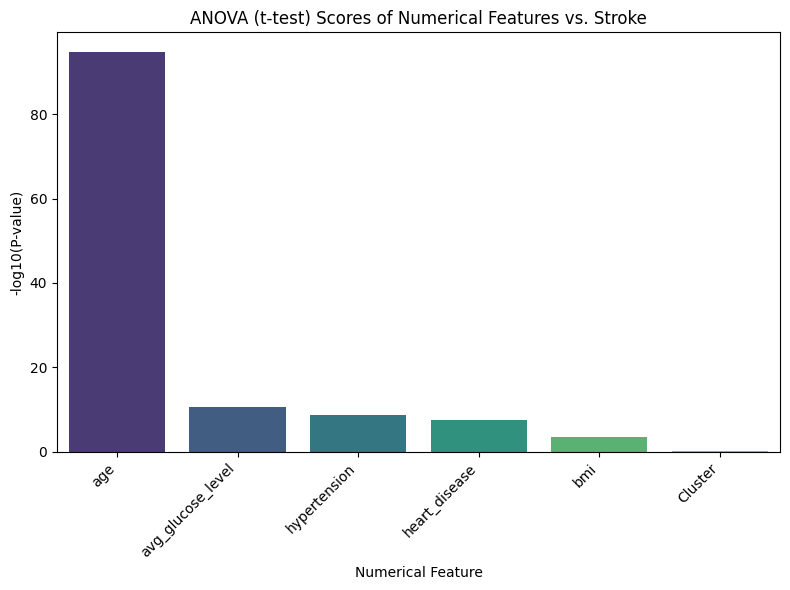


Interpretation Hint: This plot shows the statistical significance of the difference in mean values of each numerical feature between the 'Stroke' and 'No Stroke' groups.
Higher bars correspond to lower P-values, indicating a more statistically significant difference between the groups.
Features with high bars are likely to be strong predictors of stroke based on mean differences.
A common significance level is P < 0.05, which corresponds to -log10(0.05) ≈ 1.3.


In [ ]:
# prompt: ANOVA score plot in a single graph

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Import stats for ANOVA


# Select numerical features and the 'stroke' column
# Ensure 'stroke' is treated as the grouping variable (categorical) for ANOVA
# For ANOVA, the grouping variable should have distinct groups, which 'stroke' (0 or 1) does.
numerical_features_for_anova = df.select_dtypes(include=np.number).columns.tolist()

# Remove 'stroke' from the list of features to be tested against 'stroke' itself
if 'stroke' in numerical_features_for_anova:
    numerical_features_for_anova.remove('stroke')

print("\nPerforming ANOVA for numerical features against 'stroke':")

anova_results = {}
for feature in numerical_features_for_anova:
    # Check if the feature has more than one unique value (required for ANOVA)
    if df[feature].nunique() > 1:
        # Separate data into groups based on 'stroke' value (0 and 1)
        group0 = df[df['stroke'] == 0][feature].dropna() # Drop NaN values if any
        group1 = df[df['stroke'] == 1][feature].dropna()

        # Ensure both groups have at least one data point and more than one unique value within the group
        if len(group0) > 0 and len(group1) > 0 and group0.nunique() > 1 and group1.nunique() > 1:
            try:
                # Perform independent samples t-test (ANOVA for two groups)
                # For more than two groups, you would use stats.f_oneway
                t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False) # Using Welch's t-test (equal_var=False) is generally safer if variances are unequal
                anova_results[feature] = {'T-statistic': t_stat, 'P-value': p_value}
            except ValueError as e:
                 print(f"Could not perform t-test for {feature}: {e}")
                 anova_results[feature] = {'T-statistic': np.nan, 'P-value': np.nan}

        else:
             print(f"Skipping t-test for {feature}: One or both groups are empty or have constant values.")
             anova_results[feature] = {'T-statistic': np.nan, 'P-value': np.nan}
    else:
         print(f"Skipping t-test for {feature}: Feature has only one unique value.")
         anova_results[feature] = {'T-statistic': np.nan, 'P-value': np.nan}

# Convert results to a DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')

print("\nANOVA (t-test) Results for Numerical Features vs. Stroke:")
display(anova_df.sort_values(by='P-value')) # Sort by P-value to see most significant features

# Create an ANOVA score plot (visualizing the -log10(p-value))
# Lower p-values indicate stronger statistical significance.
# -log10(p-value) makes smaller p-values correspond to larger values on the plot.
anova_df['neg_log10_p_value'] = -np.log10(anova_df['P-value'])
anova_df = anova_df.sort_values(by='neg_log10_p_value', ascending=False) # Sort for plotting

plt.figure(figsize=(8, 6))
sns.barplot(x=anova_df.index, y='neg_log10_p_value', data=anova_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Numerical Feature')
plt.ylabel('-log10(P-value)')
plt.title('ANOVA (t-test) Scores of Numerical Features vs. Stroke')
plt.tight_layout()
plt.show()

print("\nInterpretation Hint: This plot shows the statistical significance of the difference in mean values of each numerical feature between the 'Stroke' and 'No Stroke' groups.")
print("Higher bars correspond to lower P-values, indicating a more statistically significant difference between the groups.")
print("Features with high bars are likely to be strong predictors of stroke based on mean differences.")
print("A common significance level is P < 0.05, which corresponds to -log10(0.05) ≈ 1.3.")


Logistic Regression Model Evaluation:
Accuracy: 0.8696

Confusion Matrix:
[[1055  161]
 [ 156 1059]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1216
           1       0.87      0.87      0.87      1215

    accuracy                           0.87      2431
   macro avg       0.87      0.87      0.87      2431
weighted avg       0.87      0.87      0.87      2431



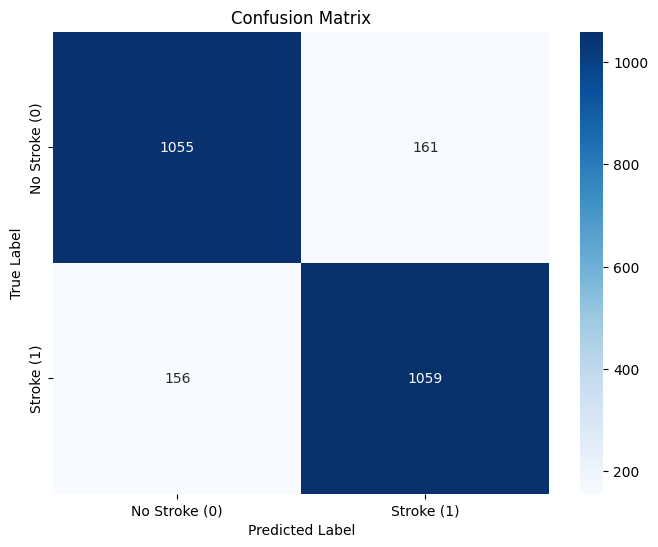


Precision per class:
Precision for No Stroke (0): 0.8712
Precision for Stroke (1): 0.8680

Recall per class:
Recall for No Stroke (0): 0.8676
Recall for Stroke (1): 0.8716


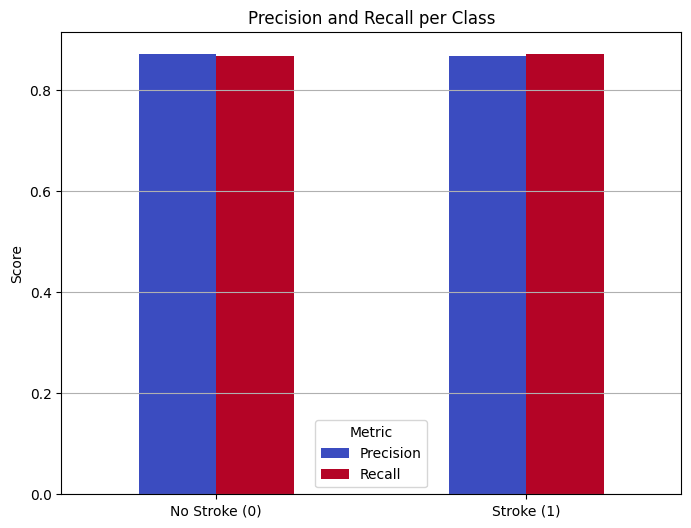

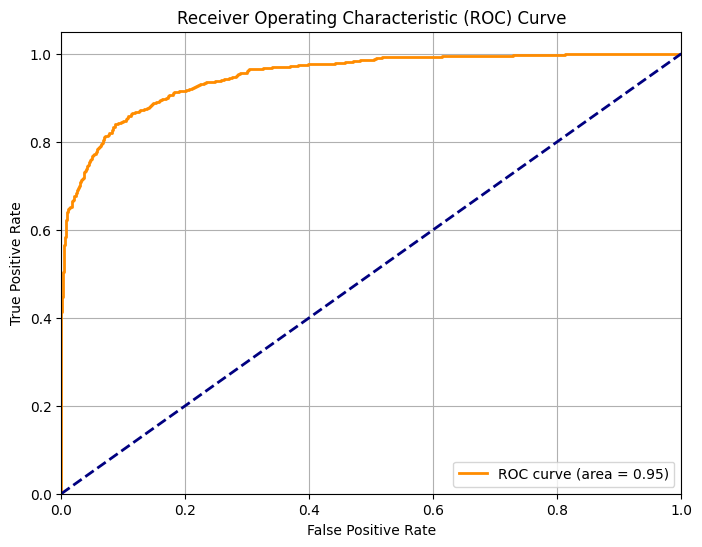


ROC AUC Score: 0.9496


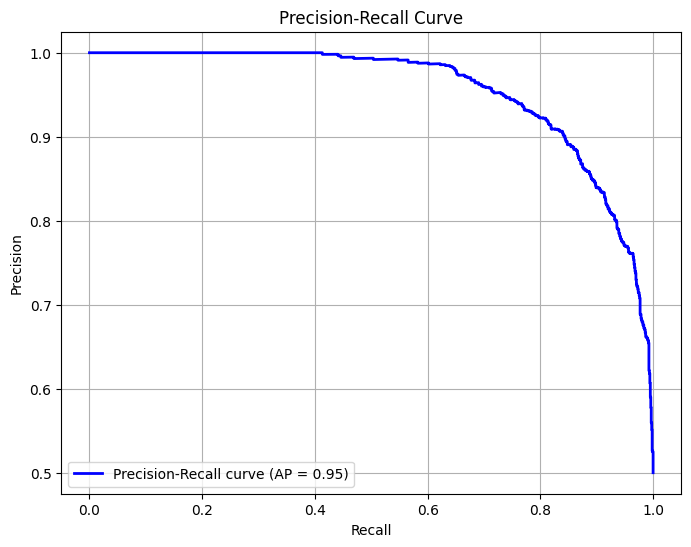

Average Precision (AP) Score: 0.9549

Performing 5-Fold Cross-Validation:
Accuracy CV Scores: [0.87043702 0.87660668 0.88888889 0.86882716 0.87705761]
Mean Accuracy CV Score: 0.8764 (+/- 0.0141)
Recall CV Scores: [0.86804124 0.87486744 0.89205703 0.88023952 0.86825726]
Mean Recall CV Score: 0.8767 (+/- 0.0178)
Precision CV Scores: [0.87163561 0.87117212 0.88843813 0.86725664 0.88198103]
Mean Precision CV Score: 0.8761 (+/- 0.0157)
Roc_auc CV Scores: [0.95053978 0.95101525 0.9627378  0.9498646  0.95283682]
Mean Roc_auc CV Score: 0.9534 (+/- 0.0095)
F1 CV Scores: [0.86983471 0.87301587 0.8902439  0.87369985 0.87506534]
Mean F1 CV Score: 0.8764 (+/- 0.0143)


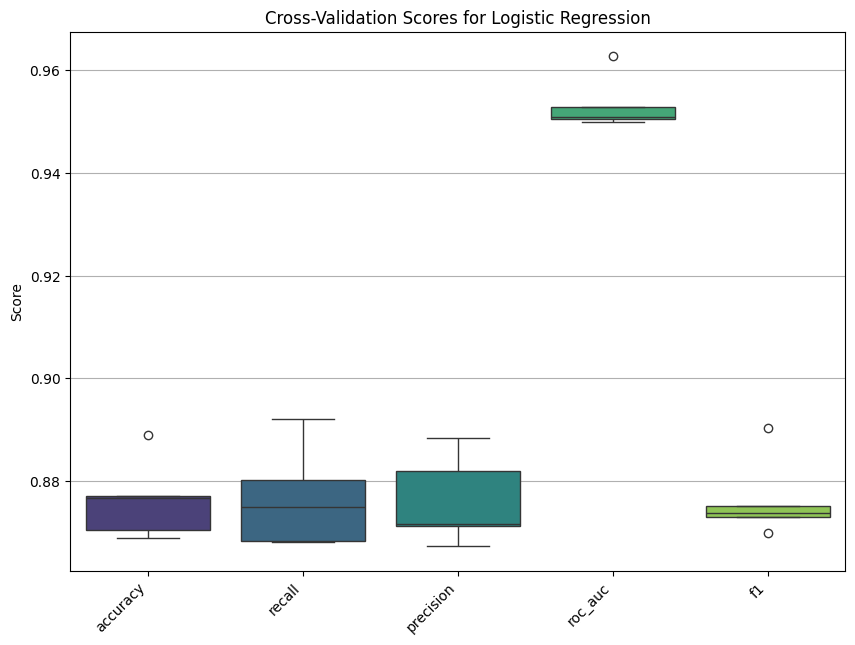


End of Logistic Regression Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Logistic Regression accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use the resampled data X_res and y_res for training and testing
# If you prefer to use the original data, replace X_res and y_res with X and y
# Note: The original data is highly imbalanced, which will affect model performance metrics like accuracy and recall for the minority class.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res) # Stratify to maintain class distribution

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Use 'liblinear' or 'lbfgs'
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke (0)', 'Stroke (1)'], yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract metrics for Precision and Recall Matrices visualization (derived from classification report)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Precision Matrix (Illustrative - typically part of classification report)
# You can visualize precision per class if needed, but a "matrix" isn't standard.
# We'll show the precision values from the classification report.
precision_no_stroke = report_dict['0']['precision']
precision_stroke = report_dict['1']['precision']

print("\nPrecision per class:")
print(f"Precision for No Stroke (0): {precision_no_stroke:.4f}")
print(f"Precision for Stroke (1): {precision_stroke:.4f}")

# Recall Matrix (Illustrative - typically part of classification report)
# Similar to precision, we'll show recall values.
recall_no_stroke = report_dict['0']['recall']
recall_stroke = report_dict['1']['recall']

print("\nRecall per class:")
print(f"Recall for No Stroke (0): {recall_no_stroke:.4f}")
print(f"Recall for Stroke (1): {recall_stroke:.4f}")

# If you want a visual representation of these per-class metrics:
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'No Stroke (0)': [precision_no_stroke, recall_no_stroke],
    'Stroke (1)': [precision_stroke, recall_stroke]
}).set_index('Metric').T

metrics_df.plot(kind='bar', figsize=(8, 6), cmap='coolwarm')
plt.title('Precision and Recall per Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Average Precision (AP) Score: {average_precision:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled training data
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation:")

for scoring in scoring_metrics:
    scores = cross_val_score(model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results[scoring] = scores
    print(f"{scoring.capitalize()} CV Scores: {scores}")
    print(f"Mean {scoring.capitalize()} CV Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_results_df, palette='viridis')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Logistic Regression Training, Testing, and Evaluation.")



Support Vector Machine (SVM) Model Evaluation:
Accuracy: 0.8770

Confusion Matrix:
[[1077  139]
 [ 160 1055]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1216
           1       0.88      0.87      0.88      1215

    accuracy                           0.88      2431
   macro avg       0.88      0.88      0.88      2431
weighted avg       0.88      0.88      0.88      2431



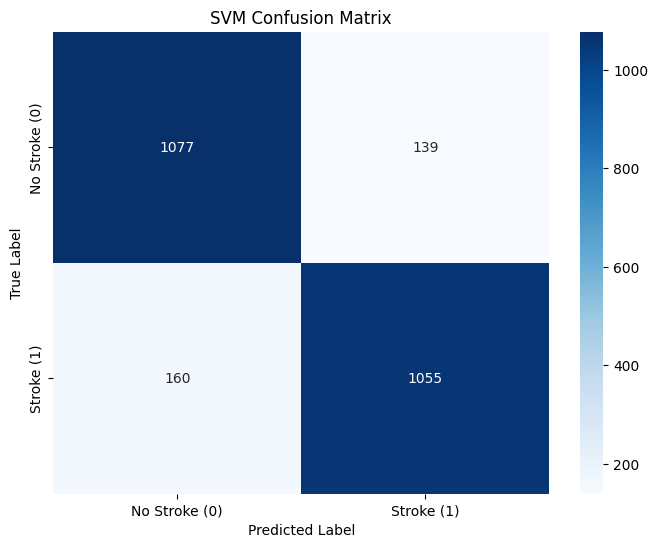

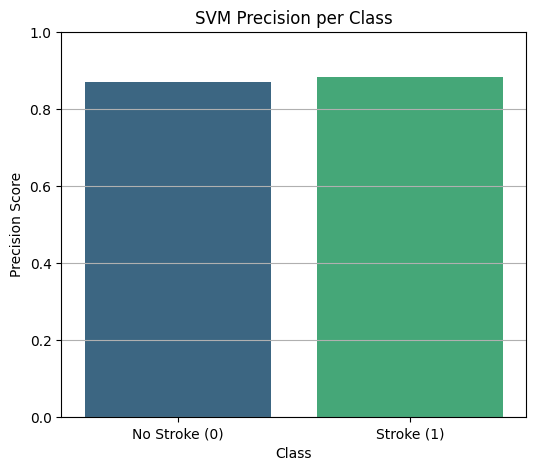

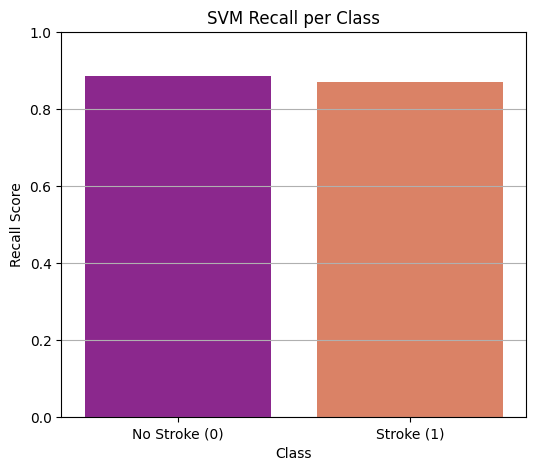

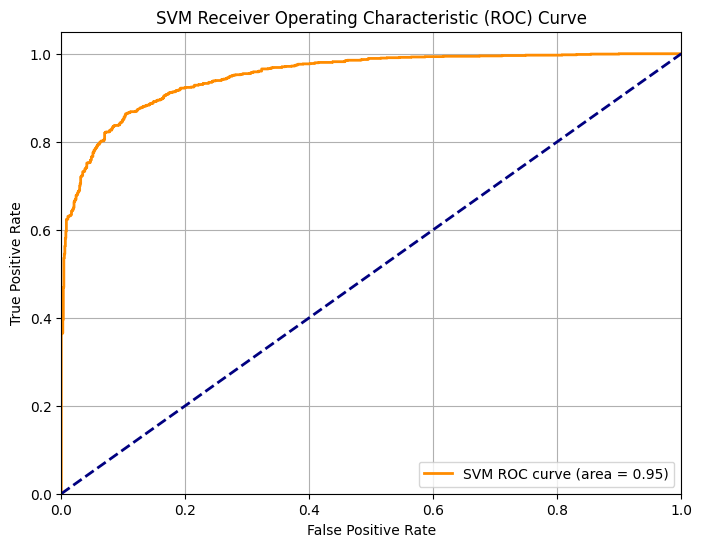


SVM ROC AUC Score: 0.9499


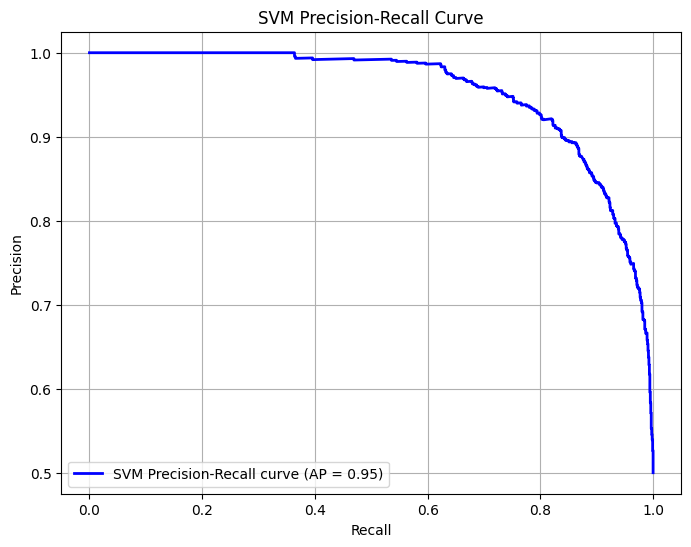

SVM Average Precision (AP) Score: 0.9547

Performing 5-Fold Cross-Validation for SVM:
SVM Accuracy CV Scores: [0.8714653  0.8781491  0.88888889 0.87242798 0.87757202]
Mean SVM Accuracy CV Score: 0.8777 (+/- 0.0124)
SVM Recall CV Scores: [0.86701031 0.873807   0.88391039 0.87924152 0.86410788]
Mean SVM Recall CV Score: 0.8736 (+/- 0.0147)
SVM Precision CV Scores: [0.87422037 0.87473461 0.89484536 0.87400794 0.88617021]
Mean SVM Precision CV Score: 0.8808 (+/- 0.0168)
SVM Roc_auc CV Scores: [0.95103569 0.9507348  0.96170783 0.95028309 0.95224511]
Mean SVM Roc_auc CV Score: 0.9532 (+/- 0.0086)
SVM F1 CV Scores: [0.87060041 0.87427056 0.88934426 0.87661692 0.875     ]
Mean SVM F1 CV Score: 0.8772 (+/- 0.0128)


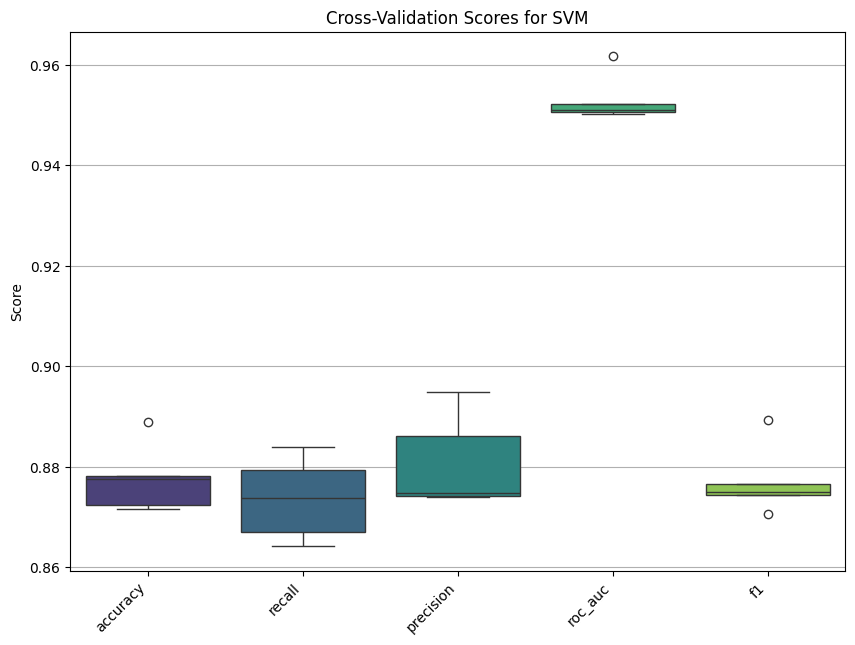


End of Support Vector Machine (SVM) Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Support Vector Machine (SVM) accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Use the resampled data X_res and y_res for training and testing
# If you prefer to use the original data, replace X_res and y_res with X and y
# Note: The original data is highly imbalanced, which will affect model performance metrics like accuracy and recall for the minority class.
# Assuming X_res and y_res are already defined and processed from the previous cells
# X_train, X_test, y_train, y_test are also assumed to be already defined from the previous cell

# Initialize and train the Support Vector Machine (SVM) model
# Use class_weight='balanced' to handle potential remaining imbalance or to improve performance
# on the minority class even with SMOTE.
# Adjust kernel ('linear', 'poly', 'rbf', 'sigmoid') and C (regularization parameter) as needed
svm_model = SVC(kernel='linear', random_state=42, probability=True, class_weight='balanced') # probability=True is needed for ROC/Precision-Recall curves

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke (0)', 'Stroke (1)'], yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_no_stroke_svm = report_dict_svm['0']['precision']
precision_stroke_svm = report_dict_svm['1']['precision']

# You can visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_svm, precision_stroke_svm], palette='viridis')
plt.ylim(0, 1.0)
plt.title('SVM Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()


# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_svm = report_dict_svm['0']['recall']
recall_stroke_svm = report_dict_svm['1']['recall']

# Visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_svm, recall_stroke_svm], palette='plasma')
plt.ylim(0, 1.0)
plt.title('SVM Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nSVM ROC AUC Score: {roc_auc_svm:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)
average_precision_svm = average_precision_score(y_test, y_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'SVM Precision-Recall curve (AP = {average_precision_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"SVM Average Precision (AP) Score: {average_precision_svm:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_svm = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for SVM:")

for scoring in scoring_metrics:
    scores_svm = cross_val_score(svm_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_svm[scoring] = scores_svm
    print(f"SVM {scoring.capitalize()} CV Scores: {scores_svm}")
    print(f"Mean SVM {scoring.capitalize()} CV Score: {scores_svm.mean():.4f} (+/- {scores_svm.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize SVM Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_svm = pd.DataFrame(cv_results_svm)
sns.boxplot(data=cv_results_df_svm, palette='viridis')
plt.title('Cross-Validation Scores for SVM')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Support Vector Machine (SVM) Training, Testing, and Evaluation.")



Decision Tree Model Evaluation:
Accuracy: 0.9321

Confusion Matrix:
[[1115  101]
 [  64 1151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1216
           1       0.92      0.95      0.93      1215

    accuracy                           0.93      2431
   macro avg       0.93      0.93      0.93      2431
weighted avg       0.93      0.93      0.93      2431



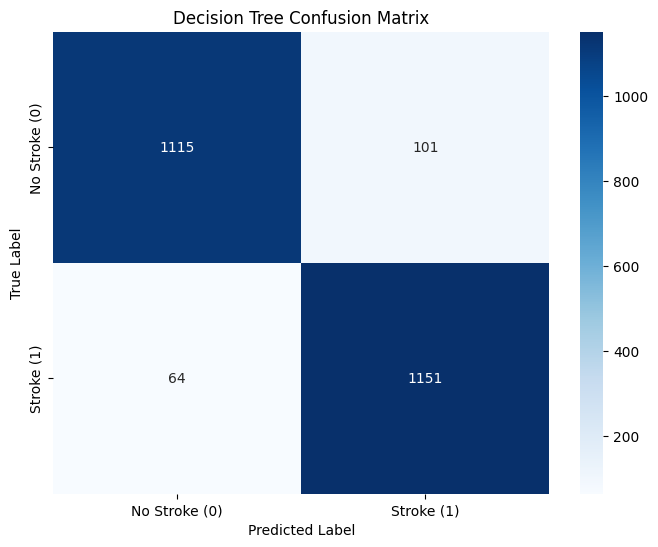

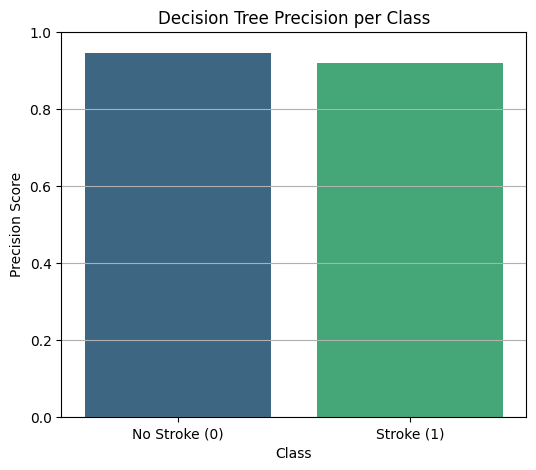

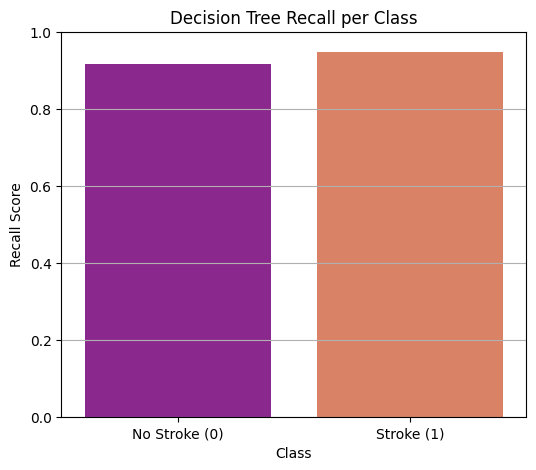

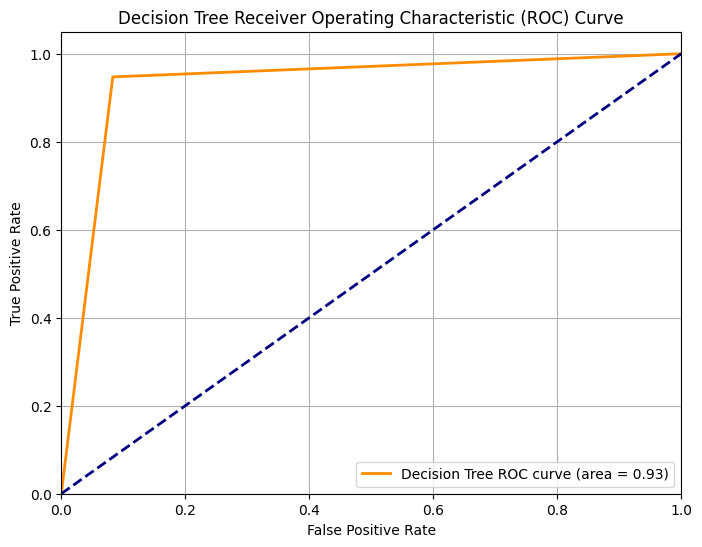


Decision Tree ROC AUC Score: 0.9321


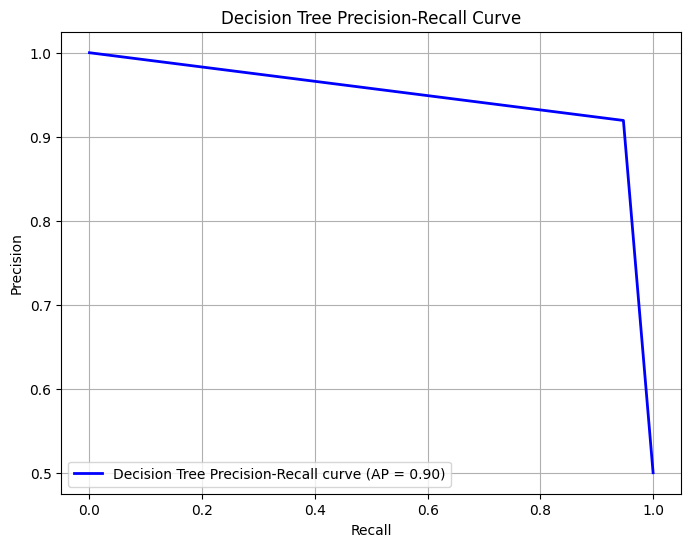

Decision Tree Average Precision (AP) Score: 0.8972

Performing 5-Fold Cross-Validation for Decision Tree:
Decision Tree Accuracy CV Scores: [0.92956298 0.9218509  0.91923868 0.92901235 0.93261317]
Mean Decision Tree Accuracy CV Score: 0.9265 (+/- 0.0101)
Decision Tree Recall CV Scores: [0.94639175 0.93107105 0.93991853 0.95309381 0.94709544]
Mean Decision Tree Recall CV Score: 0.9435 (+/- 0.0150)
Decision Tree Precision CV Scores: [0.91525424 0.90984456 0.90401567 0.91300191 0.91943605]
Mean Decision Tree Precision CV Score: 0.9123 (+/- 0.0104)
Decision Tree Roc_auc CV Scores: [0.92960613 0.92212235 0.91902372 0.92824542 0.93273139]
Mean Decision Tree Roc_auc CV Score: 0.9263 (+/- 0.0101)
Decision Tree F1 CV Scores: [0.9305626  0.92033543 0.92161757 0.93261719 0.93306081]
Mean Decision Tree F1 CV Score: 0.9276 (+/- 0.0110)


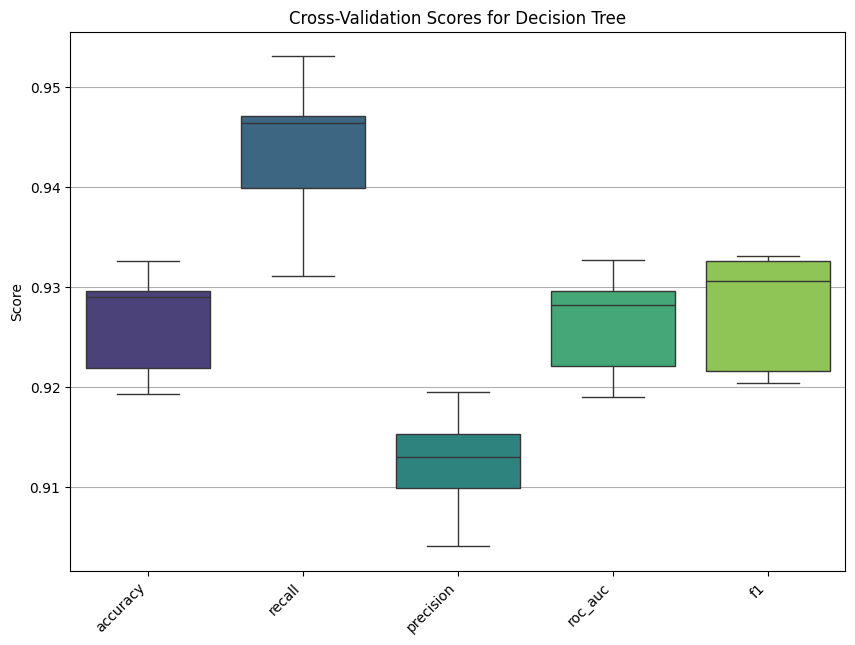


End of Decision Tree Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Decision Trees accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from collections import Counter # Import Counter

# Use the resampled data X_res and y_res for training and testing
# Assuming X_res and y_res are already defined and processed from the previous cells
# X_train, X_test, y_train, y_test are also assumed to be already defined from the previous cell

# Initialize and train the Decision Tree model
# You can adjust hyperparameters like criterion ('gini' or 'entropy'), max_depth, min_samples_split, min_samples_leaf
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced') # Use class_weight='balanced'

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke (0)', 'Stroke (1)'], yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_no_stroke_dt = report_dict_dt['0']['precision']
precision_stroke_dt = report_dict_dt['1']['precision']

# You can visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_dt, precision_stroke_dt], palette='viridis')
plt.ylim(0, 1.0)
plt.title('Decision Tree Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()


# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_dt = report_dict_dt['0']['recall']
recall_stroke_dt = report_dict_dt['1']['recall']

# Visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_dt, recall_stroke_dt], palette='plasma')
plt.ylim(0, 1.0)
plt.title('Decision Tree Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nDecision Tree ROC AUC Score: {roc_auc_dt:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_proba_dt)
average_precision_dt = average_precision_score(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='blue', lw=2, label=f'Decision Tree Precision-Recall curve (AP = {average_precision_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Decision Tree Average Precision (AP) Score: {average_precision_dt:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_dt = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for Decision Tree:")

for scoring in scoring_metrics:
    scores_dt = cross_val_score(dt_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_dt[scoring] = scores_dt
    print(f"Decision Tree {scoring.capitalize()} CV Scores: {scores_dt}")
    print(f"Mean Decision Tree {scoring.capitalize()} CV Score: {scores_dt.mean():.4f} (+/- {scores_dt.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize Decision Tree Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_dt = pd.DataFrame(cv_results_dt)
sns.boxplot(data=cv_results_df_dt, palette='viridis')
plt.title('Cross-Validation Scores for Decision Tree')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Decision Tree Training, Testing, and Evaluation.")



Random Forest Model Evaluation:
Accuracy: 0.9613

Confusion Matrix:
[[1168   48]
 [  46 1169]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1216
           1       0.96      0.96      0.96      1215

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431



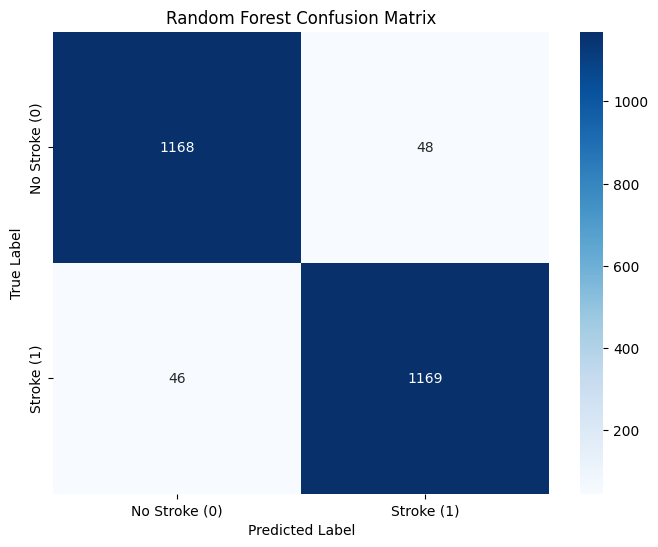

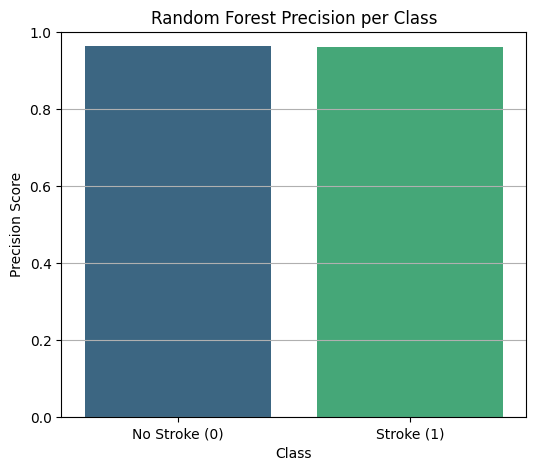

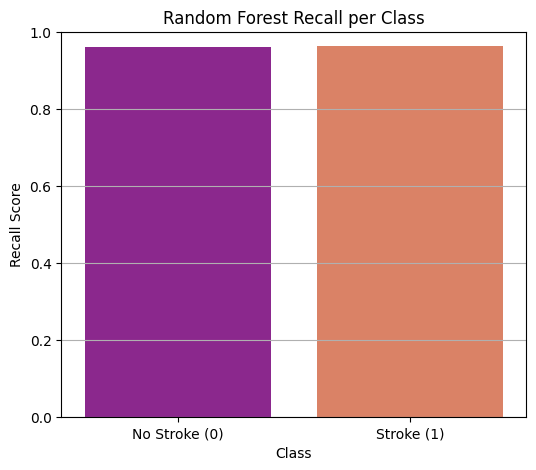

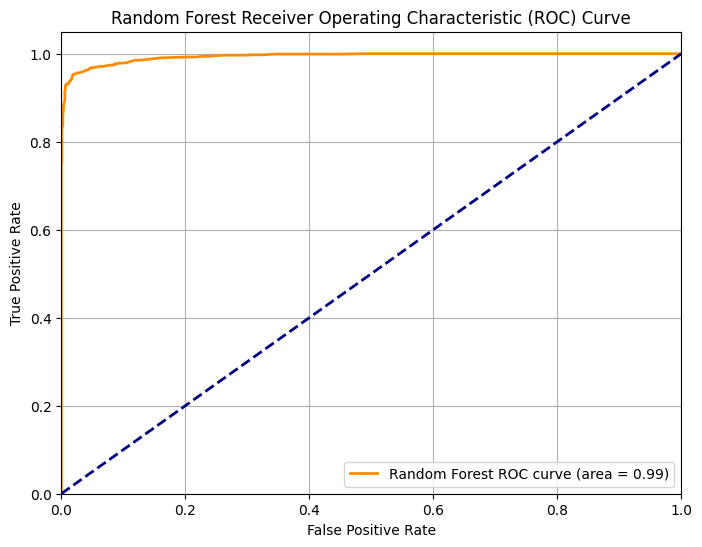


Random Forest ROC AUC Score: 0.9938


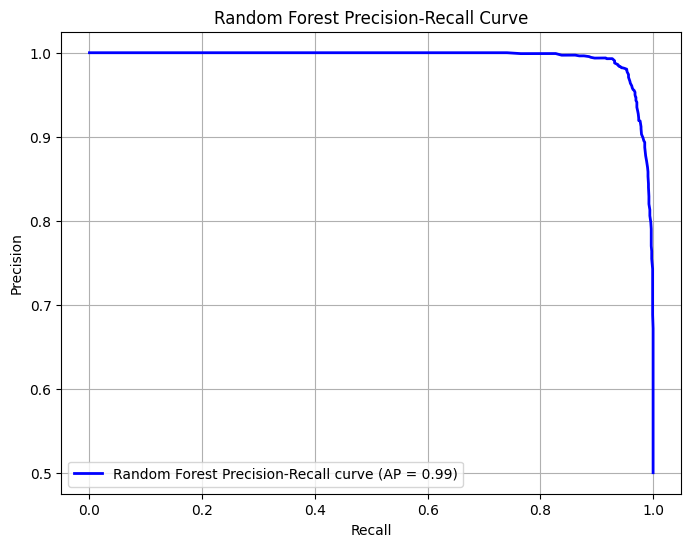

Random Forest Average Precision (AP) Score: 0.9943

Performing 5-Fold Cross-Validation for Random Forest:
Random Forest Accuracy CV Scores: [0.96246787 0.96041131 0.9686214  0.95987654 0.95730453]
Mean Random Forest Accuracy CV Score: 0.9617 (+/- 0.0076)
Random Forest Recall CV Scores: [0.95979381 0.96182397 0.96843177 0.96506986 0.95954357]
Mean Random Forest Recall CV Score: 0.9629 (+/- 0.0068)
Random Forest Precision CV Scores: [0.96476684 0.95675105 0.96941896 0.95742574 0.95459236]
Mean Random Forest Precision CV Score: 0.9606 (+/- 0.0112)
Random Forest Roc_auc CV Scores: [0.99351943 0.99358229 0.99480885 0.99324069 0.99265814]
Mean Random Forest Roc_auc CV Score: 0.9936 (+/- 0.0014)
Random Forest F1 CV Scores: [0.9622739  0.9592808  0.96892511 0.9612326  0.95706156]
Mean Random Forest F1 CV Score: 0.9618 (+/- 0.0080)


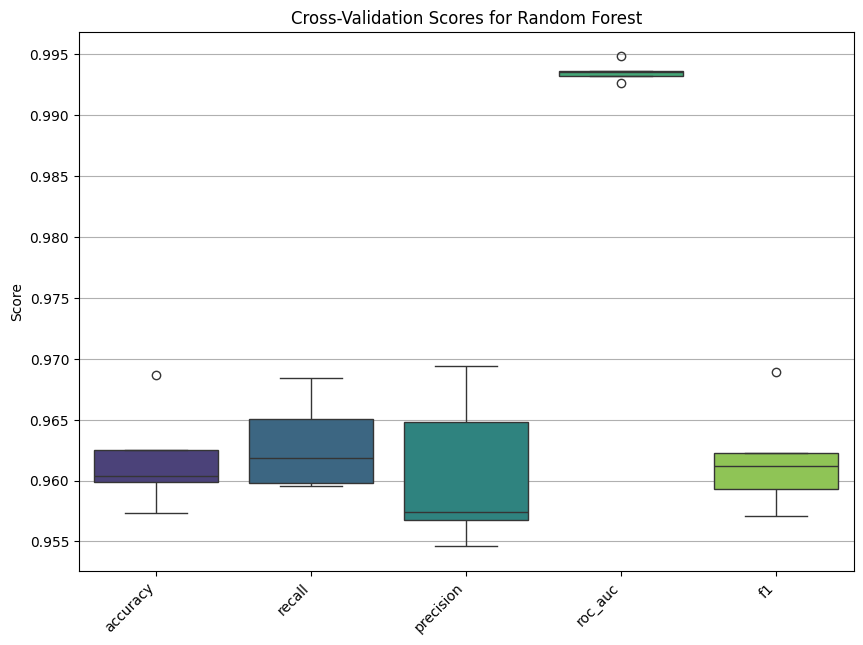


End of Random Forest Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Random Forest accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from collections import Counter # Import Counter

# Use the resampled data X_res and y_res for training and testing
# Assuming X_res and y_res are already defined and processed from the previous cells
# X_train, X_test, y_train, y_test are also assumed to be already defined from the previous cell

# Initialize and train the Random Forest model
# You can adjust hyperparameters like n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Use class_weight='balanced'

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke (0)', 'Stroke (1)'], yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_no_stroke_rf = report_dict_rf['0']['precision']
precision_stroke_rf = report_dict_rf['1']['precision']

# You can visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_rf, precision_stroke_rf], palette='viridis')
plt.ylim(0, 1.0)
plt.title('Random Forest Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()


# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_rf = report_dict_rf['0']['recall']
recall_stroke_rf = report_dict_rf['1']['recall']

# Visualize this as a simple bar chart for each class
plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_rf, recall_stroke_rf], palette='plasma')
plt.ylim(0, 1.0)
plt.title('Random Forest Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nRandom Forest ROC AUC Score: {roc_auc_rf:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
average_precision_rf = average_precision_score(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label=f'Random Forest Precision-Recall curve (AP = {average_precision_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Random Forest Average Precision (AP) Score: {average_precision_rf:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_rf = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for Random Forest:")

for scoring in scoring_metrics:
    scores_rf = cross_val_score(rf_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_rf[scoring] = scores_rf
    print(f"Random Forest {scoring.capitalize()} CV Scores: {scores_rf}")
    print(f"Mean Random Forest {scoring.capitalize()} CV Score: {scores_rf.mean():.4f} (+/- {scores_rf.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize Random Forest Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_rf = pd.DataFrame(cv_results_rf)
sns.boxplot(data=cv_results_df_rf, palette='viridis')
plt.title('Cross-Validation Scores for Random Forest')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Random Forest Training, Testing, and Evaluation.")



XGBoost Model Evaluation:
Accuracy: 0.9622

Confusion Matrix:
[[1172   44]
 [  48 1167]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1216
           1       0.96      0.96      0.96      1215

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431



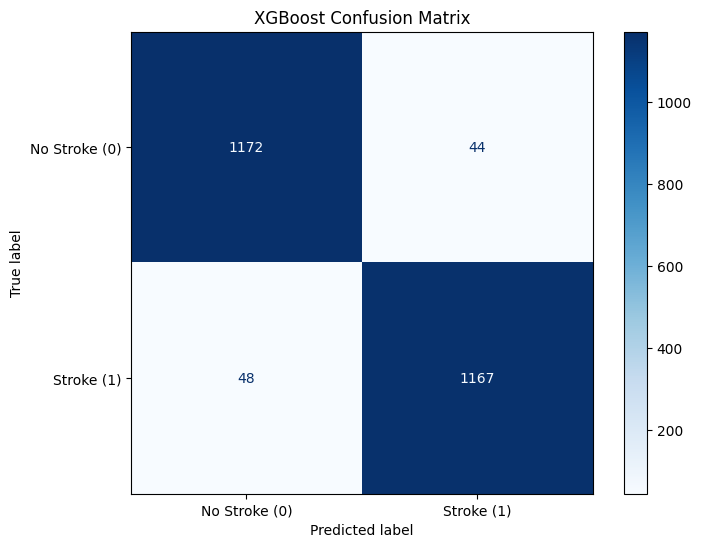

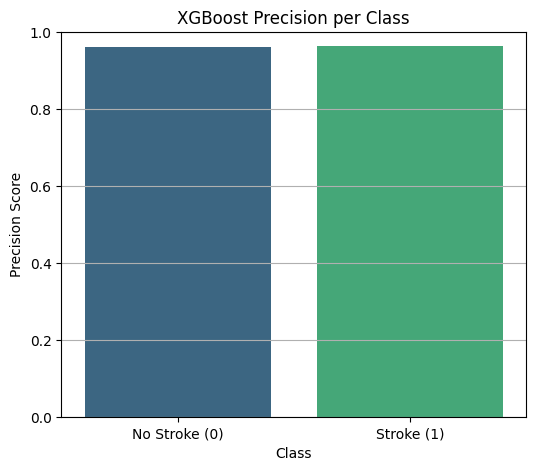

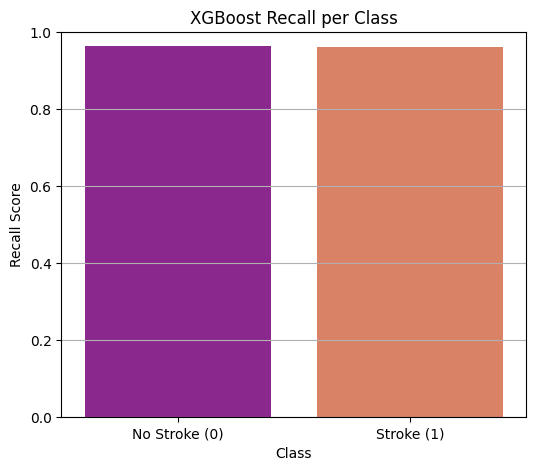

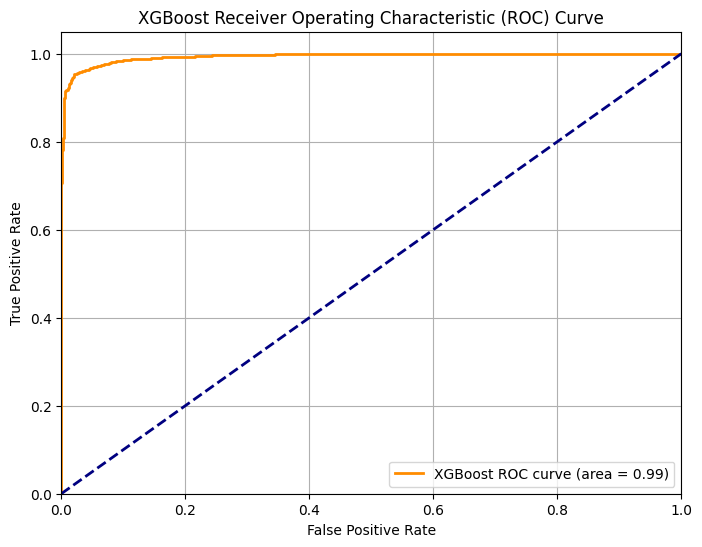


XGBoost ROC AUC Score: 0.9937


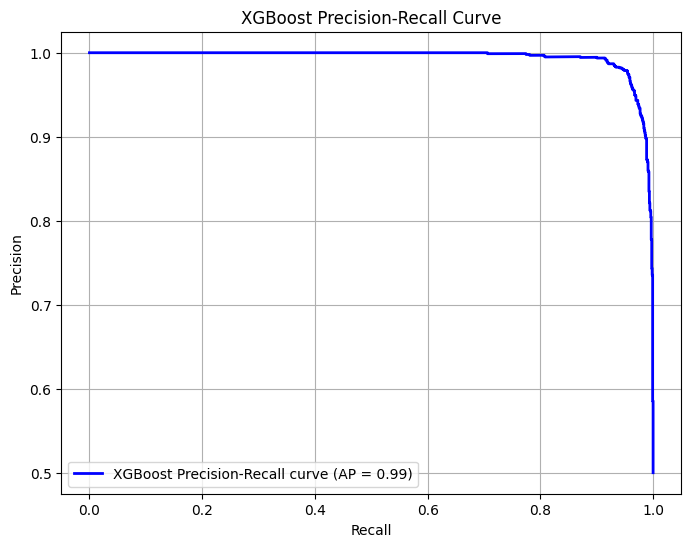

XGBoost Average Precision (AP) Score: 0.9944

Performing 5-Fold Cross-Validation for XGBoost:
XGBoost Accuracy CV Scores: [0.96298201 0.95681234 0.96656379 0.95576132 0.95524691]
Mean XGBoost Accuracy CV Score: 0.9595 (+/- 0.0090)
XGBoost Recall CV Scores: [0.95876289 0.96076352 0.97250509 0.96107784 0.96058091]
Mean XGBoost Recall CV Score: 0.9627 (+/- 0.0099)
XGBoost Precision CV Scores: [0.96673597 0.95068206 0.96173212 0.95346535 0.94974359]
Mean XGBoost Precision CV Score: 0.9565 (+/- 0.0133)
XGBoost Roc_auc CV Scores: [0.9930267  0.99203925 0.99353117 0.99246359 0.99211618]
Mean XGBoost Roc_auc CV Score: 0.9926 (+/- 0.0011)
XGBoost F1 CV Scores: [0.96273292 0.9556962  0.96708861 0.95725646 0.95513151]
Mean XGBoost F1 CV Score: 0.9596 (+/- 0.0092)


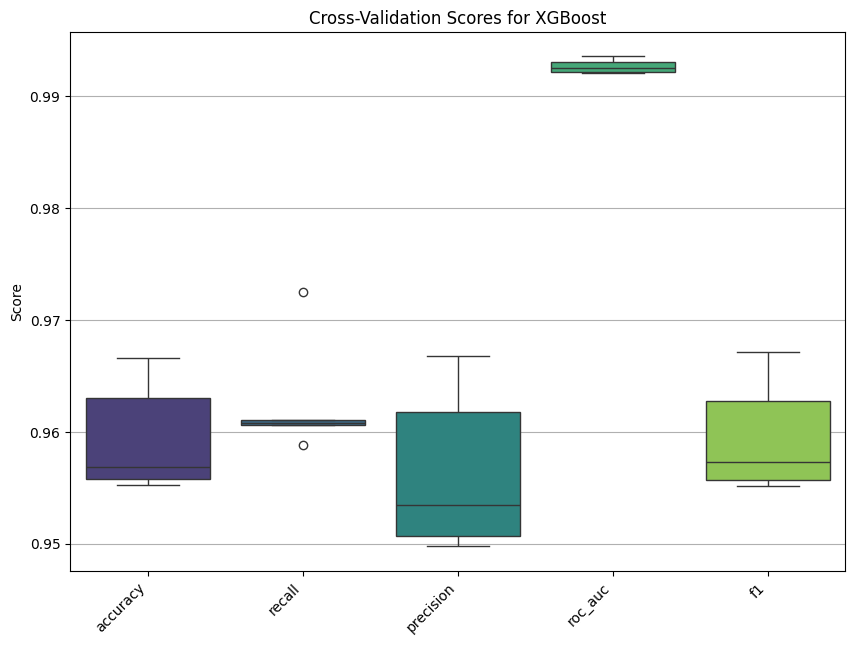


End of XGBoost Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the XGBoost accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume X_res and y_res are the resampled features and target variable from the previous cells
# If not, you need to define them first, e.g., by loading data and applying SMOTE.
# Example (if X_res, y_res are not already in the environment):
# X = df.drop('stroke', axis=1)
# y = df['stroke']
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

# Initialize and train the XGBoost model
# Use scale_pos_weight to handle potential remaining imbalance (though SMOTE helps)
# Or use the class_weight parameter if available in the specific XGBoost version/wrapper
# Let's start without scale_pos_weight first after SMOTE, and you can add it if needed.
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
# Use the latest parameters:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

# Plot Confusion Matrix
disp_conf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=['No Stroke (0)', 'Stroke (1)'])
fig_conf, ax_conf = plt.subplots(figsize=(8, 6))
disp_conf.plot(cmap='Blues', ax=ax_conf)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
precision_no_stroke_xgb = report_dict_xgb['0']['precision']
precision_stroke_xgb = report_dict_xgb['1']['precision']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_xgb, precision_stroke_xgb], palette='viridis')
plt.ylim(0, 1.0)
plt.title('XGBoost Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()

# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_xgb = report_dict_xgb['0']['recall']
recall_stroke_xgb = report_dict_xgb['1']['recall']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_xgb, recall_stroke_xgb], palette='plasma')
plt.ylim(0, 1.0)
plt.title('XGBoost Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nXGBoost ROC AUC Score: {roc_auc_xgb:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
average_precision_xgb = average_precision_score(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label=f'XGBoost Precision-Recall curve (AP = {average_precision_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"XGBoost Average Precision (AP) Score: {average_precision_xgb:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_xgb = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for XGBoost:")

for scoring in scoring_metrics:
    scores_xgb = cross_val_score(xgb_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_xgb[scoring] = scores_xgb
    print(f"XGBoost {scoring.capitalize()} CV Scores: {scores_xgb}")
    print(f"Mean XGBoost {scoring.capitalize()} CV Score: {scores_xgb.mean():.4f} (+/- {scores_xgb.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize XGBoost Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_xgb = pd.DataFrame(cv_results_xgb)
sns.boxplot(data=cv_results_df_xgb, palette='viridis')
plt.title('Cross-Validation Scores for XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of XGBoost Training, Testing, and Evaluation.")


K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy: 0.8984

Confusion Matrix:
[[ 988  228]
 [  19 1196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1216
           1       0.84      0.98      0.91      1215

    accuracy                           0.90      2431
   macro avg       0.91      0.90      0.90      2431
weighted avg       0.91      0.90      0.90      2431



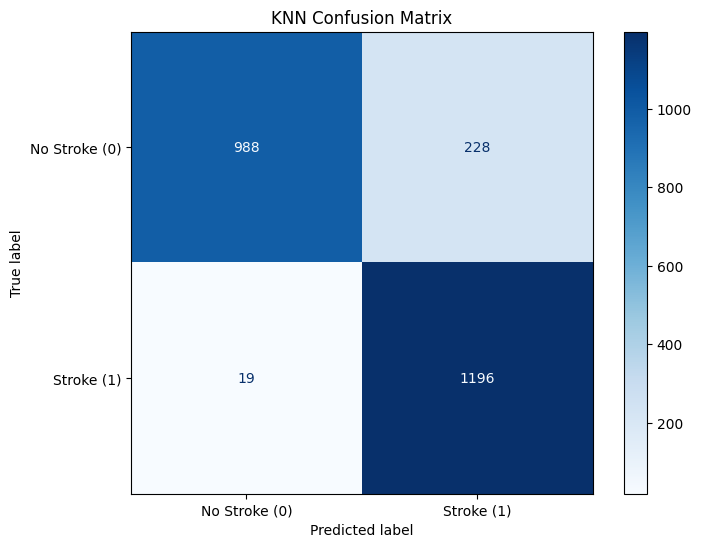

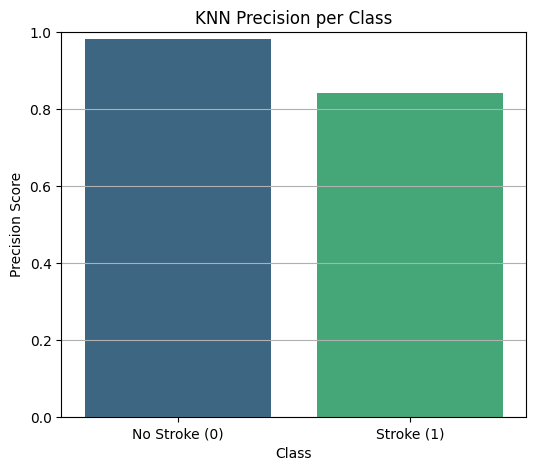

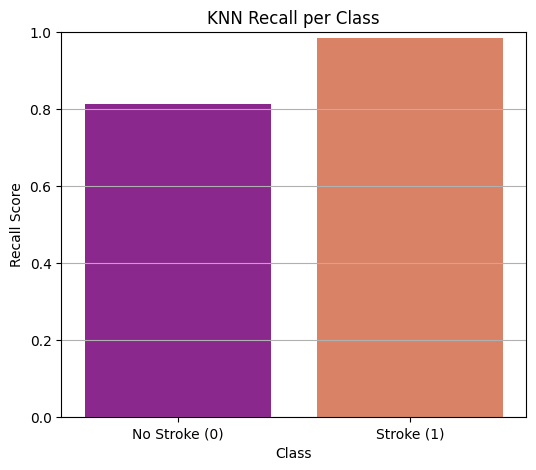

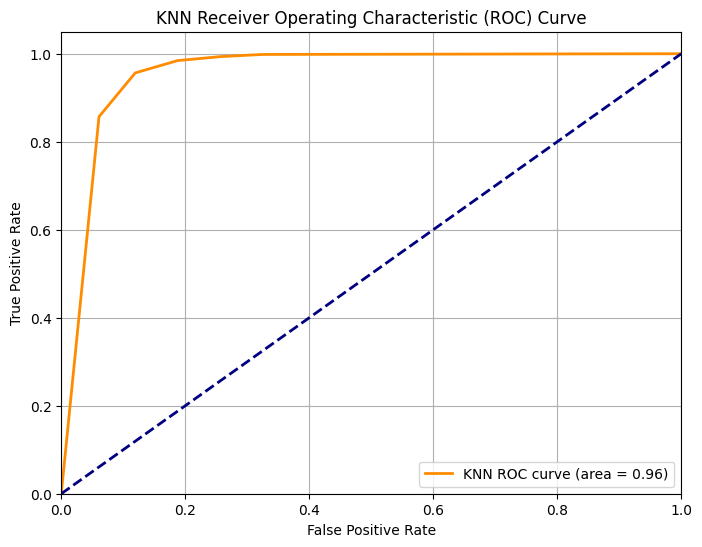


KNN ROC AUC Score: 0.9561


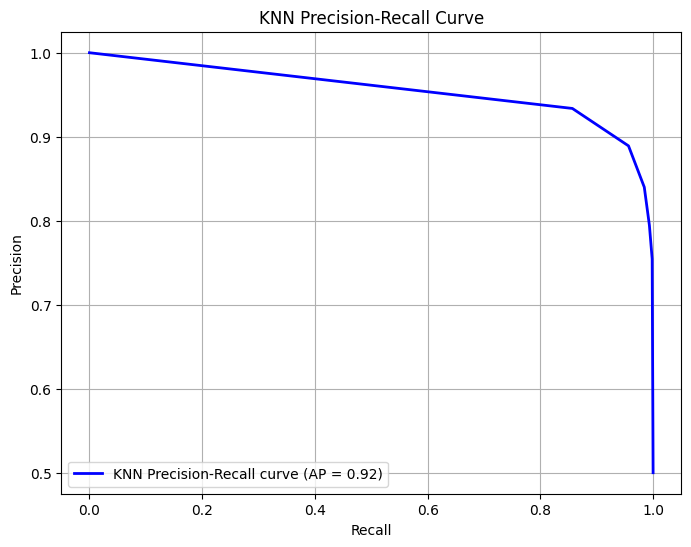

KNN Average Precision (AP) Score: 0.9237

Performing 5-Fold Cross-Validation for KNN:
KNN Accuracy CV Scores: [0.89922879 0.89871465 0.89711934 0.88631687 0.90740741]
Mean KNN Accuracy CV Score: 0.8978 (+/- 0.0135)
KNN Recall CV Scores: [0.97731959 0.99151644 0.97759674 0.98403194 0.97821577]
Mean KNN Recall CV Score: 0.9817 (+/- 0.0110)
KNN Precision CV Scores: [0.84491979 0.83185053 0.84358524 0.82787573 0.85571688]
Mean KNN Precision CV Score: 0.8408 (+/- 0.0199)
KNN Roc_auc CV Scores: [0.95372879 0.95957713 0.95297528 0.94629584 0.95954304]
Mean KNN Roc_auc CV Score: 0.9544 (+/- 0.0099)
KNN F1 CV Scores: [0.90630975 0.90469279 0.90566038 0.89922481 0.91287512]
Mean KNN F1 CV Score: 0.9058 (+/- 0.0087)


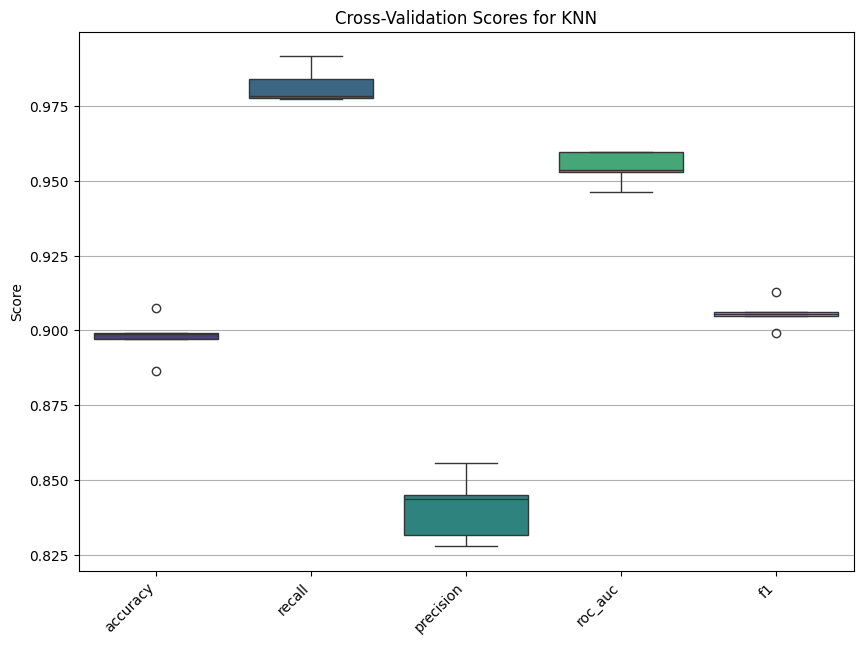


End of K-Nearest Neighbors (KNN) Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the K-Nearest Neighbors (KNN) accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import xgboost as xgb

# Assuming X_res and y_res are the resampled features and target variable from the previous cells
# If not, you need to define them first, e.g., by loading data and applying SMOTE.
# Example (if X_res, y_res are not already in the environment):
# X = df.drop('stroke', axis=1)
# y = df['stroke']
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

# Initialize and train the K-Nearest Neighbors (KNN) model
# You can adjust the number of neighbors (n_neighbors) and distance metric (p=1 for Manhattan, p=2 for Euclidean)
knn_model = KNeighborsClassifier(n_neighbors=5, p=2) # Example: 5 neighbors, Euclidean distance

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)

# Plot Confusion Matrix
disp_conf_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['No Stroke (0)', 'Stroke (1)'])
fig_conf_knn, ax_conf_knn = plt.subplots(figsize=(8, 6))
disp_conf_knn.plot(cmap='Blues', ax=ax_conf_knn)
plt.title('KNN Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision_no_stroke_knn = report_dict_knn['0']['precision']
precision_stroke_knn = report_dict_knn['1']['precision']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_knn, precision_stroke_knn], palette='viridis')
plt.ylim(0, 1.0)
plt.title('KNN Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()

# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_knn = report_dict_knn['0']['recall']
recall_stroke_knn = report_dict_knn['1']['recall']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_knn, recall_stroke_knn], palette='plasma')
plt.ylim(0, 1.0)
plt.title('KNN Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nKNN ROC AUC Score: {roc_auc_knn:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)
average_precision_knn = average_precision_score(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label=f'KNN Precision-Recall curve (AP = {average_precision_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"KNN Average Precision (AP) Score: {average_precision_knn:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_knn = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for KNN:")

for scoring in scoring_metrics:
    scores_knn = cross_val_score(knn_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_knn[scoring] = scores_knn
    print(f"KNN {scoring.capitalize()} CV Scores: {scores_knn}")
    print(f"Mean KNN {scoring.capitalize()} CV Score: {scores_knn.mean():.4f} (+/- {scores_knn.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize KNN Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_knn = pd.DataFrame(cv_results_knn)
sns.boxplot(data=cv_results_df_knn, palette='viridis')
plt.title('Cross-Validation Scores for KNN')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of K-Nearest Neighbors (KNN) Training, Testing, and Evaluation.")



Gaussian Naive Bayes Model Evaluation:
Accuracy: 0.6800

Confusion Matrix:
[[ 467  749]
 [  29 1186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.38      0.55      1216
           1       0.61      0.98      0.75      1215

    accuracy                           0.68      2431
   macro avg       0.78      0.68      0.65      2431
weighted avg       0.78      0.68      0.65      2431



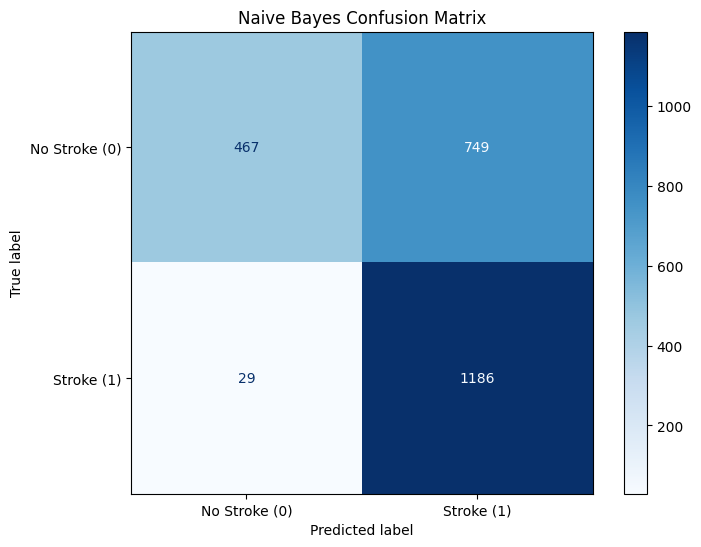

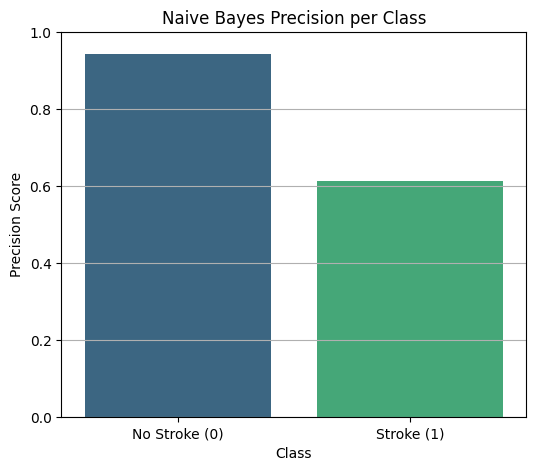

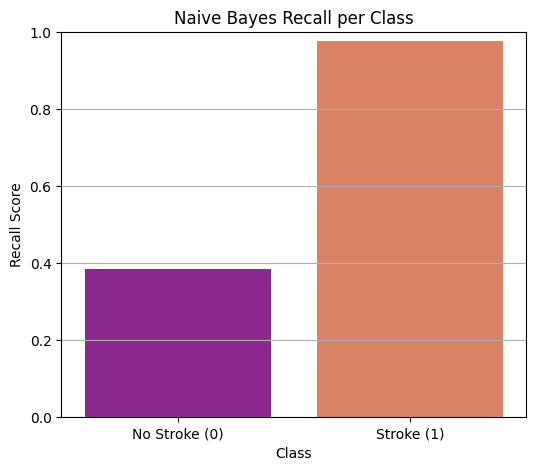

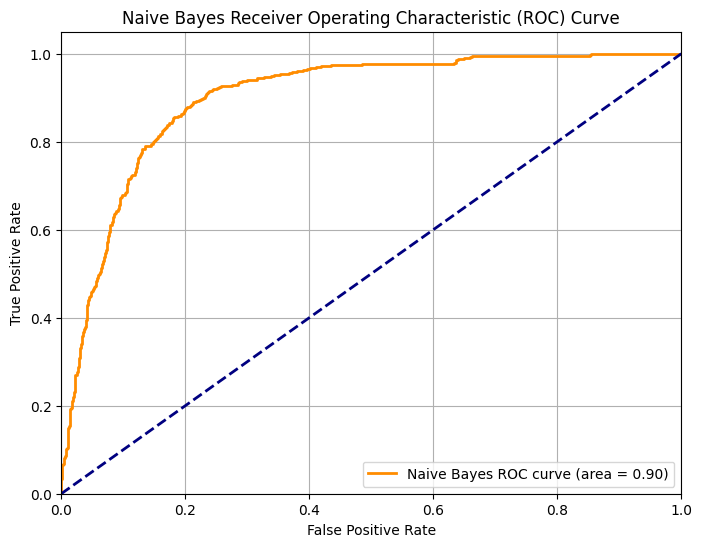


Naive Bayes ROC AUC Score: 0.9007


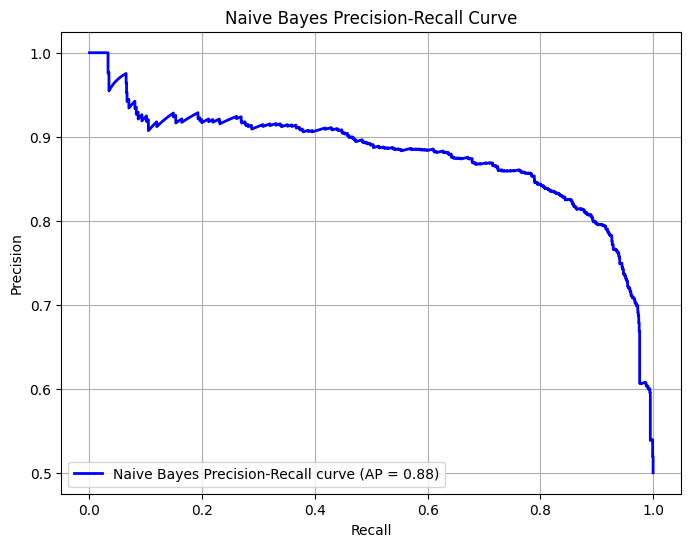

Naive Bayes Average Precision (AP) Score: 0.8777

Performing 5-Fold Cross-Validation for Naive Bayes:
Naive Bayes Accuracy CV Scores: [0.67043702 0.67043702 0.6718107  0.71296296 0.67644033]
Mean Naive Bayes Accuracy CV Score: 0.6804 (+/- 0.0328)
Naive Bayes Recall CV Scores: [0.96597938 0.97454931 0.9796334  0.98502994 0.97821577]
Mean Naive Bayes Recall CV Score: 0.9767 (+/- 0.0126)
Naive Bayes Precision CV Scores: [0.60647249 0.59830729 0.60886076 0.64509804 0.60799484]
Mean Naive Bayes Precision CV Score: 0.6133 (+/- 0.0326)
Naive Bayes Roc_auc CV Scores: [0.89100714 0.91372928 0.91287775 0.90934373 0.90943666]
Mean Naive Bayes Roc_auc CV Score: 0.9073 (+/- 0.0167)
Naive Bayes F1 CV Scores: [0.74512922 0.741428   0.7509758  0.77962085 0.7499006 ]
Mean Naive Bayes F1 CV Score: 0.7534 (+/- 0.0271)


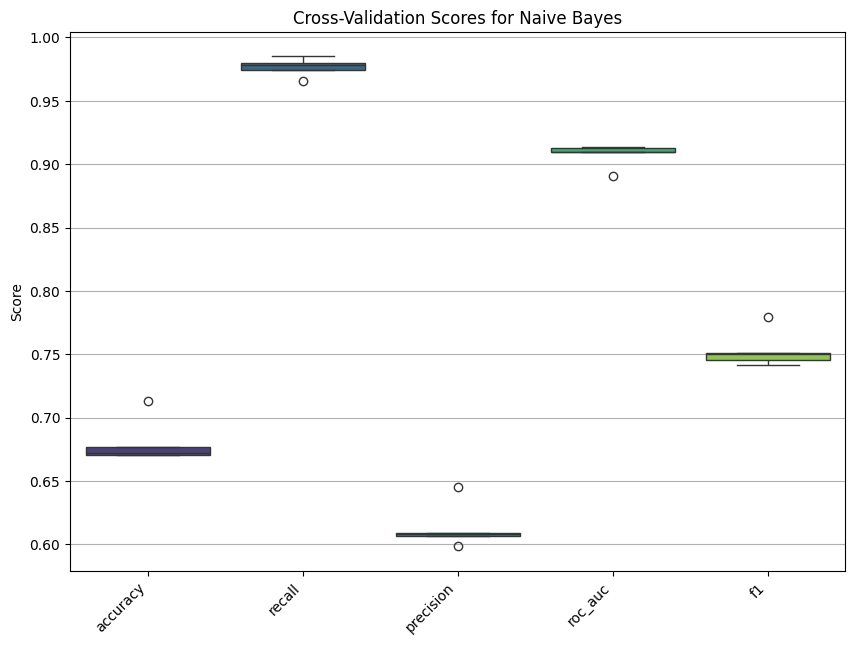


End of Gaussian Naive Bayes Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Naive Bayes accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from collections import Counter

# Use the resampled data X_res and y_res for training and testing
# Assuming X_res and y_res are already defined and processed from the previous cells
# If not, you need to define them first, e.g., by loading data and applying SMOTE.
# Example (if X_res, y_res are not already in the environment):
# X = df.drop('stroke', axis=1)
# y = df['stroke']
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("\nGaussian Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(class_report_nb)

# Plot Confusion Matrix
disp_conf_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=['No Stroke (0)', 'Stroke (1)'])
fig_conf_nb, ax_conf_nb = plt.subplots(figsize=(8, 6))
disp_conf_nb.plot(cmap='Blues', ax=ax_conf_nb)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_nb = classification_report(y_test, y_pred_nb, output_dict=True)
precision_no_stroke_nb = report_dict_nb['0']['precision']
precision_stroke_nb = report_dict_nb['1']['precision']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_nb, precision_stroke_nb], palette='viridis')
plt.ylim(0, 1.0)
plt.title('Naive Bayes Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()

# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_nb = report_dict_nb['0']['recall']
recall_stroke_nb = report_dict_nb['1']['recall']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_nb, recall_stroke_nb], palette='plasma')
plt.ylim(0, 1.0)
plt.title('Naive Bayes Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nNaive Bayes ROC AUC Score: {roc_auc_nb:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_proba_nb)
average_precision_nb = average_precision_score(y_test, y_proba_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='blue', lw=2, label=f'Naive Bayes Precision-Recall curve (AP = {average_precision_nb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Naive Bayes Average Precision (AP) Score: {average_precision_nb:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_nb = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for Naive Bayes:")

for scoring in scoring_metrics:
    scores_nb = cross_val_score(nb_model, X_res, y_res, cv=kf, scoring=scoring)
    cv_results_nb[scoring] = scores_nb
    print(f"Naive Bayes {scoring.capitalize()} CV Scores: {scores_nb}")
    print(f"Mean Naive Bayes {scoring.capitalize()} CV Score: {scores_nb.mean():.4f} (+/- {scores_nb.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize Naive Bayes Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_nb = pd.DataFrame(cv_results_nb)
sns.boxplot(data=cv_results_df_nb, palette='viridis')
plt.title('Cross-Validation Scores for Naive Bayes')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Gaussian Naive Bayes Training, Testing, and Evaluation.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.1 MB/s eta 0:00:00

--- Training and Evaluating Ensemble Methods ---

--- Training Gradient Boosting ---

Gradient Boosting Model Evaluation:
Accuracy: 0.9177

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1216
           1       0.91      0.92      0.92      1215

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431


--- Training AdaBoost ---

AdaBoost Model Evaluation:
Accuracy: 0.8667

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1216
           1       0.85      0.89      0.87      1215

    accuracy                           0.87      2431
   macro avg       0.87      0.87      0.87      2431
weighted avg       0.87      0.87      0.87      2431


--- T

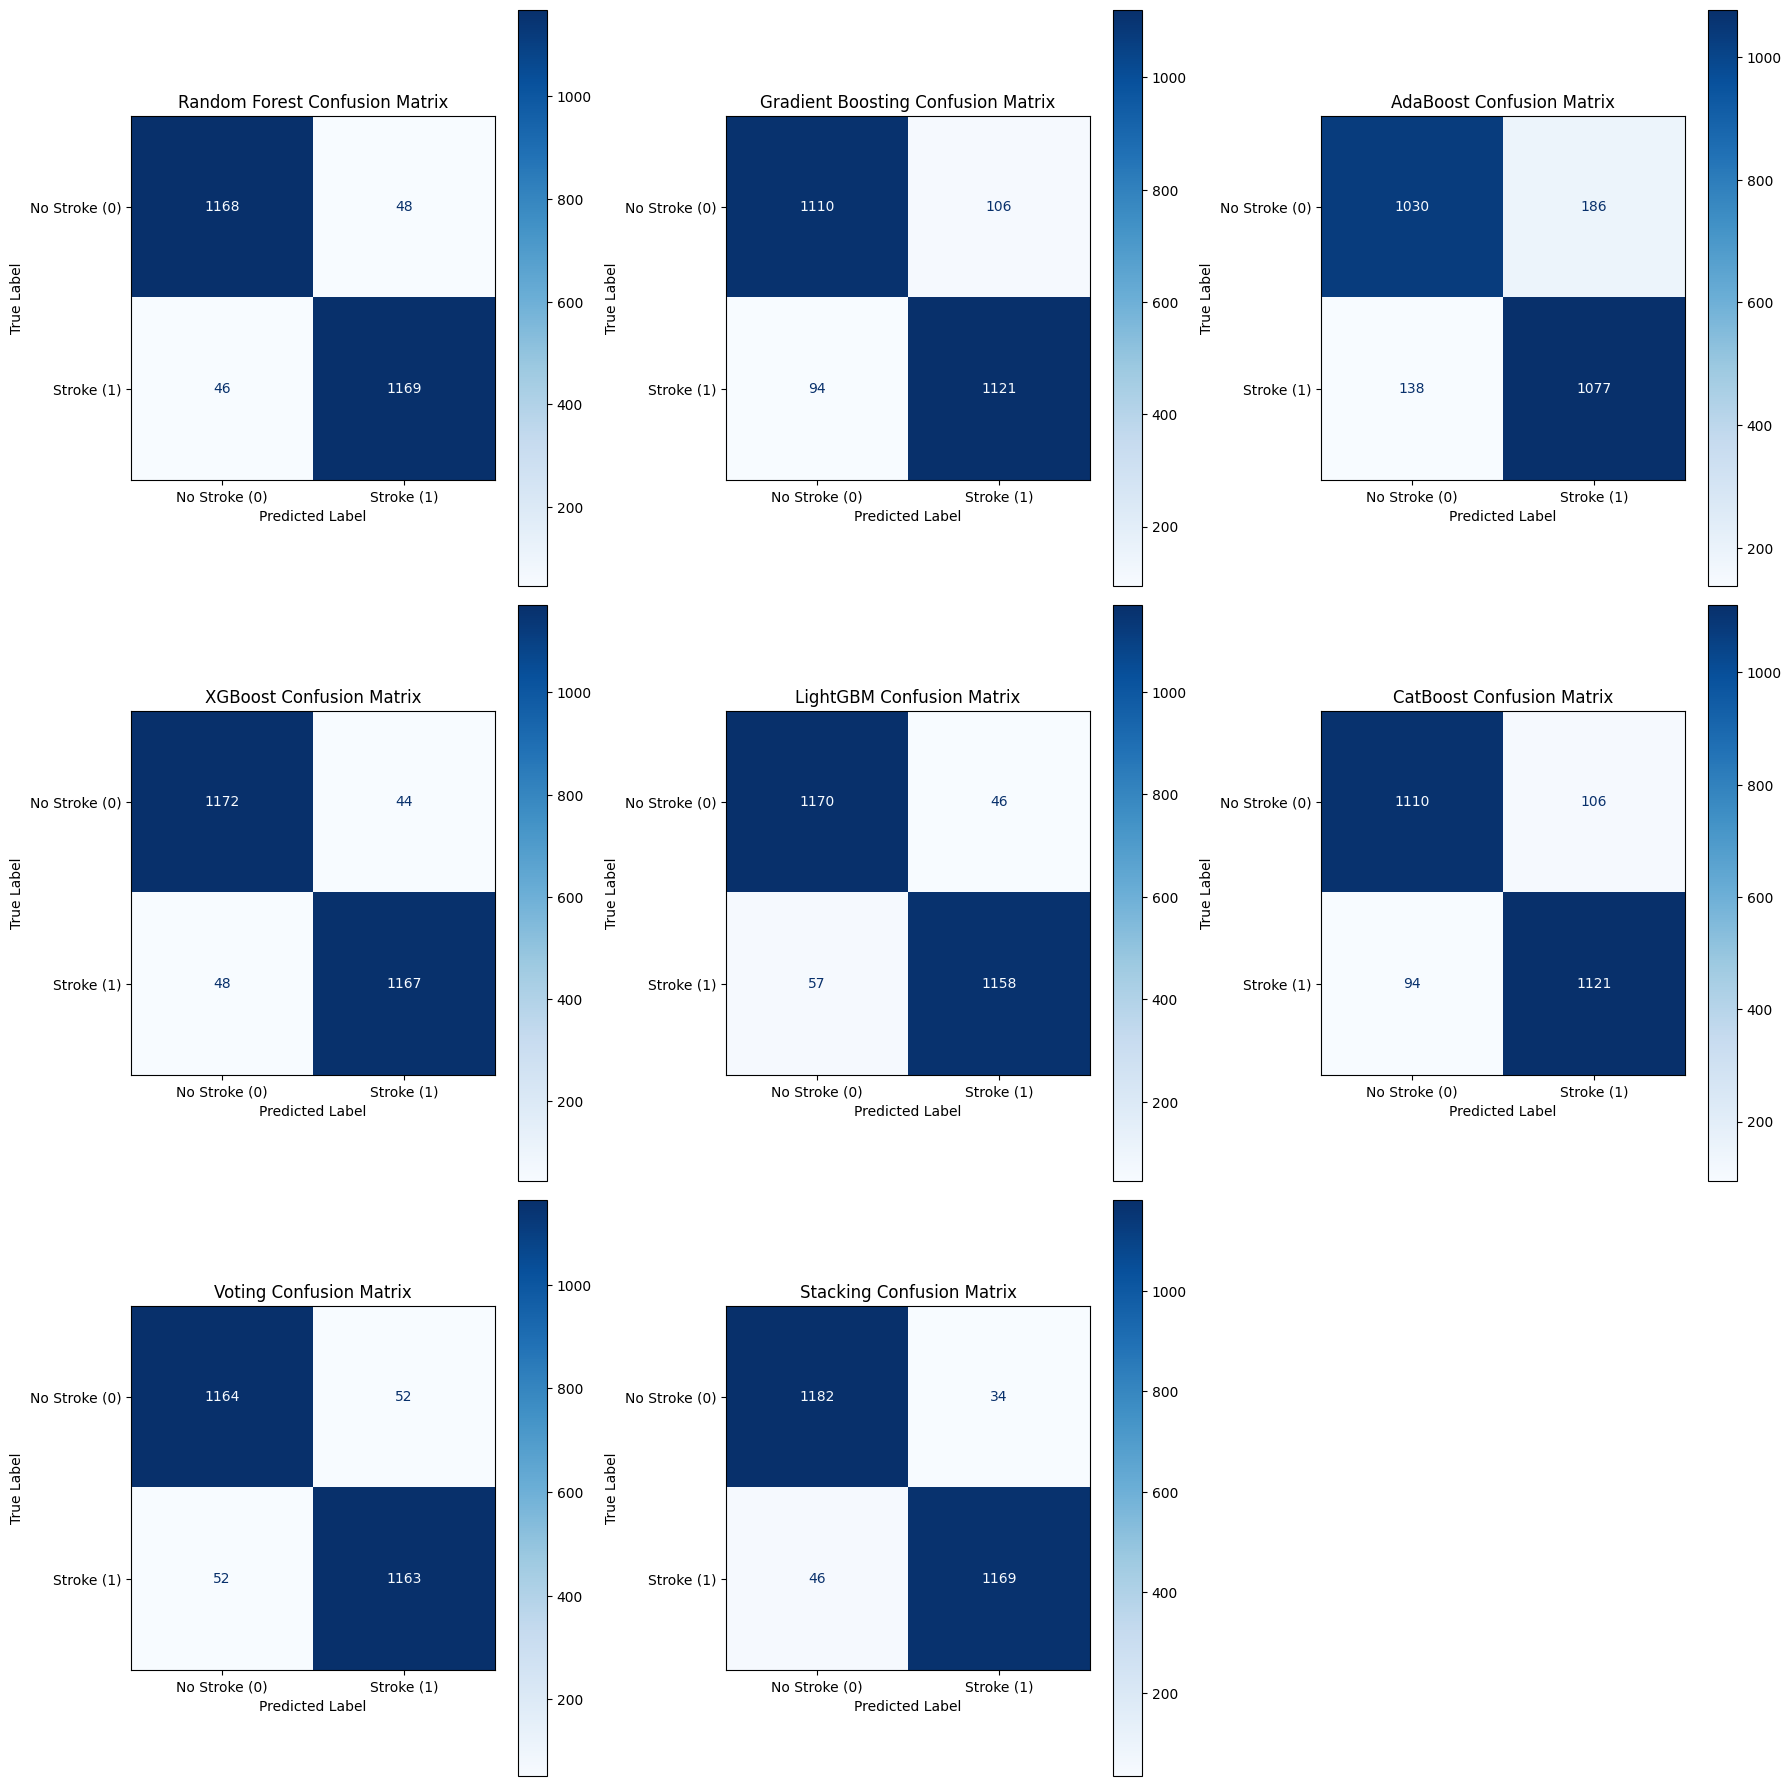


--- Plotting Precision and Recall per Class for Ensemble Models ---


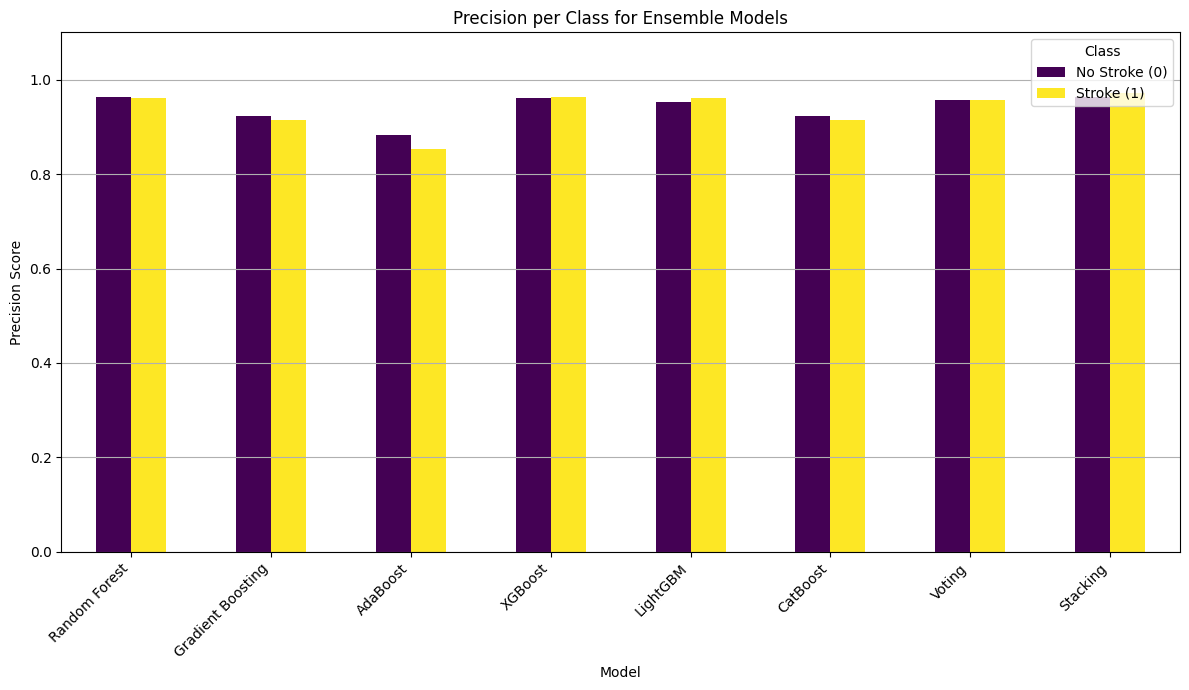

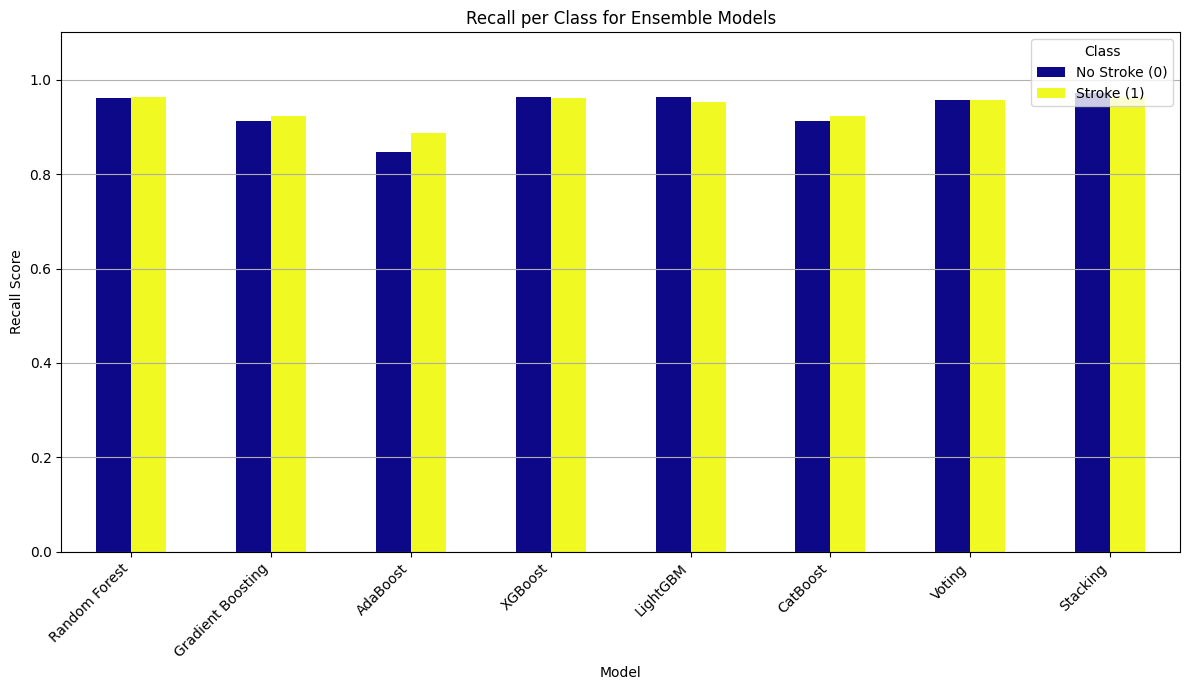


--- Plotting ROC Curves for Ensemble Models ---


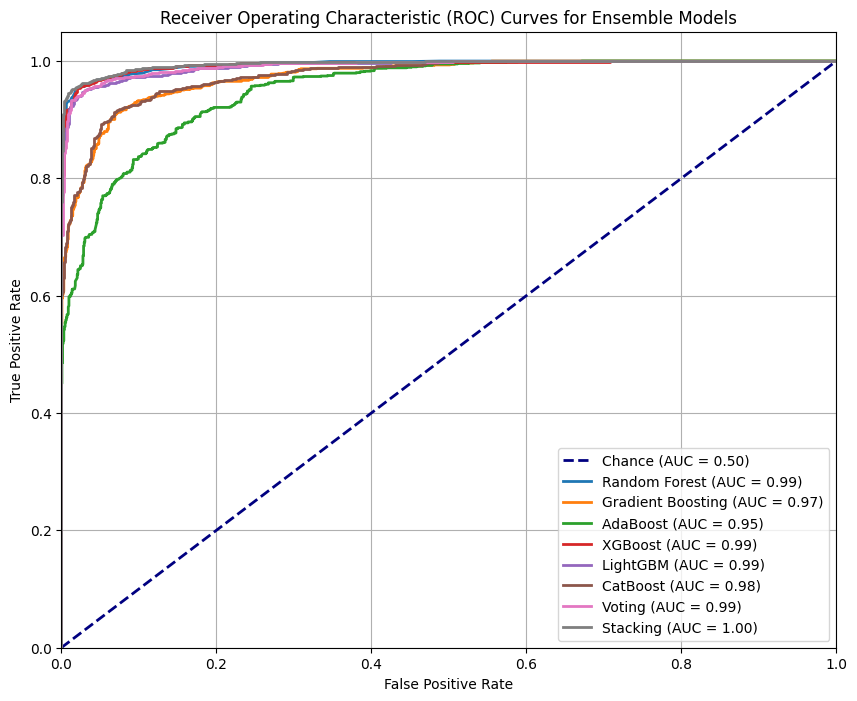


--- Plotting Precision-Recall Curves for Ensemble Models ---


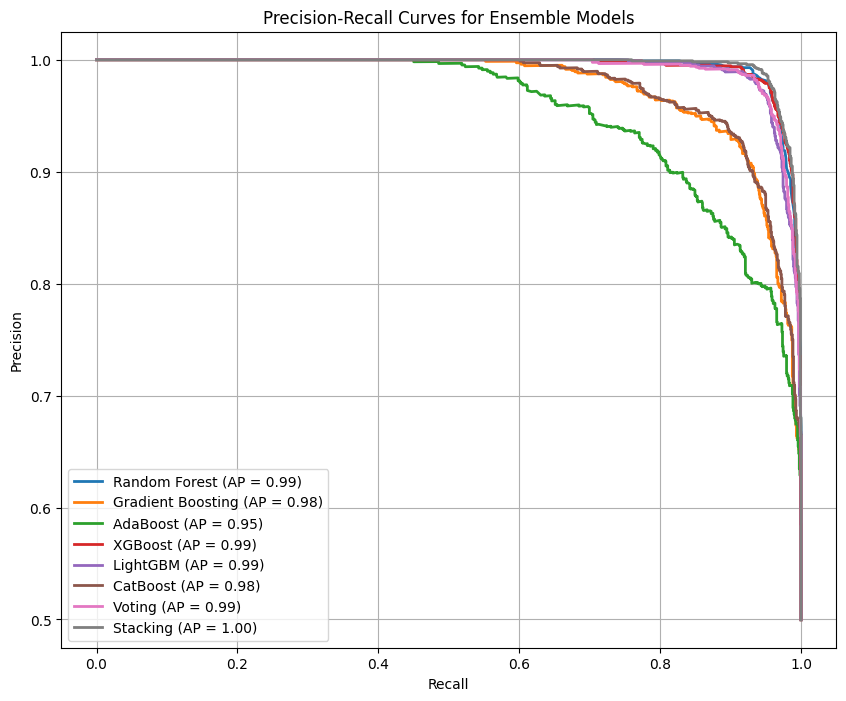


--- Performing Cross-Validation for Ensemble Models ---

Performing CV for Random Forest...

Performing CV for Gradient Boosting...

Performing CV for AdaBoost...

Performing CV for XGBoost...

Performing CV for LightGBM...

Performing CV for CatBoost...

Performing CV for Voting (Soft)...

Performing CV for Stacking (LR Final)...

--- Cross-Validation Mean Scores (with +/- 2*Std Dev) ---


accuracy               recall  \
Random Forest        0.9617 (+/- 0.0076)  0.9629 (+/- 0.0068)   
Gradient Boosting    0.9140 (+/- 0.0093)  0.9180 (+/- 0.0148)   
AdaBoost             0.8728 (+/- 0.0161)  0.8944 (+/- 0.0176)   
XGBoost              0.9595 (+/- 0.0090)  0.9627 (+/- 0.0099)   
LightGBM             0.9573 (+/- 0.0071)  0.9564 (+/- 0.0052)   
CatBoost             0.9219 (+/- 0.0083)  0.9269 (+/- 0.0129)   
Voting (Soft)        0.9582 (+/- 0.0080)  0.9578 (+/- 0.0020)   
Stacking (LR Final)  0.9645 (+/- 0.0071)  0.9625 (+/- 0.0067)   

                               precision              roc_auc  \
Random Forest        0.9606 (+/- 0.0112)  0.9936 (+/- 0.0014)   
Gradient Boosting    0.9106 (+/- 0.0102)  0.9752 (+/- 0.0050)   
AdaBoost             0.8572 (+/- 0.0173)  0.9568 (+/- 0.0065)   
XGBoost              0.9565 (+/- 0.0133)  0.9926 (+/- 0.0011)   
LightGBM             0.9582 (+/- 0.0127)  0.9922 (+/- 0.0014)   
CatBoost             0.9178 (+/- 0.0117)  0.9778 (+/- 0.0042)   
Voting (Soft)        0.9587 (+/- 0.0154)  0.9920 (+/- 0.0020)   
Stacking (LR Final)  0.9664 (+/- 0.0121)  0.9943 (+/- 0.0019)   

                                      f1  
Random Forest        0.9618 (+/- 0.0080)  
Gradient Boosting    0.9143 (+/- 0.0104)  
AdaBoost             0.8754 (+/- 0.0173)  
XGBoost              0.9596 (+/- 0.0092)  
LightGBM             0.9573 (+/- 0.0074)  
CatBoost             0.9223 (+/- 0.0086)  
Voting (Soft)        0.9582 (+/- 0.0074)  
Stacking (LR Final)  0.9644 (+/- 0.0071)


--- Plotting Mean Cross-Validation Scores ---


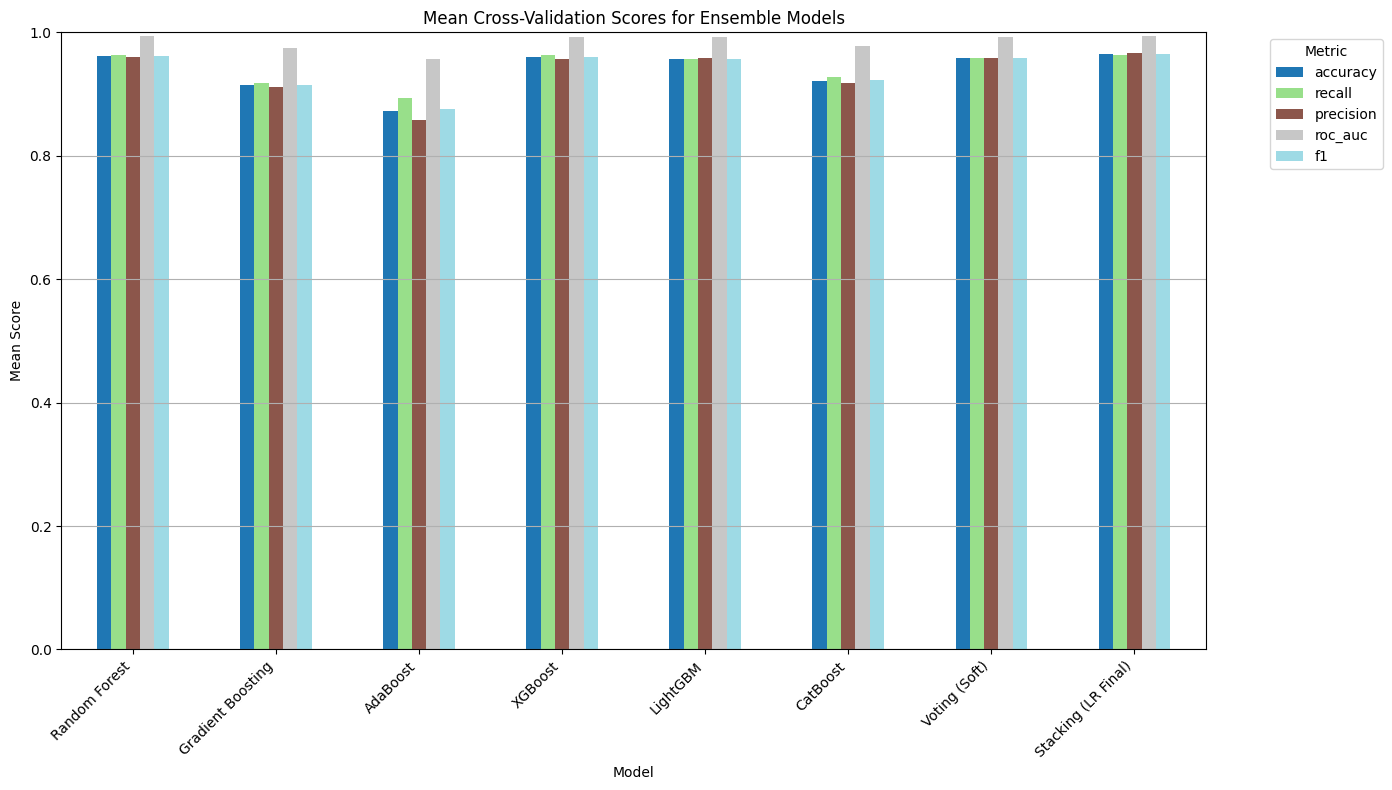


--- End of Ensemble Methods Training, Testing, and Evaluation ---


In [ ]:
# prompt: train and test the Ensemble Methods accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve, Cross validation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn xgboost lightgbm catboost

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Assume X_res and y_res are the resampled features and target variable
# from the previous cells. If not, ensure they are created and available.

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

print("\n--- Training and Evaluating Ensemble Methods ---")

# --- 1. Random Forest (already performed, but included for completeness) ---
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)
# y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# class_report_rf = classification_report(y_test, y_pred_rf)
# roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
# average_precision_rf = average_precision_score(y_test, y_proba_rf)
# print("\nRandom Forest Evaluation Done.")

# --- 2. Gradient Boosting ---
print("\n--- Training Gradient Boosting ---")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
average_precision_gb = average_precision_score(y_test, y_proba_gb)

print("\nGradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:\n", class_report_gb)


# --- 3. AdaBoost ---
print("\n--- Training AdaBoost ---")
# Use a base estimator, e.g., a Decision Tree Stump (max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
y_proba_ada = ada_model.predict_proba(X_test)[:, 1]

# Evaluate AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_proba_ada)
average_precision_ada = average_precision_score(y_test, y_proba_ada)

print("\nAdaBoost Model Evaluation:")
print(f"Accuracy: {accuracy_ada:.4f}")
print("\nClassification Report:\n", class_report_ada)


# --- 4. XGBoost (already performed, but included for completeness) ---
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)
# y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
# class_report_xgb = classification_report(y_test, y_pred_xgb)
# roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
# average_precision_xgb = average_precision_score(y_test, y_proba_xgb)
# print("\nXGBoost Evaluation Done.")


# --- 5. LightGBM ---
print("\n--- Training LightGBM ---")
# Use class_weight='balanced' or is_unbalance=True for imbalanced data
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, is_unbalance=True)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_proba_lgb)
average_precision_lgb = average_precision_score(y_test, y_proba_lgb)

print("\nLightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print("\nClassification Report:\n", class_report_lgb)


# --- 6. CatBoost ---
print("\n--- Training CatBoost ---")
# For CatBoost, pass the original categorical features if you didn't one-hot encode them,
# or let it handle the already encoded data. It can handle categorical features directly
# if specified using cat_features parameter. Since we already OHE, we can use the OHE data.
# Use auto_class_weights='Balanced' or scale_pos_weight for imbalanced data
# Ensure columns are strings if needed by CatBoost
X_train_cb = X_train.copy()
X_test_cb = X_test.copy()
X_train_cb.columns = X_train_cb.columns.astype(str)
X_test_cb.columns = X_test_cb.columns.astype(str)

cb_model = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0, auto_class_weights='Balanced')
cb_model.fit(X_train_cb, y_train)
y_pred_cb = cb_model.predict(X_test_cb)
y_proba_cb = cb_model.predict_proba(X_test_cb)[:, 1]

# Evaluate CatBoost
accuracy_cb = accuracy_score(y_test, y_pred_cb)
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
class_report_cb = classification_report(y_test, y_pred_cb)
roc_auc_cb = roc_auc_score(y_test, y_proba_cb)
average_precision_cb = average_precision_score(y_test, y_proba_cb)

print("\nCatBoost Model Evaluation:")
print(f"Accuracy: {accuracy_cb:.4f}")
print("\nClassification Report:\n", class_report_cb)


# --- 7. Voting Classifier ---
print("\n--- Training Voting Classifier ---")
# Combine some of the trained models
# Define the base estimators (ensure they have predict_proba if using 'soft' voting)
estimators = [
    ('lr', LogisticRegression(random_state=42, solver='liblinear')), # Ensure probability=True implicitly or explicitly if needed
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)),
    ('lgb', lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, is_unbalance=True)),
    # ('svm', SVC(kernel='linear', random_state=42, probability=True, class_weight='balanced')), # SVM can be slow
    # ('knn', KNeighborsClassifier(n_neighbors=5, p=2)), # KNN might not be ideal with OHE features
    # ('nb', GaussianNB()) # Naive Bayes might struggle with correlated features
]

# Initialize Voting Classifier (soft voting averages probabilities)
# For VotingClassifier, it's often better to train base estimators within the VotingClassifier pipeline
# Or ensure they are trained on the same data split.
# Here, we'll retrain them inside the VotingClassifier for simplicity with cross_val_score.
# If you have pre-trained models you want to combine, you can use them directly.
voting_model = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1) # Use soft voting if models provide probabilities

# Train the Voting model
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
y_proba_voting = voting_model.predict_proba(X_test)[:, 1]

# Evaluate Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
average_precision_voting = average_precision_score(y_test, y_proba_voting)

print("\nVoting Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_voting:.4f}")
print("\nClassification Report:\n", class_report_voting)


# --- 8. Stacking Classifier ---
print("\n--- Training Stacking Classifier ---")
# Define base estimators and a final estimator (meta-model)
level0_estimators = [
    ('lr', LogisticRegression(random_state=42, solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)),
    ('lgb', lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, is_unbalance=True)),
]

# The meta-model (final estimator) can be any classifier
# A simple Logistic Regression or a more complex model can be used
level1_final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# Initialize Stacking Classifier
# cv parameter specifies the cross-validation splitting strategy for training the meta-model
stacking_model = StackingClassifier(estimators=level0_estimators, final_estimator=level1_final_estimator, cv=5)

# Train the Stacking model
# Note: StackingClassifier trains the base estimators on folds and the final estimator on the predictions
# from the out-of-fold data of the base estimators.
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
y_proba_stacking = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
class_report_stacking = classification_report(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_proba_stacking)
average_precision_stacking = average_precision_score(y_test, y_proba_stacking)

print("\nStacking Classifier Model Evaluation:")
print(f"Accuracy: {accuracy_stacking:.4f}")
print("\nClassification Report:\n", class_report_stacking)


# --- Plotting Evaluation Metrics for all Ensemble Models ---

ensemble_models = {
    'Random Forest': {'y_pred': y_pred_rf, 'y_proba': y_proba_rf, 'cm': conf_matrix_rf}, # Already available
    'Gradient Boosting': {'y_pred': y_pred_gb, 'y_proba': y_proba_gb, 'cm': conf_matrix_gb},
    'AdaBoost': {'y_pred': y_pred_ada, 'y_proba': y_proba_ada, 'cm': conf_matrix_ada},
    'XGBoost': {'y_pred': y_pred_xgb, 'y_proba': y_proba_xgb, 'cm': conf_matrix_xgb}, # Already available
    'LightGBM': {'y_pred': y_pred_lgb, 'y_proba': y_proba_lgb, 'cm': conf_matrix_lgb},
    'CatBoost': {'y_pred': y_pred_cb, 'y_proba': y_proba_cb, 'cm': conf_matrix_cb},
    'Voting': {'y_pred': y_pred_voting, 'y_proba': y_proba_voting, 'cm': conf_matrix_voting},
    'Stacking': {'y_pred': y_pred_stacking, 'y_proba': y_proba_stacking, 'cm': conf_matrix_stacking},
}

# --- Plot Confusion Matrices ---
print("\n--- Plotting Confusion Matrices for Ensemble Models ---")
fig, axes = plt.subplots(3, 3, figsize=(18, 18)) # Adjust layout based on number of models
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, (name, metrics) in enumerate(ensemble_models.items()):
    cm = metrics['cm']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke (0)', 'Stroke (1)'])
    disp.plot(cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Plot Precision and Recall per Class (Bar Charts) ---
print("\n--- Plotting Precision and Recall per Class for Ensemble Models ---")
precision_scores = {}
recall_scores = {}

for name, metrics in ensemble_models.items():
    report_dict = classification_report(y_test, metrics['y_pred'], output_dict=True)
    precision_scores[name] = {'No Stroke (0)': report_dict['0']['precision'], 'Stroke (1)': report_dict['1']['precision']}
    recall_scores[name] = {'No Stroke (0)': report_dict['0']['recall'], 'Stroke (1)': report_dict['1']['recall']}

precision_df = pd.DataFrame(precision_scores).T
recall_df = pd.DataFrame(recall_scores).T

# Plot Precision
ax1 = precision_df.plot(kind='bar', figsize=(12, 7), cmap='viridis')
plt.title('Precision per Class for Ensemble Models')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(title='Class')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Recall
ax2 = recall_df.plot(kind='bar', figsize=(12, 7), cmap='plasma')
plt.title('Recall per Class for Ensemble Models')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.legend(title='Class')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot ROC Curves ---
print("\n--- Plotting ROC Curves for Ensemble Models ---")
plt.figure(figsize=(10, 8))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')

# Plot ROC curve for each model
for name, metrics in ensemble_models.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_proba'])
    roc_auc = roc_auc_score(y_test, metrics['y_proba'])
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Ensemble Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Plot Precision-Recall Curves ---
print("\n--- Plotting Precision-Recall Curves for Ensemble Models ---")
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curve for each model
for name, metrics in ensemble_models.items():
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_proba'])
    average_precision = average_precision_score(y_test, metrics['y_proba'])
    plt.plot(recall, precision, lw=2, label=f'{name} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Ensemble Models')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


# --- Perform Cross-Validation for all Ensemble Models ---
print("\n--- Performing Cross-Validation for Ensemble Models ---")

# Define the scoring metrics
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results_ensemble = {}

# Dictionary of models to cross-validate (re-initialize them for clean CV runs)
cv_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=100, learning_rate=1.0, random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, is_unbalance=True),
    'CatBoost': cb.CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0, auto_class_weights='Balanced'),
    'Voting (Soft)': VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1), # Re-use 'estimators' list from above
    'Stacking (LR Final)': StackingClassifier(estimators=level0_estimators, final_estimator=level1_final_estimator, cv=5), # Re-use 'level0_estimators' and 'level1_final_estimator'
}

# Note for CatBoost CV: Cross-validation with CatBoostClassifier from scikit-learn wrapper
# requires string column names if original categorical features were used.
# Since we are using the OHE X_res, this should be okay.
# If errors occur, consider using CatBoost's internal cv function.
# For now, assume the scikit-learn wrapper works with X_res.

for name, model in cv_models.items():
    print(f"\nPerforming CV for {name}...")
    cv_scores = {}
    X_cv = X_res.copy() # Use the resampled data for CV
    y_cv = y_res.copy()

    # Special handling for CatBoost column names if needed
    if isinstance(model, cb.CatBoostClassifier) or isinstance(model, StackingClassifier) or isinstance(model, VotingClassifier): # Check models that might use CatBoost
         # Check if CatBoost is part of the ensemble (Voting or Stacking) and adjust columns
         # A robust check would iterate through estimators if Voting/Stacking
         # For simplicity here, we assume if CatBoost is in the dict, columns need adjusting for it
         # This might need refinement if other models are sensitive to column types.
         # For now, let's apply string conversion universally for consistency if needed by any model in the dict.
         X_cv.columns = X_cv.columns.astype(str)
         # If model is Voting or Stacking and contains CatBoost, need to check its estimators...
         # Simpler approach: just pass the data with string columns to cross_val_score.
         pass


    for scoring in scoring_metrics:
        try:
            scores = cross_val_score(model, X_cv, y_cv, cv=kf, scoring=scoring, n_jobs=-1) # Use n_jobs=-1 for parallel processing
            cv_scores[scoring] = scores
        except Exception as e:
            print(f"Error during CV for {name} with scoring '{scoring}': {e}")
            cv_scores[scoring] = np.nan * np.ones(n_splits) # Fill with NaN if error

    cv_results_ensemble[name] = cv_scores


# Summarize CV Results
print("\n--- Cross-Validation Mean Scores (with +/- 2*Std Dev) ---")
cv_summary = {}
for name, scores_dict in cv_results_ensemble.items():
    cv_summary[name] = {scoring: f"{scores.mean():.4f} (+/- {scores.std() * 2:.4f})"
                        for scoring, scores in scores_dict.items()}

cv_summary_df = pd.DataFrame(cv_summary).T
display(cv_summary_df)

# Visualize CV Mean Scores
print("\n--- Plotting Mean Cross-Validation Scores ---")
# Prepare data for plotting - extract mean scores
cv_mean_scores_df = pd.DataFrame({name: {scoring: scores.mean() for scoring, scores in scores_dict.items()}
                                for name, scores_dict in cv_results_ensemble.items()}).T

cv_mean_scores_df.plot(kind='bar', figsize=(14, 8), cmap='tab20')
plt.title('Mean Cross-Validation Scores for Ensemble Models')
plt.xlabel('Model')
plt.ylabel('Mean Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # Scores are typically between 0 and 1
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\n--- End of Ensemble Methods Training, Testing, and Evaluation ---")



--- Training Multilayer Perceptron (MLP) ---
MLP Training Complete.

Multilayer Perceptron (MLP) Model Evaluation:
Accuracy: 0.8824

Confusion Matrix:
[[1075  141]
 [ 145 1070]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1216
           1       0.88      0.88      0.88      1215

    accuracy                           0.88      2431
   macro avg       0.88      0.88      0.88      2431
weighted avg       0.88      0.88      0.88      2431



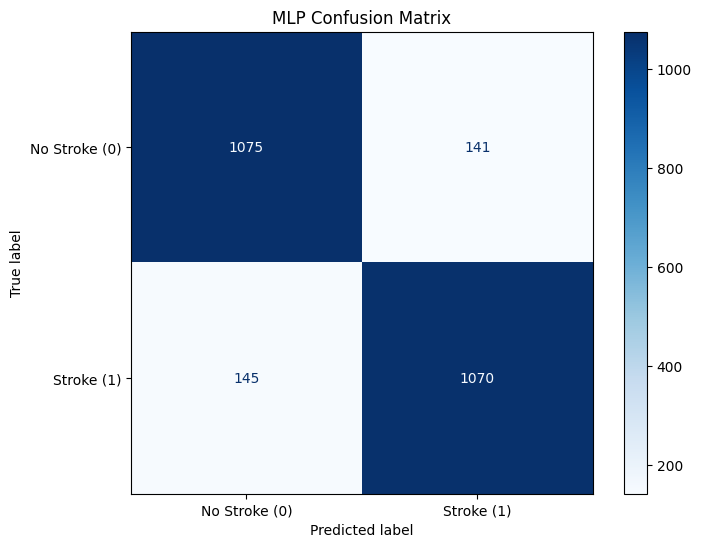

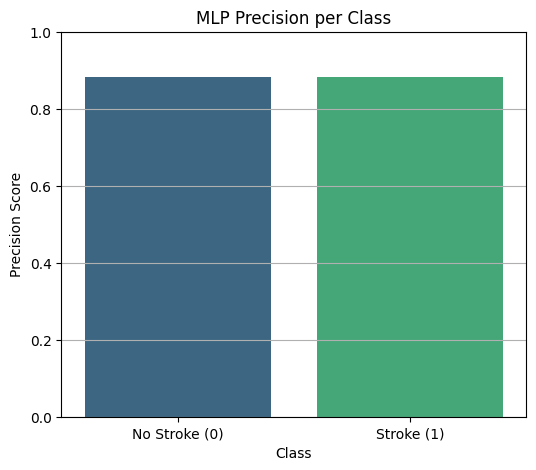

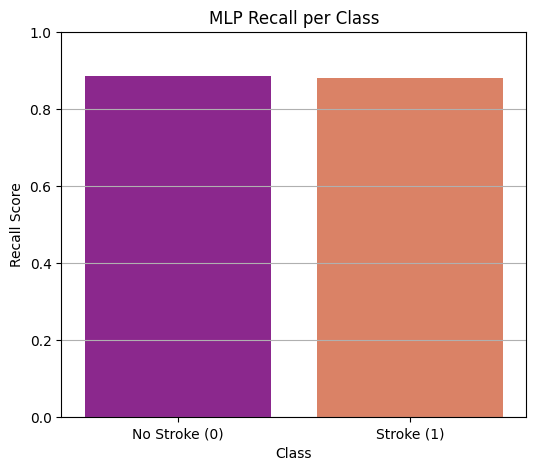

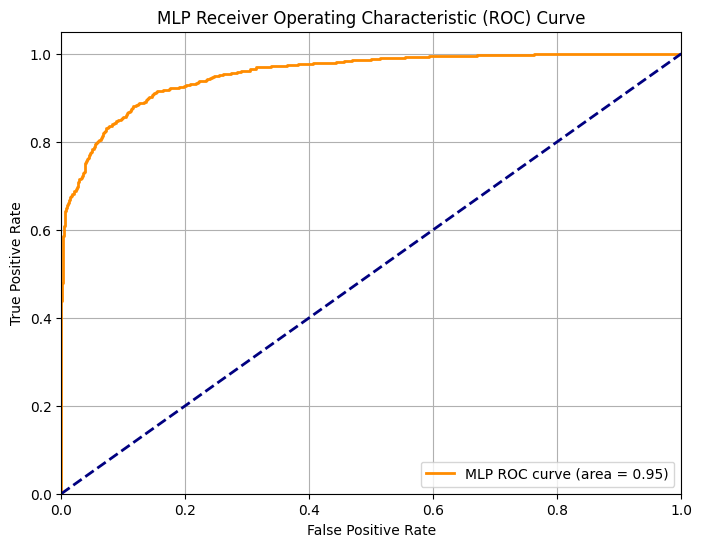


MLP ROC AUC Score: 0.9541


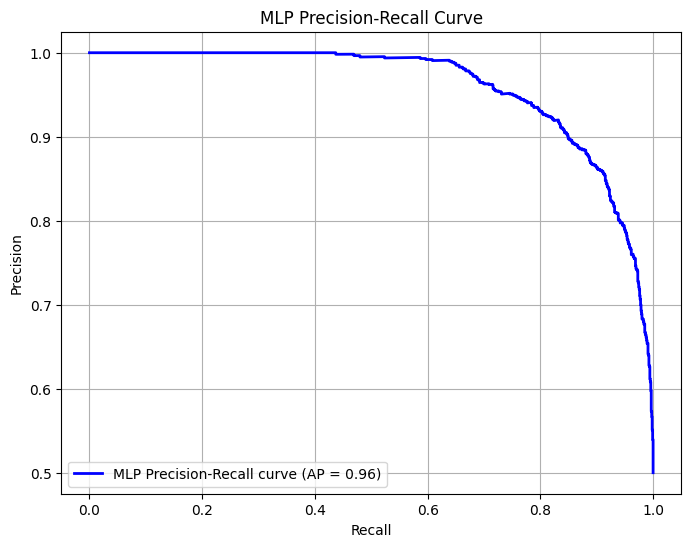

MLP Average Precision (AP) Score: 0.9592

Performing 5-Fold Cross-Validation for MLP:
MLP Accuracy CV Scores: [0.88534704 0.86118252 0.88631687 0.88117284 0.85185185]
Mean MLP Accuracy CV Score: 0.8732 (+/- 0.0280)
MLP Recall CV Scores: [0.89896907 0.87062566 0.85947047 0.90419162 0.84543568]
Mean MLP Recall CV Score: 0.8757 (+/- 0.0452)
MLP Precision CV Scores: [0.87462387 0.84726522 0.91046386 0.870317   0.85429769]
Mean MLP Precision CV Score: 0.8714 (+/- 0.0439)
MLP Roc_auc CV Scores: [0.95612477 0.93797453 0.96155646 0.95060622 0.94283597]
Mean MLP Roc_auc CV Score: 0.9498 (+/- 0.0171)
MLP F1 CV Scores: [0.88662938 0.85878661 0.88423258 0.88693098 0.84984359]
Mean MLP F1 CV Score: 0.8733 (+/- 0.0315)


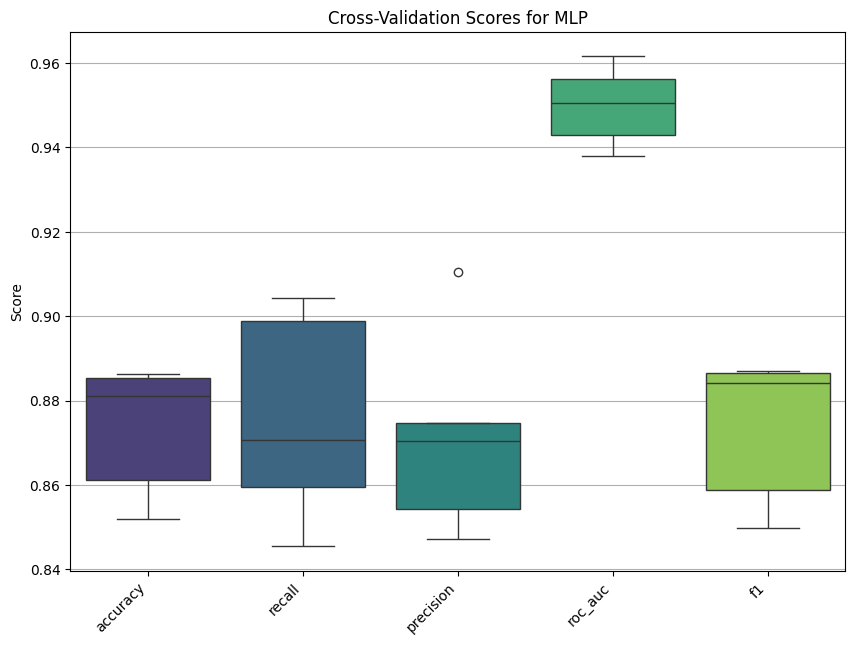


End of Multilayer Perceptron (MLP) Training, Testing, and Evaluation.


In [ ]:
# prompt: train and test the Multilayer Perceptron (MLP)  accuracy  and plot Confusion matrix, plot precision matrix, and plot recall matrix, plot ROC curve

import pandas as pd
import matplotlib.pyplot as plt
!pip install tensorflow

from sklearn.neural_network import MLPClassifier

# Use the resampled data X_res and y_res for training and testing
# Assuming X_res and y_res are already defined and processed from the previous cells
# If not, you need to define them first, e.g., by loading data and applying SMOTE.
# Example (if X_res, y_res are not already in the environment):
# X = df.drop('stroke', axis=1)
# y = df['stroke']
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

# Initialize and train the Multilayer Perceptron (MLP) model
# You can adjust hyperparameters like hidden_layer_sizes, activation, solver, alpha, learning_rate
# Use early_stopping=True and validation_fraction for better generalization
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                          learning_rate='constant', max_iter=300, random_state=42, early_stopping=True,
                          validation_fraction=0.1)

# Train the model
# Since MLP is sensitive to scaling, ensure your features are scaled before this step.
# If you haven't scaled X_res and X_test yet, add a StandardScaler step before training.
# For now, assuming X_res and X_test are ready for MLP (e.g., scaled).

print("\n--- Training Multilayer Perceptron (MLP) ---")
mlp_model.fit(X_train, y_train)
print("MLP Training Complete.")


# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class (stroke=1)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

print("\nMultilayer Perceptron (MLP) Model Evaluation:")
print(f"Accuracy: {accuracy_mlp:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_mlp)
print("\nClassification Report:")
print(class_report_mlp)

# Plot Confusion Matrix
disp_conf_mlp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp, display_labels=['No Stroke (0)', 'Stroke (1)'])
fig_conf_mlp, ax_conf_mlp = plt.subplots(figsize=(8, 6))
disp_conf_mlp.plot(cmap='Blues', ax=ax_conf_mlp)
plt.title('MLP Confusion Matrix')
plt.show()

# Plot Precision Matrix (Visualizing per-class precision)
# Derived from classification report
report_dict_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)
precision_no_stroke_mlp = report_dict_mlp['0']['precision']
precision_stroke_mlp = report_dict_mlp['1']['precision']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[precision_no_stroke_mlp, precision_stroke_mlp], palette='viridis')
plt.ylim(0, 1.0)
plt.title('MLP Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.grid(axis='y')
plt.show()

# Plot Recall Matrix (Visualizing per-class recall)
# Derived from classification report
recall_no_stroke_mlp = report_dict_mlp['0']['recall']
recall_stroke_mlp = report_dict_mlp['1']['recall']

plt.figure(figsize=(6, 5))
sns.barplot(x=['No Stroke (0)', 'Stroke (1)'], y=[recall_no_stroke_mlp, recall_stroke_mlp], palette='plasma')
plt.ylim(0, 1.0)
plt.title('MLP Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nMLP ROC AUC Score: {roc_auc_mlp:.4f}")

# Plot Precision-Recall Curve
# Useful for imbalanced datasets
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_proba_mlp)
average_precision_mlp = average_precision_score(y_test, y_proba_mlp)

plt.figure(figsize=(8, 6))
plt.plot(recall_mlp, precision_mlp, color='blue', lw=2, label=f'MLP Precision-Recall curve (AP = {average_precision_mlp:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MLP Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"MLP Average Precision (AP) Score: {average_precision_mlp:.4f}")


# Cross-Validation
# Using KFold cross-validation on the resampled data X_res and y_res
# You can choose the number of splits (n_splits)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
# You can evaluate different scoring metrics like 'accuracy', 'recall', 'precision', 'roc_auc', 'f1'
scoring_metrics = ['accuracy', 'recall', 'precision', 'roc_auc', 'f1']
cv_results_mlp = {}

print(f"\nPerforming {n_splits}-Fold Cross-Validation for MLP:")

for scoring in scoring_metrics:
    # Note: cross_val_score fits a *new* model on each fold.
    # This is the standard way to get robust CV scores.
    # MLP training can be time-consuming depending on data size and max_iter.
    scores_mlp = cross_val_score(mlp_model, X_res, y_res, cv=kf, scoring=scoring, n_jobs=-1) # Use n_jobs=-1 for parallel processing
    cv_results_mlp[scoring] = scores_mlp
    print(f"MLP {scoring.capitalize()} CV Scores: {scores_mlp}")
    print(f"Mean MLP {scoring.capitalize()} CV Score: {scores_mlp.mean():.4f} (+/- {scores_mlp.std() * 2:.4f})") # Report mean and 95% confidence interval (approx)


# Optional: Visualize MLP Cross-Validation Scores
plt.figure(figsize=(10, 7))
cv_results_df_mlp = pd.DataFrame(cv_results_mlp)
sns.boxplot(data=cv_results_df_mlp, palette='viridis')
plt.title('Cross-Validation Scores for MLP')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

print("\nEnd of Multilayer Perceptron (MLP) Training, Testing, and Evaluation.")



--- Training and Evaluating TensorFlow Neural Network ---
Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5474 - loss: 1.8104 - val_accuracy: 0.6991 - val_loss: 0.5844
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6481 - loss: 0.6715 - val_accuracy: 0.5853 - val_loss: 0.5958
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6703 - loss: 0.6069 - val_accuracy: 0.7210 - val_loss: 0.5706
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7033 - loss: 0.5786 - val_accuracy: 0.7128 - val_loss: 0.5658
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7180 - loss: 0.5493 - val_accuracy: 0.5627 - val_loss: 0.5738
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7170 - loss: 0.5536 - val_accuracy: 0.7300 - val_loss: 0.5453
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7443 - loss: 0.5278 - val_accuracy: 0.6984 - val_loss: 0.5662
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━

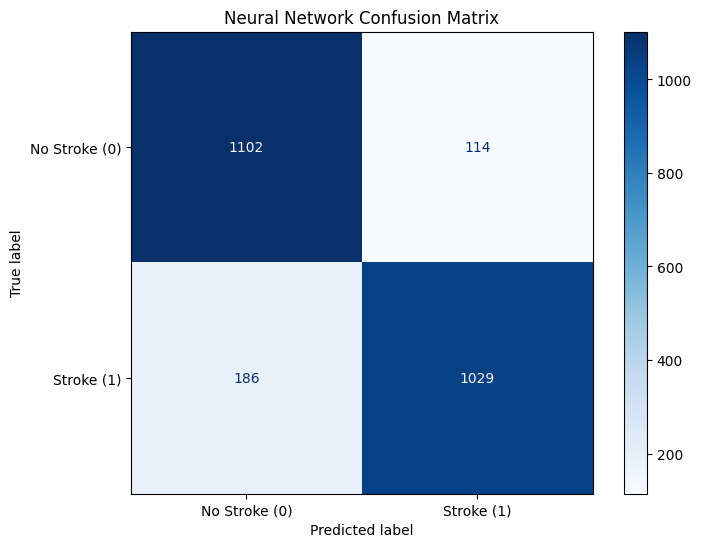

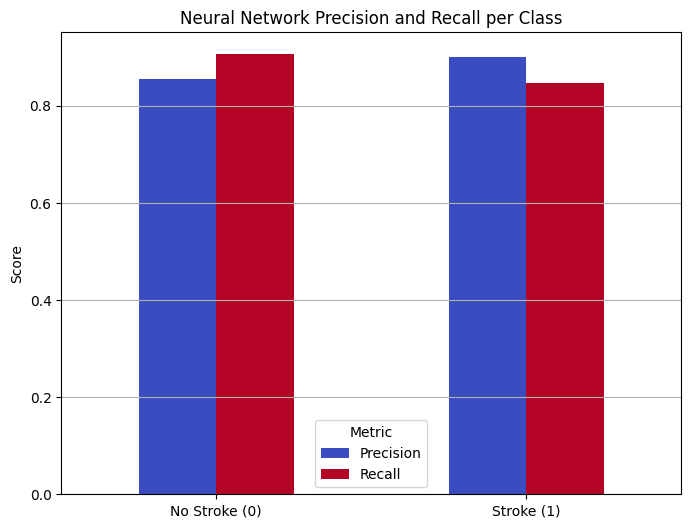

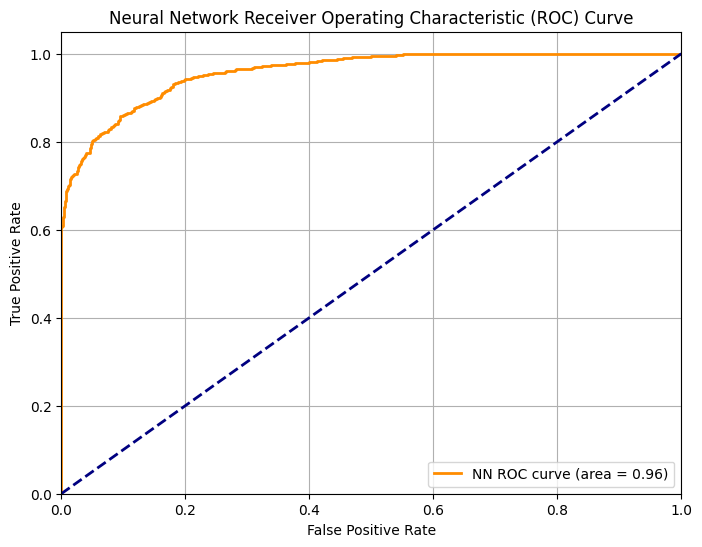


Neural Network ROC AUC Score: 0.9590


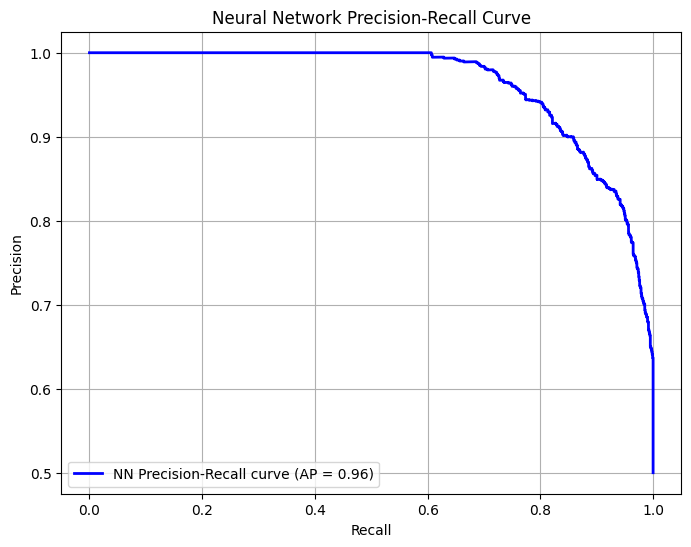

Neural Network Average Precision (AP) Score: 0.9634


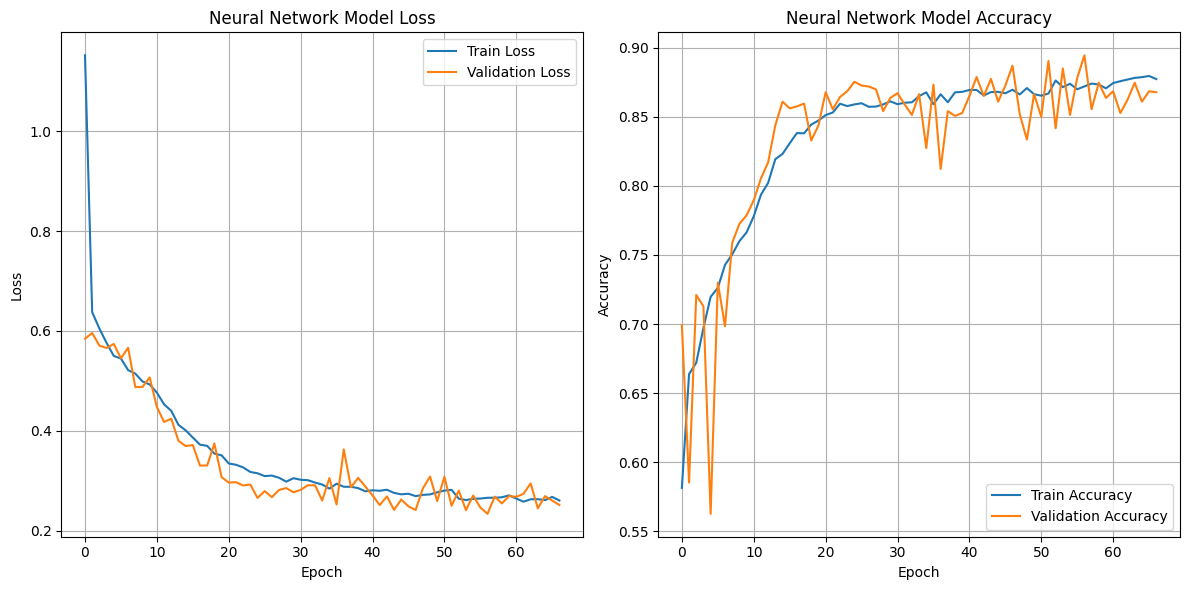


Cross-Validation for Neural Network is typically done manually or using Keras' built-in validation.
The training history plot and early stopping provide insights into generalization.

--- End of TensorFlow Neural Network Training, Testing, and Evaluation ---


In [ ]:
# prompt: Neural Networks

import pandas as pd
import matplotlib.pyplot as plt
# Assume X_res and y_res are the resampled features and target variable
# from the previous cells. If not, ensure they are created and available.

# Split the resampled data into training and testing sets
# Stratify to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

print("\n--- Training and Evaluating TensorFlow Neural Network ---")

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the Neural Network model using Keras Functional API or Sequential API
# Using Sequential API for simplicity
nn_model = Sequential()

# Add layers
# The number of input features should match the number of columns in X_train
nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dropout(0.3)) # Optional: Add dropout for regularization
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3)) # Optional: Add dropout for regularization
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
# Use binary_crossentropy for binary classification
# Use Adam optimizer with a learning rate
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up Early Stopping
# Stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
# Use validation_split to monitor performance on a portion of the training data
# Adjust epochs and batch_size as needed
history = nn_model.fit(X_train, y_train,
                       epochs=100,       # Increase epochs, early stopping will prevent overfitting
                       batch_size=32,
                       validation_split=0.2, # Use 20% of training data for validation
                       callbacks=[early_stopping],
                       verbose=1)

print("Neural Network Training Complete.")

# Evaluate the model on the test set
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nNeural Network Test Loss: {loss:.4f}")
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

# Make predictions (probabilities and class predictions) on the test set
y_proba_nn = nn_model.predict(X_test).flatten() # Get probabilities for the positive class
y_pred_nn = (y_proba_nn > 0.5).astype(int)     # Convert probabilities to class labels (0 or 1)

# Compute and print classification report and confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print("\nNeural Network Model Evaluation:")
print("\nConfusion Matrix:")
print(conf_matrix_nn)
print("\nClassification Report:")
print(class_report_nn)

# Plot Confusion Matrix
disp_conf_nn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=['No Stroke (0)', 'Stroke (1)'])
fig_conf_nn, ax_conf_nn = plt.subplots(figsize=(8, 6))
disp_conf_nn.plot(cmap='Blues', ax=ax_conf_nn)
plt.title('Neural Network Confusion Matrix')
plt.show()

# Plot Precision and Recall per Class (Bar Charts)
report_dict_nn = classification_report(y_test, y_pred_nn, output_dict=True)
precision_no_stroke_nn = report_dict_nn['0']['precision']
precision_stroke_nn = report_dict_nn['1']['precision']
recall_no_stroke_nn = report_dict_nn['0']['recall']
recall_stroke_nn = report_dict_nn['1']['recall']

metrics_nn_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'No Stroke (0)': [precision_no_stroke_nn, recall_no_stroke_nn],
    'Stroke (1)': [precision_stroke_nn, recall_stroke_nn]
}).set_index('Metric').T

metrics_nn_df.plot(kind='bar', figsize=(8, 6), cmap='coolwarm')
plt.title('Neural Network Precision and Recall per Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# Plot ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_proba_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'NN ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nNeural Network ROC AUC Score: {roc_auc_nn:.4f}")

# Plot Precision-Recall Curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_proba_nn)
average_precision_nn = average_precision_score(y_test, y_proba_nn)

plt.figure(figsize=(8, 6))
plt.plot(recall_nn, precision_nn, color='blue', lw=2, label=f'NN Precision-Recall curve (AP = {average_precision_nn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Neural Network Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Neural Network Average Precision (AP) Score: {average_precision_nn:.4f}")


# Optional: Plot Training History (Loss and Accuracy)
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Note on Cross-Validation for Keras models:
# Using cross_val_score directly with Keras models is possible but requires a scikit-learn wrapper.
# A common approach is to manually implement K-Fold cross-validation loops
# or use the Keras integrated `model.fit(..., validation_split=...)` or `model.fit(..., validation_data=...)`
# combined with techniques like Early Stopping, which we've done here.
# For a full K-Fold CV, you would loop through splits, compile and train a new model for each fold.

print("\nCross-Validation for Neural Network is typically done manually or using Keras' built-in validation.")
print("The training history plot and early stopping provide insights into generalization.")


print("\n--- End of TensorFlow Neural Network Training, Testing, and Evaluation ---")



--- Applying SHAP for XGBoost ---
Calculating SHAP values...
SHAP values calculated.

Generating SHAP Summary Plot...


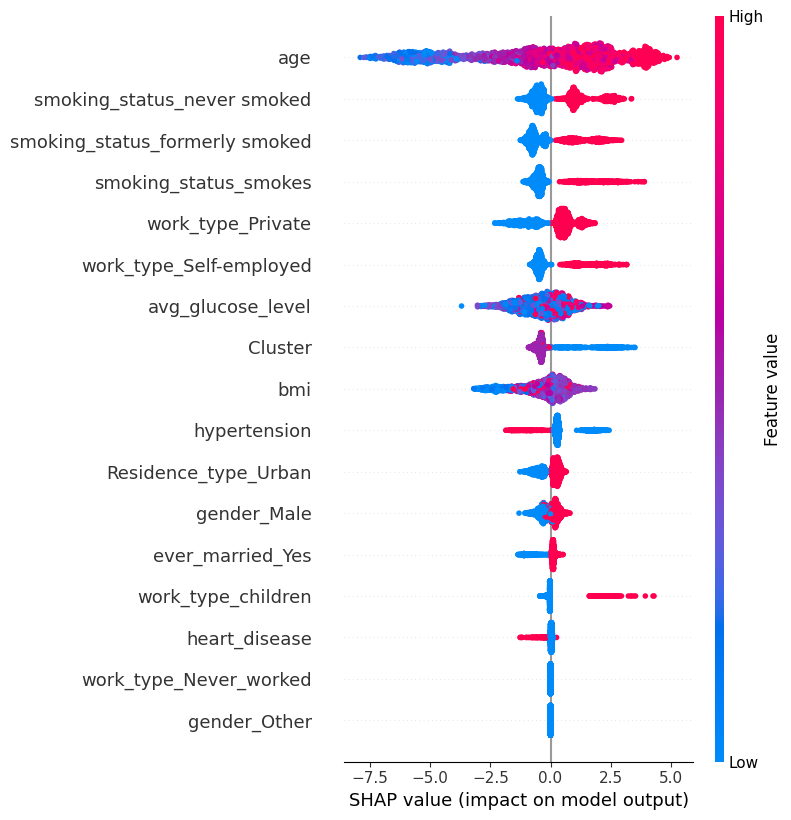

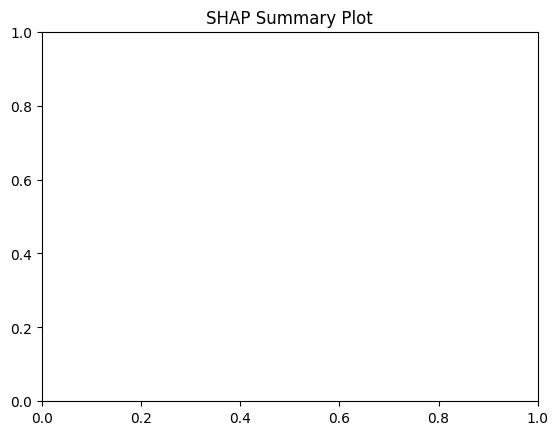


Interpretation Hint (SHAP Summary Plot):
- Features are ordered by global importance (mean absolute SHAP value).
- Each point on the plot represents a single instance (a row in X_test).
- The position on the x-axis indicates the SHAP value for that feature and instance.
- The color indicates the feature value (red=high, blue=low).
- Points to the right of 0 increase the model output (probability of stroke).
- Points to the left of 0 decrease the model output.

Generating SHAP Bar Plot (Mean Absolute SHAP Value)...


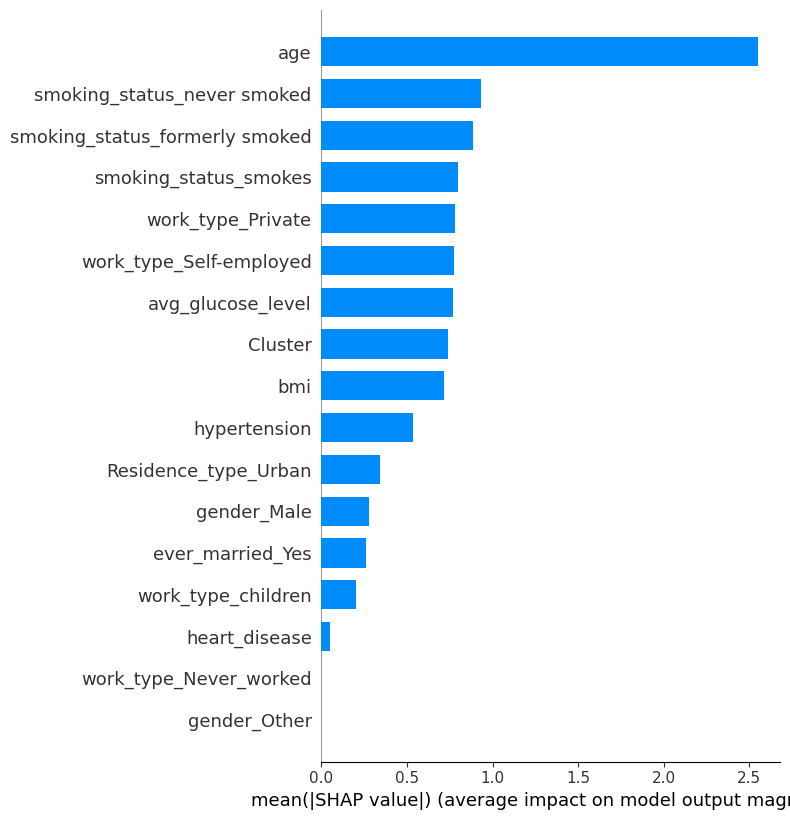

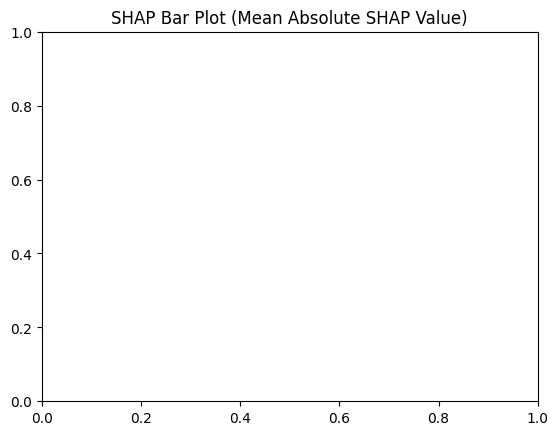


Interpretation Hint (SHAP Bar Plot):
- Shows the average absolute SHAP value for each feature.
- Higher mean absolute SHAP value indicates higher feature importance.
- This plot is simpler than the dot plot but loses information about the direction and spread of impact.

Generating SHAP Dependence Plot for 'age'...


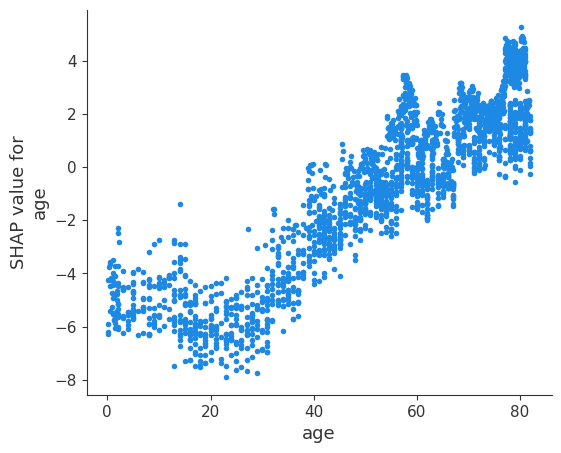

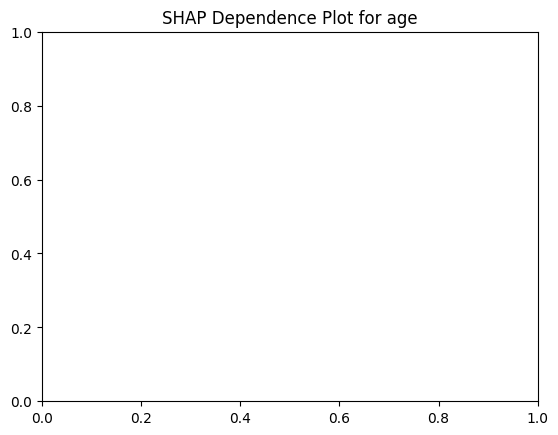


Interpretation Hint (SHAP Dependence Plot):
- Each point is an instance from the dataset.
- The x-axis is the value of the selected feature for that instance.
- The y-axis is the SHAP value of the selected feature for that instance.
- This shows how the feature's value influences its SHAP value (and thus the model output).
- Color often indicates the value of another feature (or an interaction effect), showing potential interactions.

Generating SHAP Force Plot for Instance 0...



SHAP Force Plot for instance index 0:


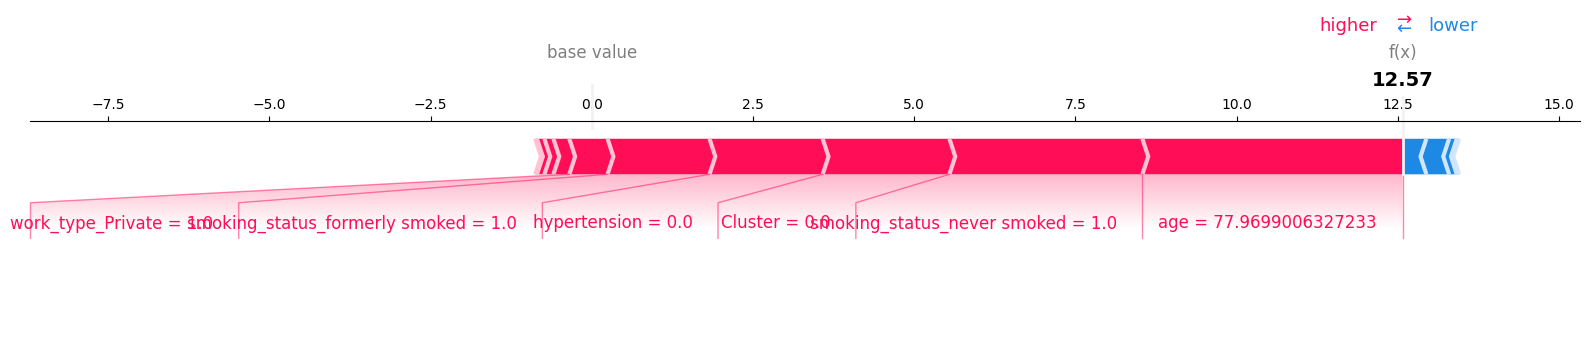


Interpretation Hint (SHAP Force Plot):
- The base value (E[f(X)]) is the average prediction when you don't know any features.
- Features pushing the prediction higher (positive SHAP values) are shown in red.
- Features pushing the prediction lower (negative SHAP values) are shown in blue.
- The magnitude of the bar indicates the magnitude of the feature's impact on the prediction.
- The plot shows how the sum of SHAP values + base value equals the model's final prediction for this instance.

Generating SHAP Decision Plot for Instance 0...


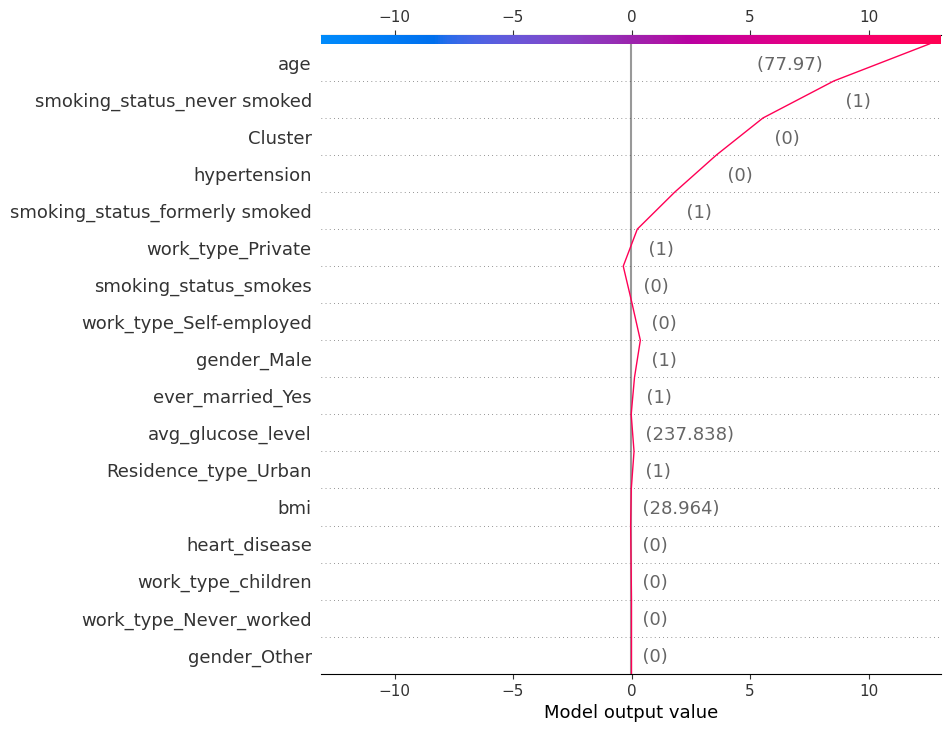

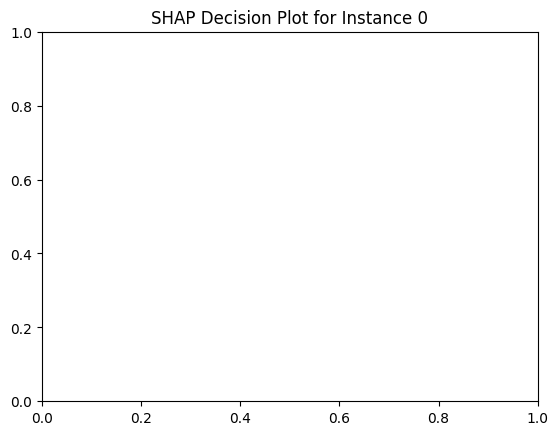


Interpretation Hint (SHAP Decision Plot):
- Starts from the base value on the left.
- Each line represents an instance.
- The horizontal axis represents the prediction value (model output).
- Each vertical segment shows how adding a feature's SHAP value changes the prediction from the previous step.
- Features are ordered by their contribution magnitude (largest changes first or based on a clustering algorithm).
- The final point on the right of each line is the model's prediction for that instance.

--- SHAP Application for XGBoost Complete ---


In [ ]:
# prompt: SHAP technique XGBoost

import matplotlib.pyplot as plt
!pip install shap

import shap

# Assume xgb_model is the trained XGBoost model from the previous cell
# Assume X_test and y_test are the test data from the previous cell

print("\n--- Applying SHAP for XGBoost ---")

# Initialize the SHAP explainer
# For tree-based models, shap.TreeExplainer is recommended
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the test set
# This can be computationally intensive depending on the size of X_test
print("Calculating SHAP values...")
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated.")

# --- SHAP Summary Plots ---

# 1. Summary Plot (Global Feature Importance and Direction of Impact)
print("\nGenerating SHAP Summary Plot...")
shap.summary_plot(shap_values, X_test, plot_type="dot", feature_names=X_test.columns)
# Use plot_type="violin" for a slightly different visualization if preferred
# shap.summary_plot(shap_values, X_test, plot_type="violin", feature_names=X_test.columns)
plt.title("SHAP Summary Plot")
plt.show()

print("\nInterpretation Hint (SHAP Summary Plot):")
print("- Features are ordered by global importance (mean absolute SHAP value).")
print("- Each point on the plot represents a single instance (a row in X_test).")
print("- The position on the x-axis indicates the SHAP value for that feature and instance.")
print("- The color indicates the feature value (red=high, blue=low).")
print("- Points to the right of 0 increase the model output (probability of stroke).")
print("- Points to the left of 0 decrease the model output.")


# 2. Bar Plot (Global Feature Importance based on Mean Absolute SHAP Value)
print("\nGenerating SHAP Bar Plot (Mean Absolute SHAP Value)...")
# shap_values can be a list for multi-output models, take the SHAP values for the positive class (stroke=1)
# For binary classification, TreeExplainer often returns a list [shap_values_class_0, shap_values_class_1]
# We want the values for the positive class (index 1)
if isinstance(shap_values, list):
    shap_values_positive_class = shap_values[1]
else:
    # If it's not a list, it's likely already the values for the positive class
    shap_values_positive_class = shap_values

shap.summary_plot(shap_values_positive_class, X_test, plot_type="bar", feature_names=X_test.columns)
plt.title("SHAP Bar Plot (Mean Absolute SHAP Value)")
plt.show()

print("\nInterpretation Hint (SHAP Bar Plot):")
print("- Shows the average absolute SHAP value for each feature.")
print("- Higher mean absolute SHAP value indicates higher feature importance.")
print("- This plot is simpler than the dot plot but loses information about the direction and spread of impact.")


# --- SHAP Dependence Plots ---

# Choose a feature to plot dependence (e.g., 'age', 'avg_glucose_level', 'bmi')
# Replace with the actual feature names from your X_test columns
feature_to_plot = 'age' # Example feature

if feature_to_plot in X_test.columns:
    print(f"\nGenerating SHAP Dependence Plot for '{feature_to_plot}'...")
    shap.dependence_plot(feature_to_plot, shap_values_positive_class, X_test, feature_names=X_test.columns, interaction_index=None) # interaction_index=None for no explicit interaction
    plt.title(f"SHAP Dependence Plot for {feature_to_plot}")
    plt.show()

    # Optional: Plot with an interaction term (SHAP automatically suggests one or you can specify)
    # auto_interaction_feature = explainer.shap_interaction_values(X_test[:1]).mean(0).argmax() # Find feature with max interaction effect (approx)
    # interaction_feature_name = X_test.columns[auto_interaction_feature]
    # print(f"Generating SHAP Dependence Plot for '{feature_to_plot}' with auto-detected interaction '{interaction_feature_name}'...")
    # shap.dependence_plot(feature_to_plot, shap_values_positive_class, X_test, feature_names=X_test.columns, interaction_index=interaction_feature_name)
    # plt.title(f"SHAP Dependence Plot for {feature_to_plot} (Interaction with {interaction_feature_name})")
    # plt.show()


else:
    print(f"\nFeature '{feature_to_plot}' not found in X_test columns.")
    print("Please choose a feature from:", X_test.columns.tolist())


print("\nInterpretation Hint (SHAP Dependence Plot):")
print("- Each point is an instance from the dataset.")
print("- The x-axis is the value of the selected feature for that instance.")
print("- The y-axis is the SHAP value of the selected feature for that instance.")
print("- This shows how the feature's value influences its SHAP value (and thus the model output).")
print("- Color often indicates the value of another feature (or an interaction effect), showing potential interactions.")


# --- SHAP Force Plot (Individual Instance Explanation) ---

# Choose a specific instance (row index) from the test set to explain
# You can pick instances where the prediction was interesting (e.g., false positive, false negative)
instance_index_to_explain = 0 # Example: Explain the first instance in X_test

print(f"\nGenerating SHAP Force Plot for Instance {instance_index_to_explain}...")
# Need to pass explainer.expected_value for force plots
# expected_value is the base value (average model output over the training data)
expected_value = explainer.expected_value

# For binary classification, if TreeExplainer gives two expected values, use the one for the positive class
if isinstance(expected_value, list):
    expected_value_positive_class = expected_value[1]
else:
     expected_value_positive_class = expected_value # Assume it's the value for the positive class

# If shap_values is a list (binary output), select the values for the positive class (index 1)
if isinstance(shap_values, list):
    instance_shap_values = shap_values[1][instance_index_to_explain]
else:
    instance_shap_values = shap_values[instance_index_to_explain]

# If X_test is a pandas DataFrame, select the instance row
instance_features = X_test.iloc[instance_index_to_explain]


# Render the force plot
# Force plots need to be rendered in JavaScript environments like notebooks or HTML
shap.initjs() # Initialize JavaScript visualization

# The force plot shows the baseline (expected value) and how each feature's SHAP value
# pushes the prediction from the baseline towards the final predicted value for this instance.
# Red bars push the prediction higher, blue bars push it lower.
print(f"\nSHAP Force Plot for instance index {instance_index_to_explain}:")
shap.force_plot(expected_value_positive_class, instance_shap_values, instance_features, matplotlib=True) # Set matplotlib=True for static plot in Colab


print("\nInterpretation Hint (SHAP Force Plot):")
print("- The base value (E[f(X)]) is the average prediction when you don't know any features.")
print("- Features pushing the prediction higher (positive SHAP values) are shown in red.")
print("- Features pushing the prediction lower (negative SHAP values) are shown in blue.")
print("- The magnitude of the bar indicates the magnitude of the feature's impact on the prediction.")
print("- The plot shows how the sum of SHAP values + base value equals the model's final prediction for this instance.")


# --- SHAP Decision Plot (Individual Instance Explanation) ---
# Decision plots visualize the contribution of each feature to the prediction for a specific instance
# or a set of instances. They start from the base value and show how each feature's SHAP value
# changes the prediction cumulatively.

print(f"\nGenerating SHAP Decision Plot for Instance {instance_index_to_explain}...")

# Can plot one instance or multiple instances
# For multiple instances, pass a list of indices or slice of X_test
# e.g., `shap_values[1][0:5]` and `X_test.iloc[0:5]` for the first 5 instances

shap.decision_plot(expected_value_positive_class, instance_shap_values, instance_features, feature_names=X_test.columns.tolist())
plt.title(f"SHAP Decision Plot for Instance {instance_index_to_explain}")
plt.show()

# Example for plotting multiple instances (e.g., first 5)
# num_instances_to_plot = 5
# if len(X_test) >= num_instances_to_plot:
#     print(f"\nGenerating SHAP Decision Plot for the first {num_instances_to_plot} Instances...")
#     shap.decision_plot(expected_value_positive_class, shap_values_positive_class[0:num_instances_to_plot], X_test.iloc[0:num_instances_to_plot], feature_names=X_test.columns.tolist())
#     plt.title(f"SHAP Decision Plot for first {num_instances_to_plot} Instances")
#     plt.show()
# else:
#     print(f"\nNot enough instances in X_test to plot {num_instances_to_plot} in the Decision Plot.")


print("\nInterpretation Hint (SHAP Decision Plot):")
print("- Starts from the base value on the left.")
print("- Each line represents an instance.")
print("- The horizontal axis represents the prediction value (model output).")
print("- Each vertical segment shows how adding a feature's SHAP value changes the prediction from the previous step.")
print("- Features are ordered by their contribution magnitude (largest changes first or based on a clustering algorithm).")
print("- The final point on the right of each line is the model's prediction for that instance.")

print("\n--- SHAP Application for XGBoost Complete ---")


--- Applying LIME for XGBoost ---
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=16efdf16cd04002e3d36d2e417b20ae94ffbe42715d12664139620daec0b8a91
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime

Explaining Instance Index: 0
True Label: 1 (Stroke (1))
Predicted Label: 1 (Stroke (1))
Predicted Probabilities: [3.4570694e-06 9.9999654e-01]

Generating LIME explanation plot...


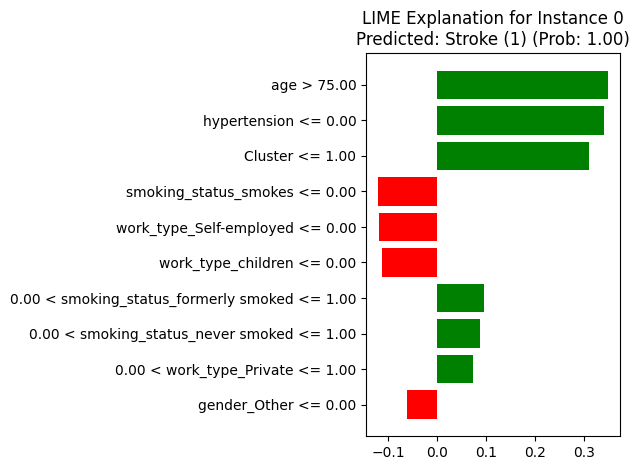


Interpretation Hint (LIME Explanation Plot):
- Shows features that are most important for the model's prediction on this specific instance.
- Features listed in the explanation have a local impact.
- Green bars indicate features that support the predicted class.
- Red bars indicate features that oppose the predicted class.
- The length of the bar indicates the magnitude of the contribution.
- The value/condition of the feature for this instance is shown next to the feature name.
- This provides a local, instance-specific interpretation.

--- LIME Application for XGBoost Complete ---


In [ ]:
# prompt: LIME

import matplotlib.pyplot as plt
# Assuming xgb_model is the trained XGBoost model from the previous cell
# Assuming X_test and y_test are the test data from the previous cell

print("\n--- Applying LIME for XGBoost ---")

# Install LIME if not already installed
try:
    import lime
    import lime.lime_tabular
except ImportError:
    !pip install lime
    import lime
    import lime.lime_tabular

# LIME requires the model's prediction probability function and feature names
# The predict_proba function should return probabilities for each class [prob_class_0, prob_class_1]
predict_fn = xgb_model.predict_proba

# Feature names are the column names of X_test
feature_names = X_test.columns.tolist()

# LIME explainer needs a training data distribution (or a representative sample)
# It works best with numpy arrays. Convert X_train (or X_res) to numpy.
# We need a training data sample for the explainer to learn the data distribution
# and generate interpretable samples around the instance being explained.
# Use X_train for this purpose.
X_train_np = X_train.values

# Initialize the LIME Tabular Explainer
# class_names are the names of the target classes
# discretize_continuous=True is often helpful for tabular data interpretation
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names,
    class_names=['No Stroke (0)', 'Stroke (1)'], # Replace with your actual class names
    mode='classification',
    discretize_continuous=True # Discretize continuous features for explanation
)

# --- Explain an Individual Instance using LIME ---

# Choose a specific instance (row index) from the test set to explain
# You can pick instances where the prediction was interesting (e.g., false positive, false negative)
instance_index_to_explain = 0 # Example: Explain the first instance in X_test

# Get the instance's feature values (as a numpy array) and its true label
instance_features_np = X_test.iloc[instance_index_to_explain].values
true_label = y_test.iloc[instance_index_to_explain]
predicted_label = xgb_model.predict([instance_features_np])[0] # Predict for this single instance
predicted_proba = xgb_model.predict_proba([instance_features_np])[0] # Get probabilities for this single instance

print(f"\nExplaining Instance Index: {instance_index_to_explain}")
print(f"True Label: {true_label} ({explainer_lime.class_names[true_label]})")
print(f"Predicted Label: {predicted_label} ({explainer_lime.class_names[predicted_label]})")
print(f"Predicted Probabilities: {predicted_proba}")


# Generate the LIME explanation for the chosen instance
# num_features: how many features to include in the explanation
# top_labels: how many top predicted classes to explain (usually 1 for binary)
explanation = explainer_lime.explain_instance(
    data_row=instance_features_np,
    predict_fn=predict_fn,
    num_features=10, # Explain top 10 important features for this instance
    top_labels=1     # Explain the top predicted class
)

# --- Visualize the LIME Explanation ---

print("\nGenerating LIME explanation plot...")

# The explanation is visualized showing which features contribute how much
# to the prediction of the top label for this instance.
# Green bars support the predicted label, red bars oppose it.
explanation.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {instance_index_to_explain}\nPredicted: {explainer_lime.class_names[predicted_label]} (Prob: {predicted_proba[predicted_label]:.2f})")
plt.tight_layout()
plt.show()

print("\nInterpretation Hint (LIME Explanation Plot):")
print("- Shows features that are most important for the model's prediction on this specific instance.")
print("- Features listed in the explanation have a local impact.")
print("- Green bars indicate features that support the predicted class.")
print("- Red bars indicate features that oppose the predicted class.")
print("- The length of the bar indicates the magnitude of the contribution.")
print("- The value/condition of the feature for this instance is shown next to the feature name.")
print("- This provides a local, instance-specific interpretation.")


# Optional: Display the explanation as text (shows rules/conditions)
# print("\nLIME Explanation (Text):")
# print(explanation.as_list())

# Optional: Display explanation in notebook HTML (more interactive)
# This is often better in standard Jupyter notebooks than Colab
# explanation.show_in_notebook(show_table=True, show_all=False)


print("\n--- LIME Application for XGBoost Complete ---")
